<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_450-500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1497]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [1498]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

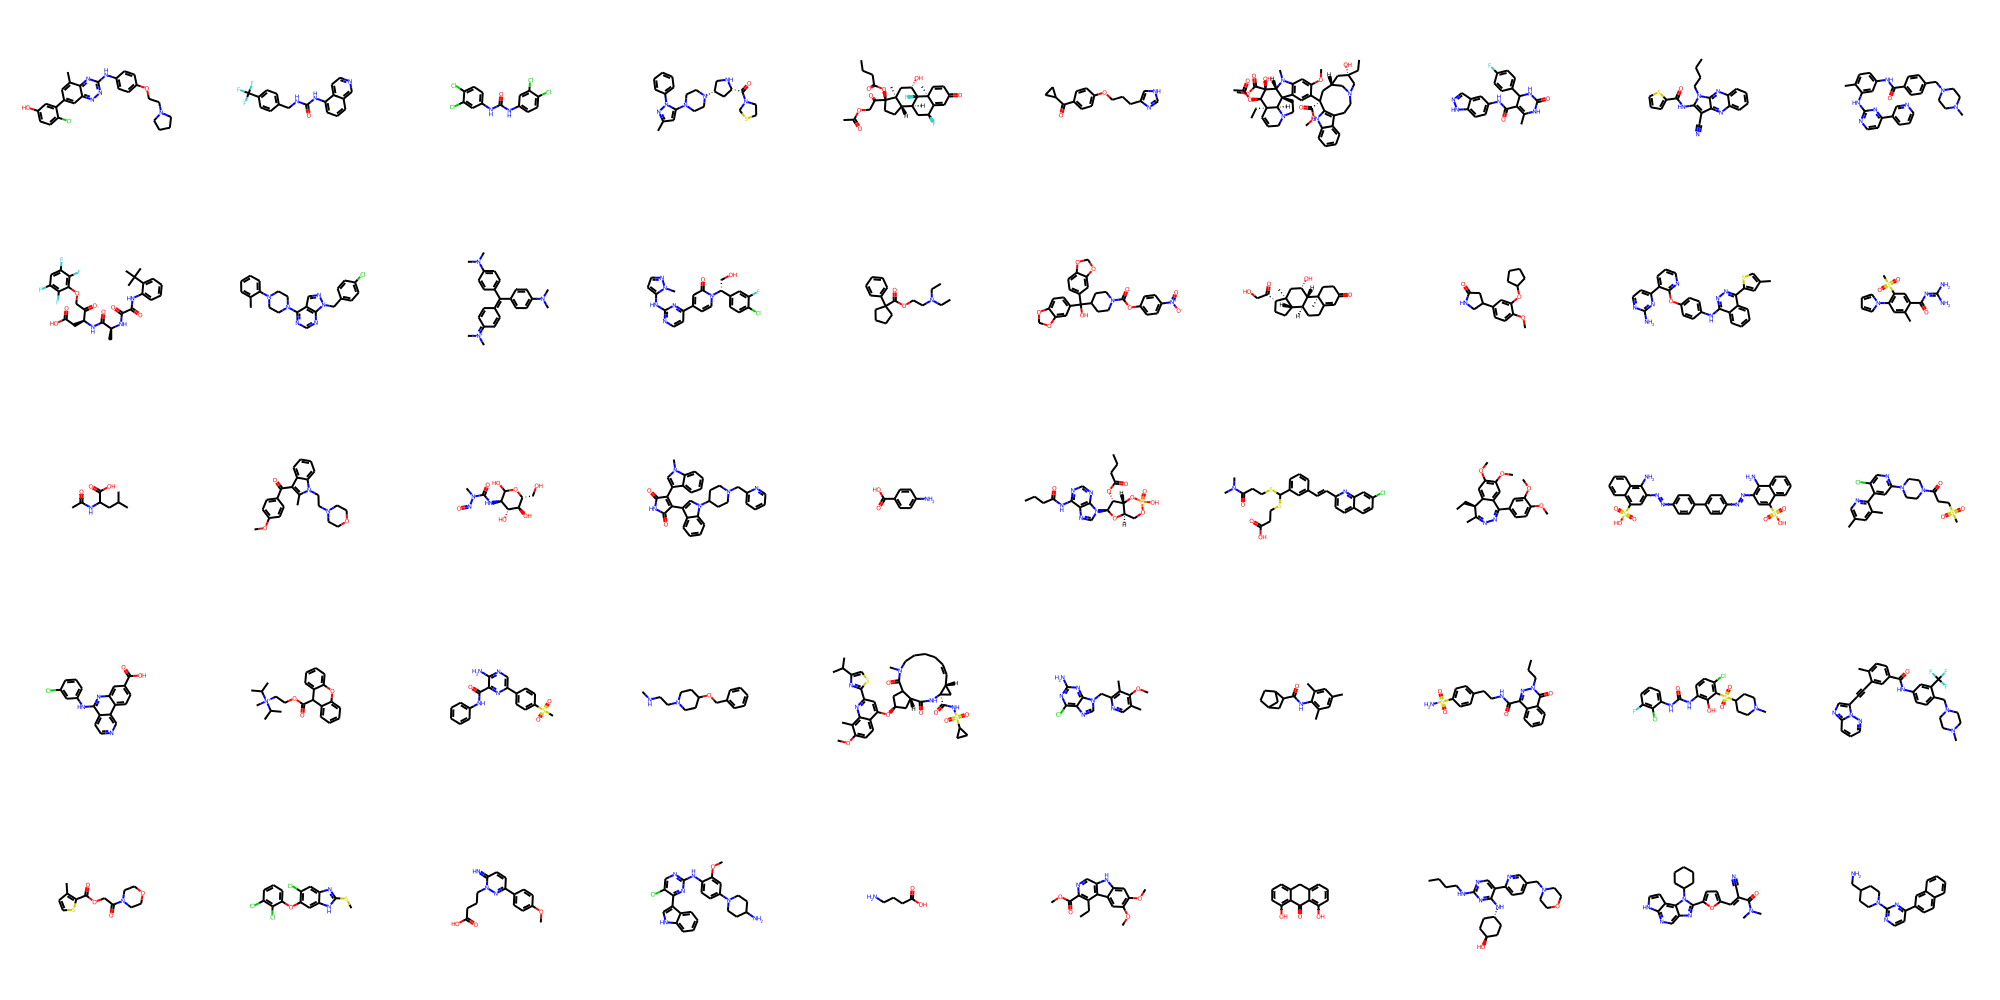

In [1499]:
smiles_list = [
'Cc1cc(-c2cc(O)ccc2Cl)cc2nnc(Nc3ccc(OCCN4CCCC4)cc3)nc12',
'O=C(NCc1ccc(C(F)(F)F)cc1)Nc1cccc2cnccc12',
'O=C(Nc1ccc(Cl)c(Cl)c1)Nc1ccc(Cl)c(Cl)c1',
'Cc1cc(N2CCN([C@@H]3CN[C@H](C(=O)N4CCSC4)C3)CC2)n(-c2ccccc2)n1',
'CCCC(=O)O[C@]1(C(=O)COC(C)=O)CC[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@@]21C',
'O=C(c1ccc(OCCCc2c[nH]cn2)cc1)C1CC1',
'CC[C@]1(O)C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3cc4c(cc3OC)N(C)[C@H]3[C@@](O)(C(=O)OC)[C@H](OC(C)=O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1',
'CC1=C(C(=O)Nc2ccc3[nH]ncc3c2)C(c2ccc(F)cc2)NC(=O)N1',
'CCCCn1c(NC(=O)c2cccs2)c(C#N)c2nc3ccccc3nc21',
'Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc(-c2cccnc2)n1',
'C[C@H](NC(=O)C(=O)Nc1ccccc1C(C)(C)C)C(=O)N[C@@H](CC(=O)O)C(=O)COc1c(F)c(F)cc(F)c1F',
'Cc1ccccc1N1CCN(c2ncnc3c2cnn3Cc2ccc(Cl)cc2)CC1',
'CN(C)c1ccc(C(=C2C=CC(=[N+](C)C)C=C2)c2ccc(N(C)C)cc2)cc1',
'Cn1nccc1Nc1nccc(-c2ccn([C@H](CO)c3ccc(Cl)c(F)c3)c(=O)c2)n1',
'CCN(CC)CCOC(=O)C1(c2ccccc2)CCCC1',
'O=C(Oc1ccc([N+](=O)[O-])cc1)N1CCC(C(O)(c2ccc3c(c2)OCO3)c2ccc3c(c2)OCO3)CC1',
'C[C@]12C[C@H](O)[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C@@H]1CC[C@@H]2C(=O)CO',
'COc1ccc(C2CNC(=O)C2)cc1OC1CCCC1',
'Cc1csc(-c2nnc(Nc3ccc(Oc4ncccc4-c4ccnc(N)n4)cc3)c3ccccc23)c1',
'Cc1cc(-n2cccc2)c(S(C)(=O)=O)cc1C(=O)N=C(N)N',
'CC(=O)NC(CC(C)C)C(=O)O',
'COc1ccc(C(=O)c2c(C)n(CCN3CCOCC3)c3ccccc23)cc1',
'CN(N=O)C(=O)N[C@H]1C(O)O[C@H](CO)[C@@H](O)[C@@H]1O',
'Cn1cc(C2=C(c3cn(C4CCN(Cc5ccccn5)CC4)c4ccccc34)C(=O)NC2=O)c2ccccc21',
'Nc1ccc(C(=O)O)cc1',
'CCCC(=O)Nc1ncnc2c1ncn2[C@@H]1O[C@@H]2COP(=O)(O)O[C@H]2[C@H]1OC(=O)CCC',
'CN(C)C(=O)CCSC(SCCC(=O)O)c1cccc(/C=C/c2ccc3ccc(Cl)cc3n2)c1',
'CC[C@@H]1C(C)=NN=C(c2ccc(OC)c(OC)c2)c2cc(OC)c(OC)cc21',
'Nc1c(N=Nc2ccc(-c3ccc(N=Nc4cc(S(=O)(=O)O)c5ccccc5c4N)cc3)cc2)cc(S(=O)(=O)O)c2ccccc12',
'Cc1cnc(-c2cc(N3CCN(C(=O)CCS(C)(=O)=O)CC3)ncc2Cl)c(C)c1',
'O=C(O)c1ccc2c(c1)nc(Nc1cccc(Cl)c1)c1ccncc12',
'CC(C)[N+](C)(CCOC(=O)C1c2ccccc2Oc2ccccc21)C(C)C',
'CS(=O)(=O)c1ccc(-c2cnc(N)c(C(=O)Nc3ccccc3)n2)cc1',
'CNCCN1CCC(OCc2ccccc2)CC1',
'COc1ccc2c(O[C@H]3CC4C(=O)N(C)CCCC/C=C\[C@@H]5C[C@@]5(C(=O)NS(=O)(=O)C5CC5)NC(=O)[C@@H]4C3)cc(-c3nc(C(C)C)cs3)nc2c1C',
'COc1c(C)cnc(Cn2cnc3c(Cl)nc(N)nc32)c1C',
'Cc1cc(C)c(NC(=O)C2CC3CCC2C3)c(C)c1',
'CCCn1nc(C(=O)NCCc2ccc(S(N)(=O)=O)cc2)c2ccccc2c1=O',
'CN1CCC(S(=O)(=O)c2c(Cl)ccc(NC(=O)Nc3cccc(F)c3Cl)c2O)CC1',
'Cc1ccc(C(=O)Nc2ccc(CN3CCN(C)CC3)c(C(F)(F)F)c2)cc1C#Cc1cnc2cccnn12',
'Cc1ccsc1C(=O)OCC(=O)N1CCOCC1',
'CSc1nc2cc(Cl)c(Oc3cccc(Cl)c3Cl)cc2[nH]1',
'COc1ccc(-c2ccc(=N)n(CCCC(=O)O)n2)cc1',
'COc1cc(N2CCC(N)CC2)ccc1Nc1ncc(Cl)c(-c2c[nH]c3ccccc23)n1',
'NCCCC(=O)O',
'CCc1c(C(=O)OC)ncc2[nH]c3cc(OC)c(OC)cc3c12',
'O=C1c2c(O)cccc2Cc2cccc(O)c21',
'CCCCNc1ncc(-c2ccc(CN3CCOCC3)cn2)c(N[C@H]2CC[C@H](O)CC2)n1',
'CN(C)C(=O)/C(C#N)=C/c1ccc(-c2nc3cnc4[nH]ccc4c3n2C2CCCCC2)o1',
'NCC1CCN(c2nccc(-c3ccc4ccccc4c3)n2)CC1'


]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



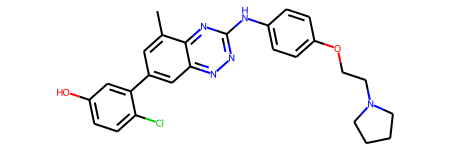

In [1500]:
M1 = mol_list [0]
M1

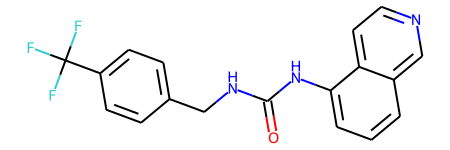

In [1501]:
M2 = mol_list [1]
M2

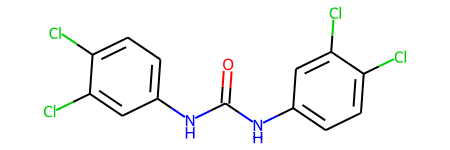

In [1502]:
M3 = mol_list [2]
M3

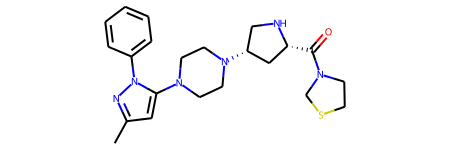

In [1503]:
M4 = mol_list [3]
M4

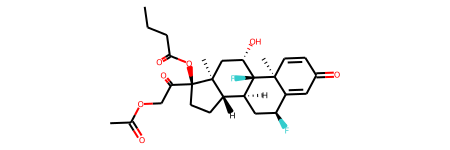

In [1504]:
M5 = mol_list [4]
M5

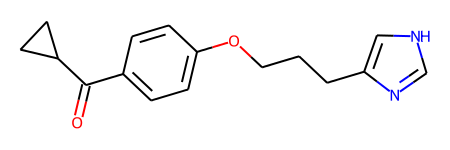

In [1505]:
M6 = mol_list [5]
M6

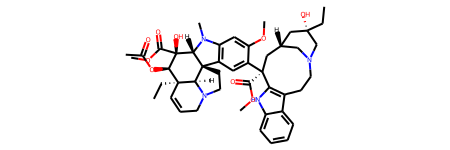

In [1506]:
M7 = mol_list [6]
M7

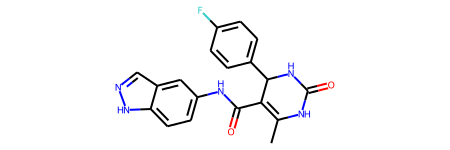

In [1507]:
M8 = mol_list [7]
M8

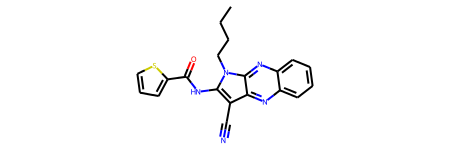

In [1508]:
M9 = mol_list [8]
M9

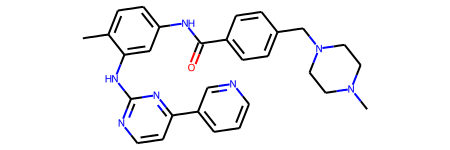

In [1509]:
M10= mol_list [9]
M10

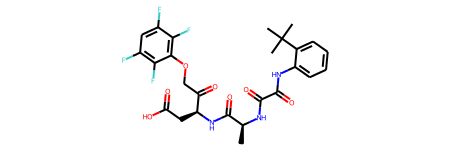

In [1510]:
M11= mol_list [10]
M11

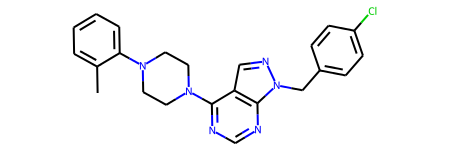

In [1511]:
M12= mol_list [11]
M12

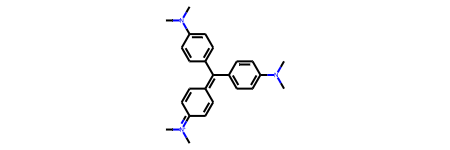

In [1512]:
M13= mol_list [12]
M13

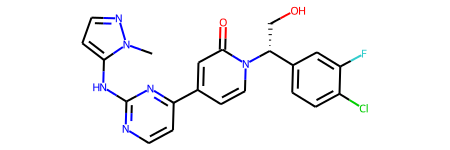

In [1513]:
M14= mol_list [13]
M14

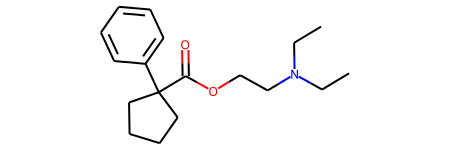

In [1514]:
M15= mol_list [14]
M15

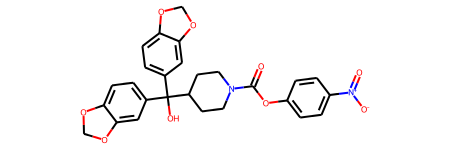

In [1515]:
M16= mol_list [15]
M16

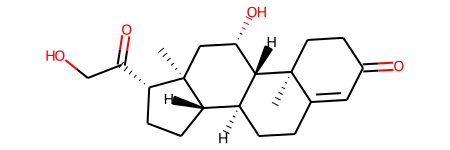

In [1516]:
M17= mol_list [16]
M17

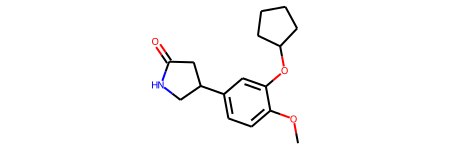

In [1517]:
M18= mol_list [17]
M18

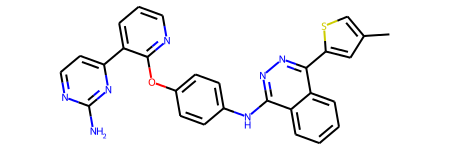

In [1518]:
M19= mol_list [18]
M19

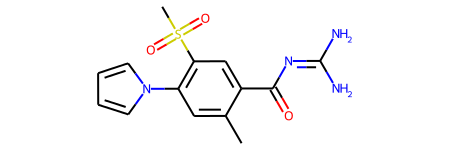

In [1519]:
M20= mol_list [19]
M20

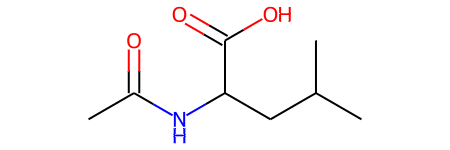

In [1520]:
M21= mol_list [20]
M21

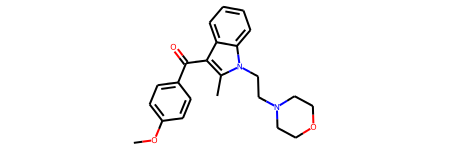

In [1521]:
M22= mol_list [21]
M22

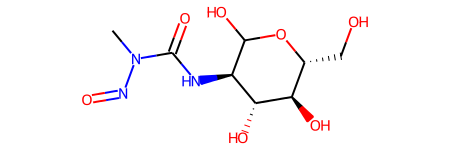

In [1522]:
M23= mol_list [22]
M23

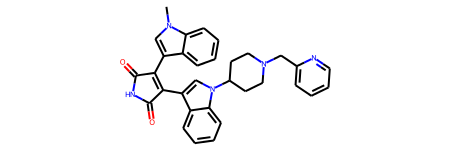

In [1523]:
M24= mol_list [23]
M24

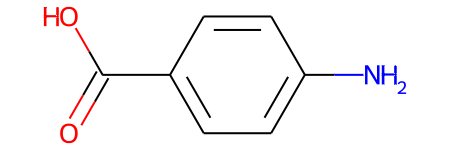

In [1524]:
M25= mol_list [24]
M25

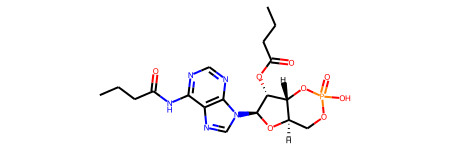

In [1525]:
M26= mol_list [25]
M26

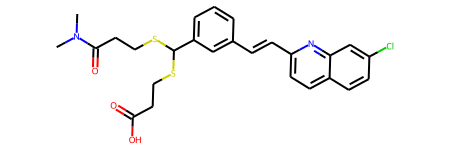

In [1526]:
M27= mol_list [26]
M27

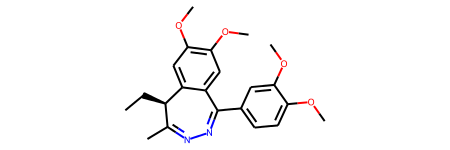

In [1527]:
M28= mol_list [27]
M28

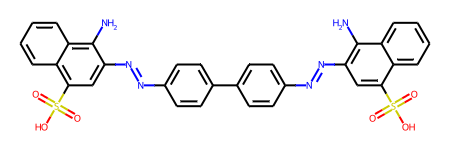

In [1528]:
M29= mol_list [28]
M29

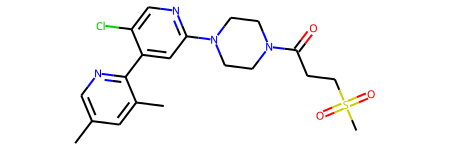

In [1529]:
M30= mol_list [29]
M30

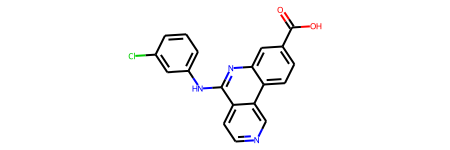

In [1530]:
M31= mol_list [30]
M31

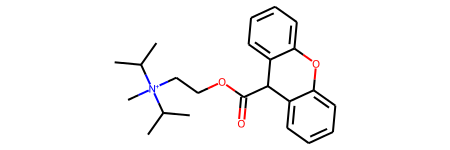

In [1531]:
M32= mol_list [31]
M32

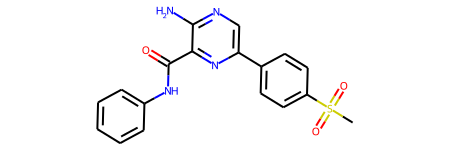

In [1532]:
M33= mol_list [32]
M33

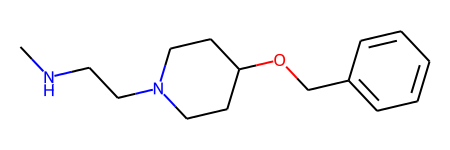

In [1533]:
M34= mol_list [33]
M34

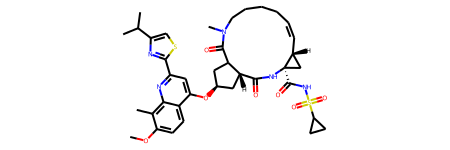

In [1534]:
M35= mol_list [34]
M35

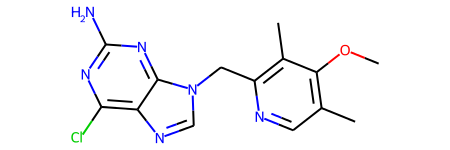

In [1535]:
M36= mol_list [35]
M36

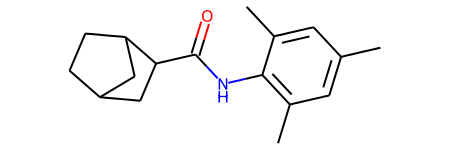

In [1536]:
M37= mol_list [36]
M37

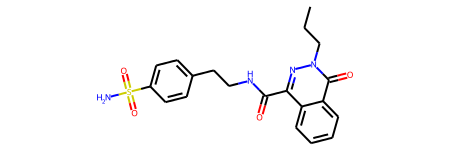

In [1537]:
M38= mol_list [37]
M38


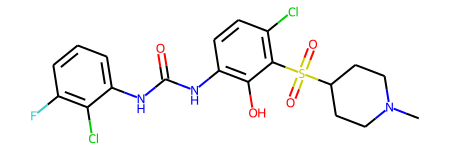

In [1538]:
M39= mol_list [38]
M39

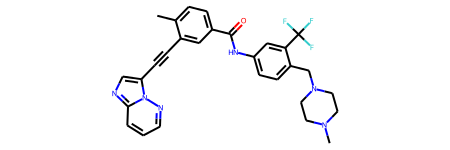

In [1539]:
M40= mol_list [39]
M40

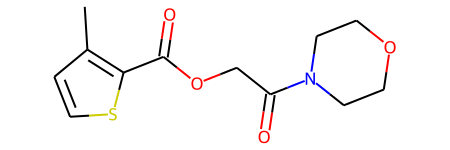

In [1540]:
M41= mol_list [40]
M41

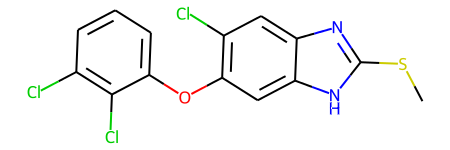

In [1541]:
M42= mol_list [41]
M42

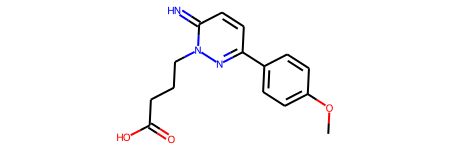

In [1542]:
M43= mol_list [42]
M43

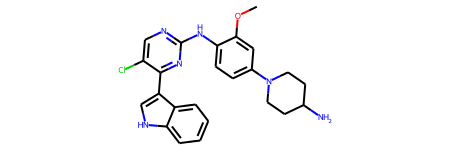

In [1543]:
M44= mol_list [43]
M44

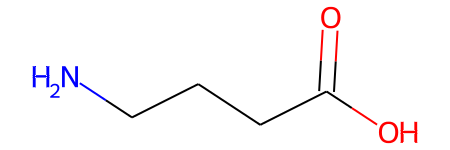

In [1544]:
M45= mol_list [44]
M45

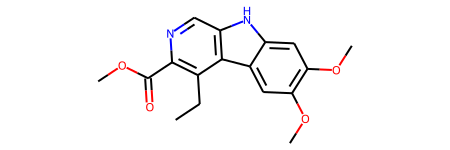

In [1545]:
M46= mol_list [45]
M46

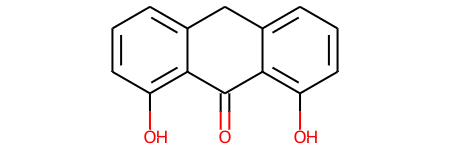

In [1546]:
M47= mol_list [46]
M47

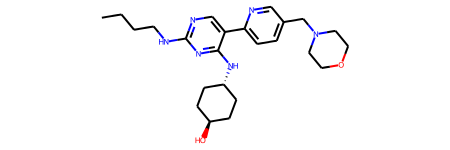

In [1547]:
M48= mol_list [47]
M48

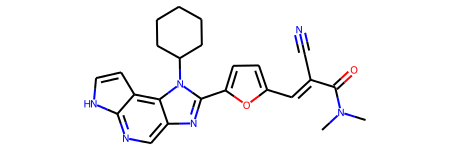

In [1548]:
M49= mol_list [48]
M49

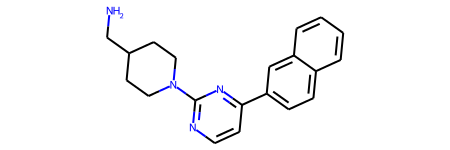

In [1549]:
M50= mol_list [49]
M50

In [1550]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 10,
 13,
 33,
 38,
 47,
 73,
 80,
 102,
 121,
 128,
 136,
 140,
 191,
 267,
 289,
 322,
 332,
 350,
 352,
 356,
 366,
 367,
 378,
 381,
 398,
 428,
 445,
 454,
 456,
 458,
 481,
 491,
 495,
 500,
 533,
 558,
 561,
 562,
 578,
 597,
 659,
 666,
 695,
 698,
 700,
 718,
 726,
 745,
 767,
 807,
 808,
 828,
 831,
 843,
 849,
 875,
 926,
 935,
 950,
 958,
 974]

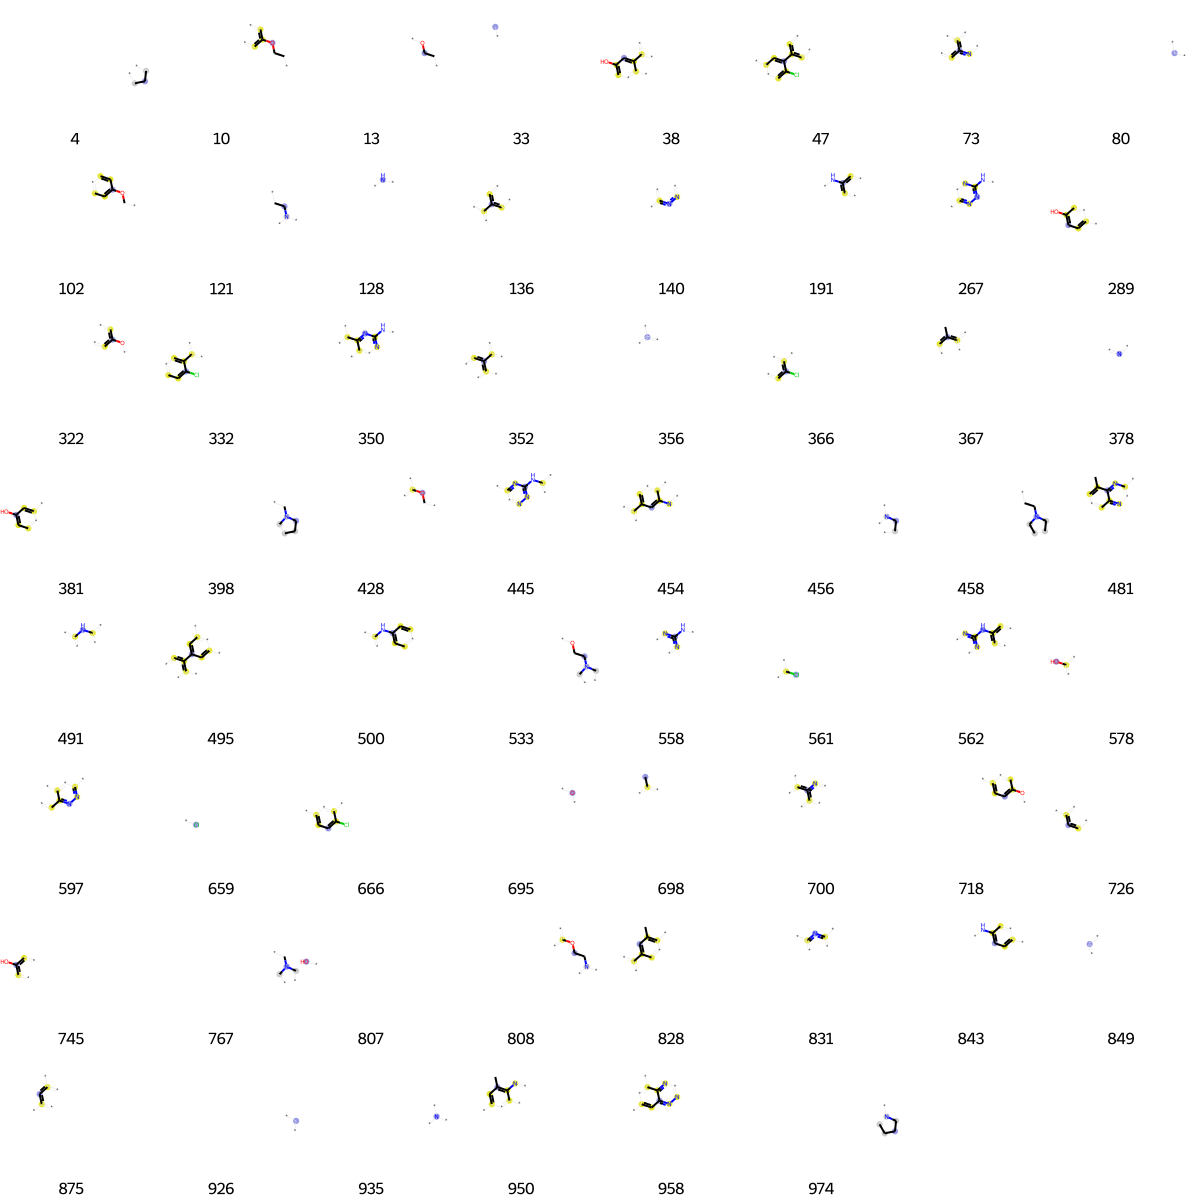

In [1551]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [1552]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[4,
 10,
 13,
 33,
 38,
 47,
 73,
 80,
 102,
 121,
 128,
 136,
 140,
 191,
 267,
 289,
 322,
 332,
 350,
 352,
 356,
 366,
 367,
 378,
 381,
 398,
 428,
 445,
 454,
 456,
 458,
 481,
 491,
 495,
 500,
 533,
 558,
 561,
 562,
 578,
 597,
 659,
 666,
 695,
 698,
 700,
 718,
 726,
 745,
 767,
 807,
 808,
 828,
 831,
 843,
 849,
 875,
 926,
 935,
 950,
 958,
 974]

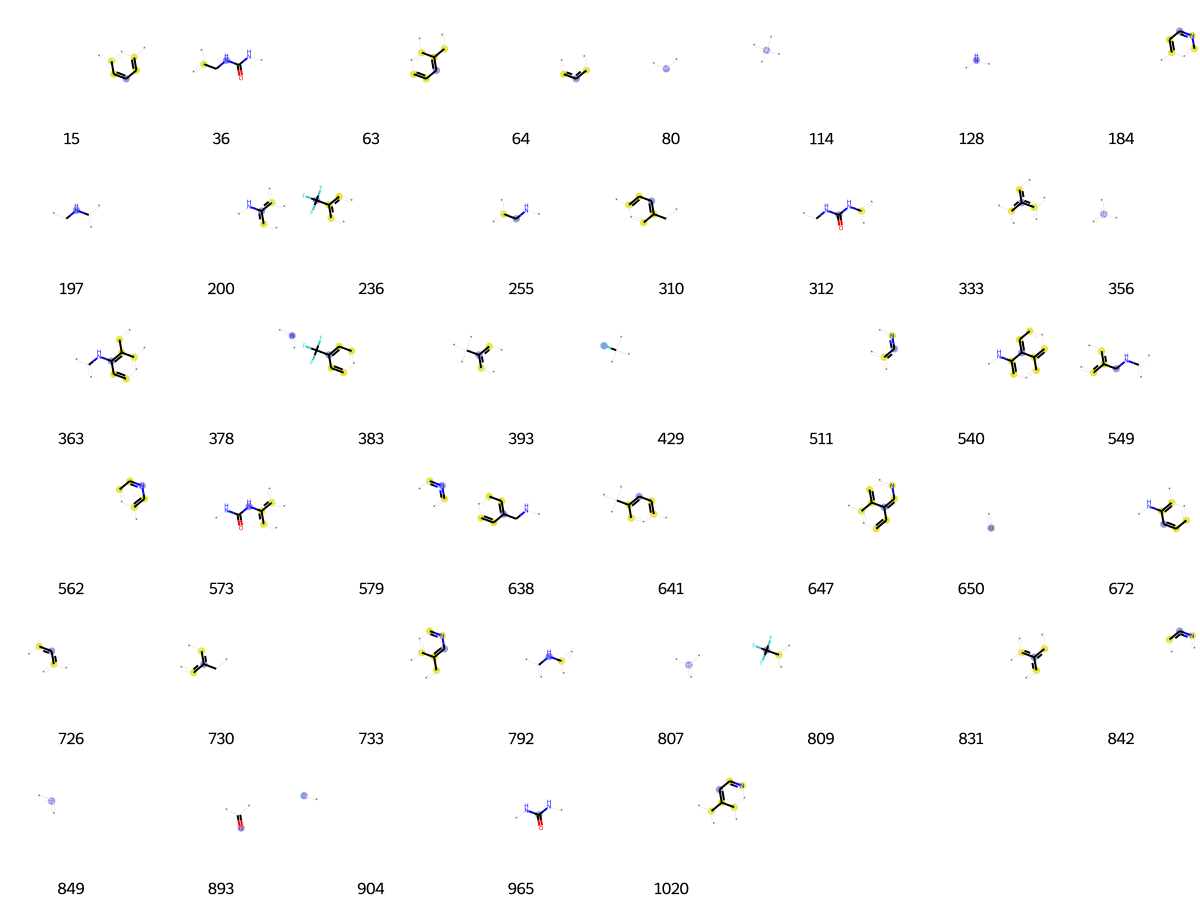

In [1553]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [1554]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[56,
 128,
 184,
 191,
 356,
 366,
 378,
 530,
 557,
 561,
 650,
 659,
 666,
 726,
 792,
 807,
 843,
 849,
 875,
 893,
 965,
 966]

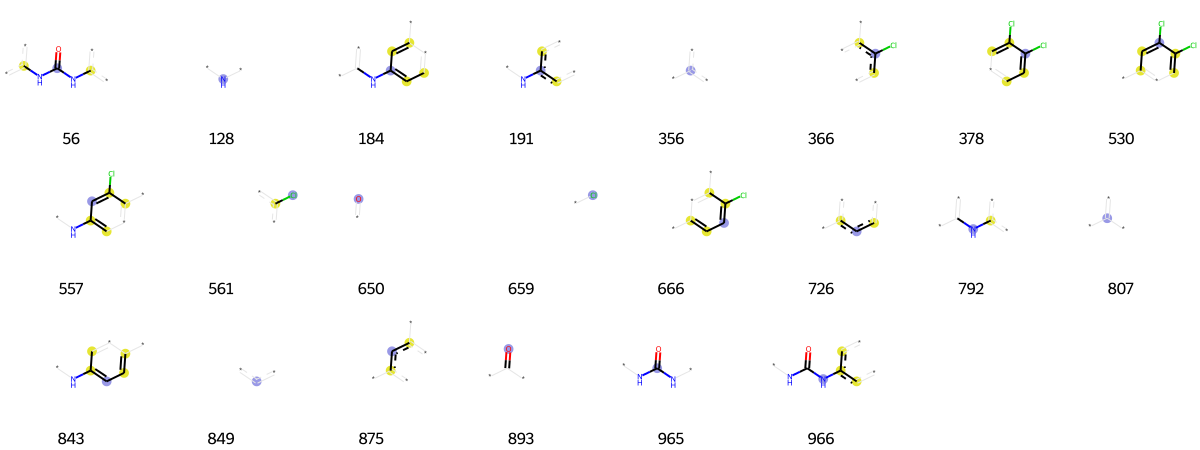

In [1555]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [1556]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[25,
 33,
 64,
 85,
 90,
 100,
 105,
 113,
 150,
 175,
 203,
 219,
 232,
 268,
 329,
 339,
 340,
 356,
 362,
 378,
 389,
 407,
 416,
 456,
 470,
 483,
 484,
 495,
 510,
 511,
 550,
 558,
 650,
 675,
 698,
 707,
 712,
 719,
 726,
 789,
 801,
 807,
 828,
 830,
 849,
 857,
 864,
 875,
 886,
 893,
 904,
 922,
 926,
 932,
 935,
 985,
 1019]

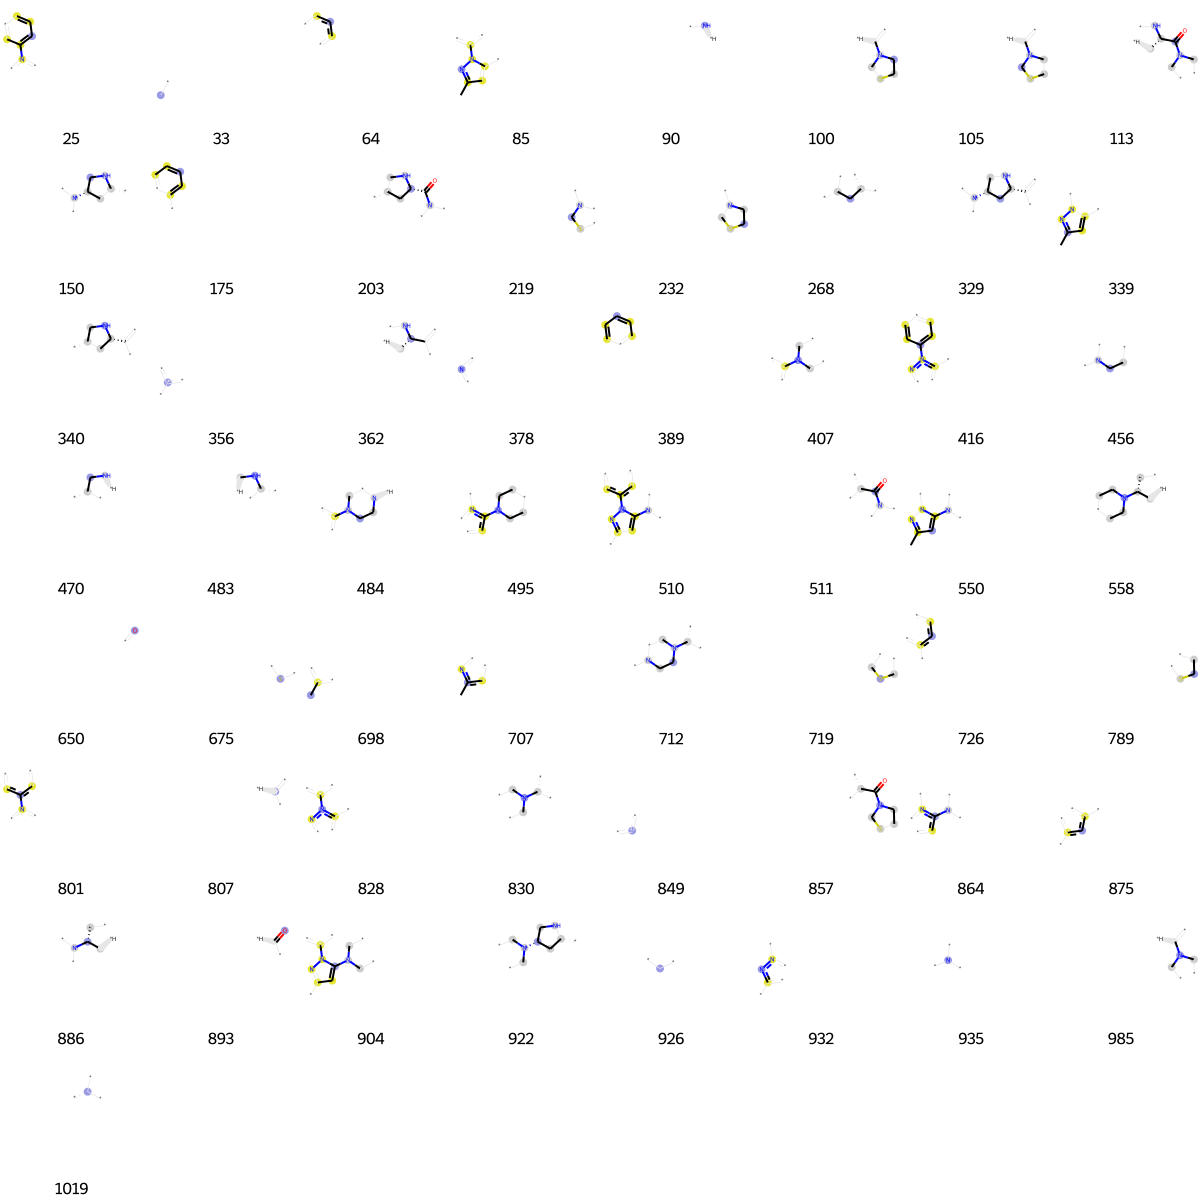

In [1557]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [1558]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[11,
 22,
 32,
 33,
 36,
 80,
 84,
 122,
 129,
 138,
 147,
 155,
 170,
 188,
 233,
 250,
 251,
 268,
 294,
 301,
 314,
 333,
 356,
 362,
 403,
 412,
 450,
 470,
 493,
 519,
 529,
 540,
 547,
 593,
 639,
 650,
 655,
 679,
 687,
 695,
 718,
 748,
 750,
 753,
 760,
 767,
 781,
 787,
 794,
 804,
 807,
 835,
 836,
 846,
 849,
 893,
 904,
 926,
 934,
 951,
 967,
 973,
 980,
 990,
 997,
 1017,
 1019]

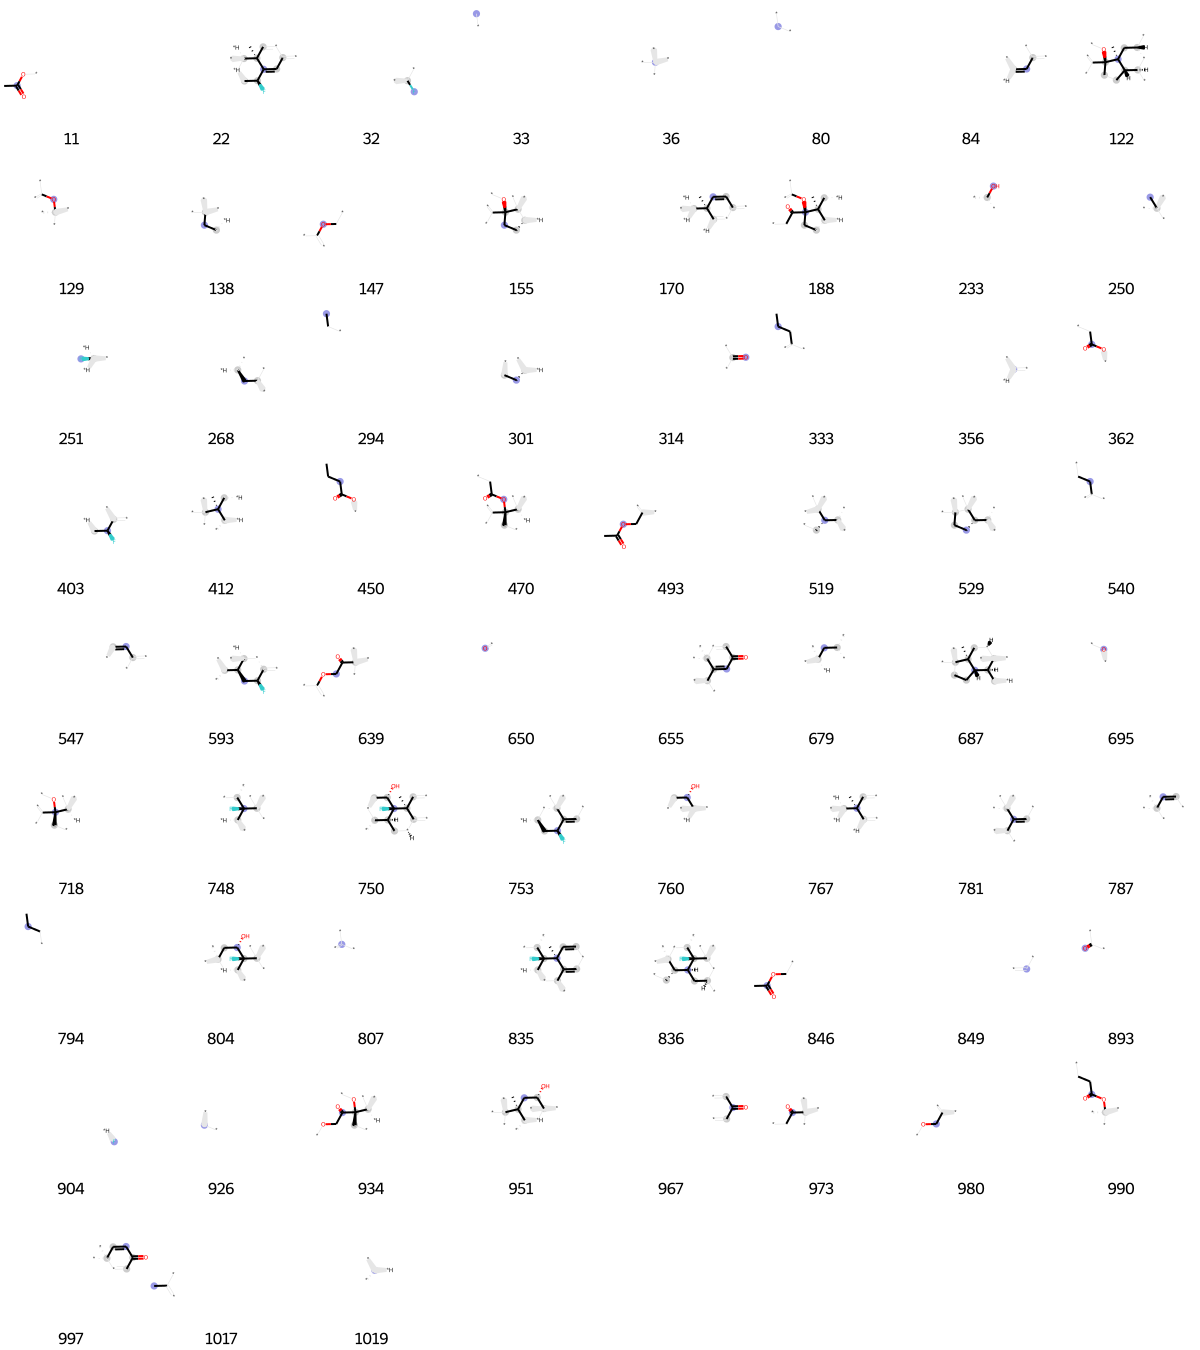

In [1559]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [1560]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[10,
 13,
 80,
 90,
 102,
 121,
 219,
 301,
 314,
 322,
 356,
 360,
 361,
 378,
 428,
 517,
 575,
 619,
 625,
 650,
 673,
 695,
 713,
 718,
 724,
 726,
 734,
 755,
 774,
 807,
 849,
 855,
 860,
 887,
 893,
 898,
 926,
 931,
 974,
 1019]

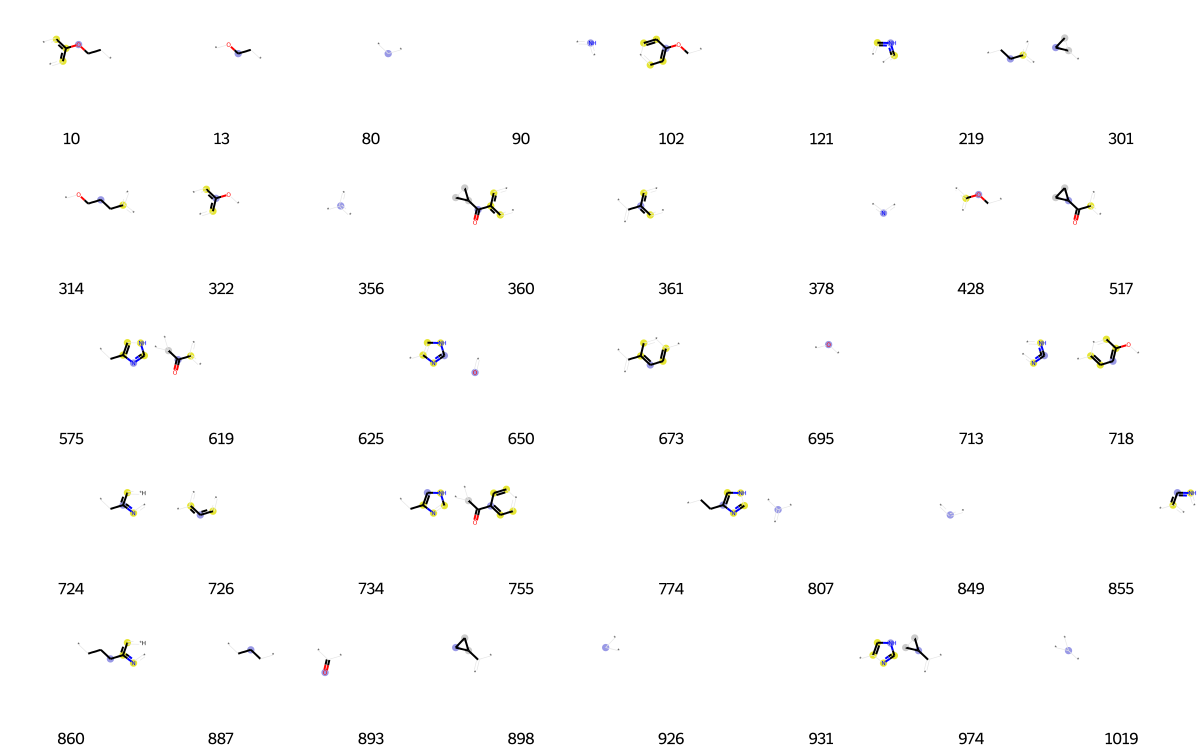

In [1561]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [1562]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[0,
 8,
 11,
 20,
 33,
 36,
 51,
 54,
 64,
 67,
 68,
 80,
 83,
 90,
 96,
 102,
 104,
 119,
 121,
 128,
 130,
 138,
 147,
 157,
 174,
 175,
 197,
 200,
 214,
 215,
 249,
 270,
 271,
 275,
 288,
 294,
 309,
 327,
 333,
 343,
 356,
 361,
 362,
 376,
 413,
 420,
 422,
 442,
 456,
 512,
 521,
 545,
 547,
 549,
 588,
 602,
 638,
 650,
 679,
 687,
 695,
 710,
 714,
 721,
 726,
 738,
 739,
 759,
 787,
 791,
 807,
 830,
 833,
 839,
 841,
 849,
 873,
 875,
 878,
 893,
 924,
 926,
 928,
 930,
 932,
 935,
 938,
 946,
 956,
 978,
 991,
 1004,
 1017,
 1019]

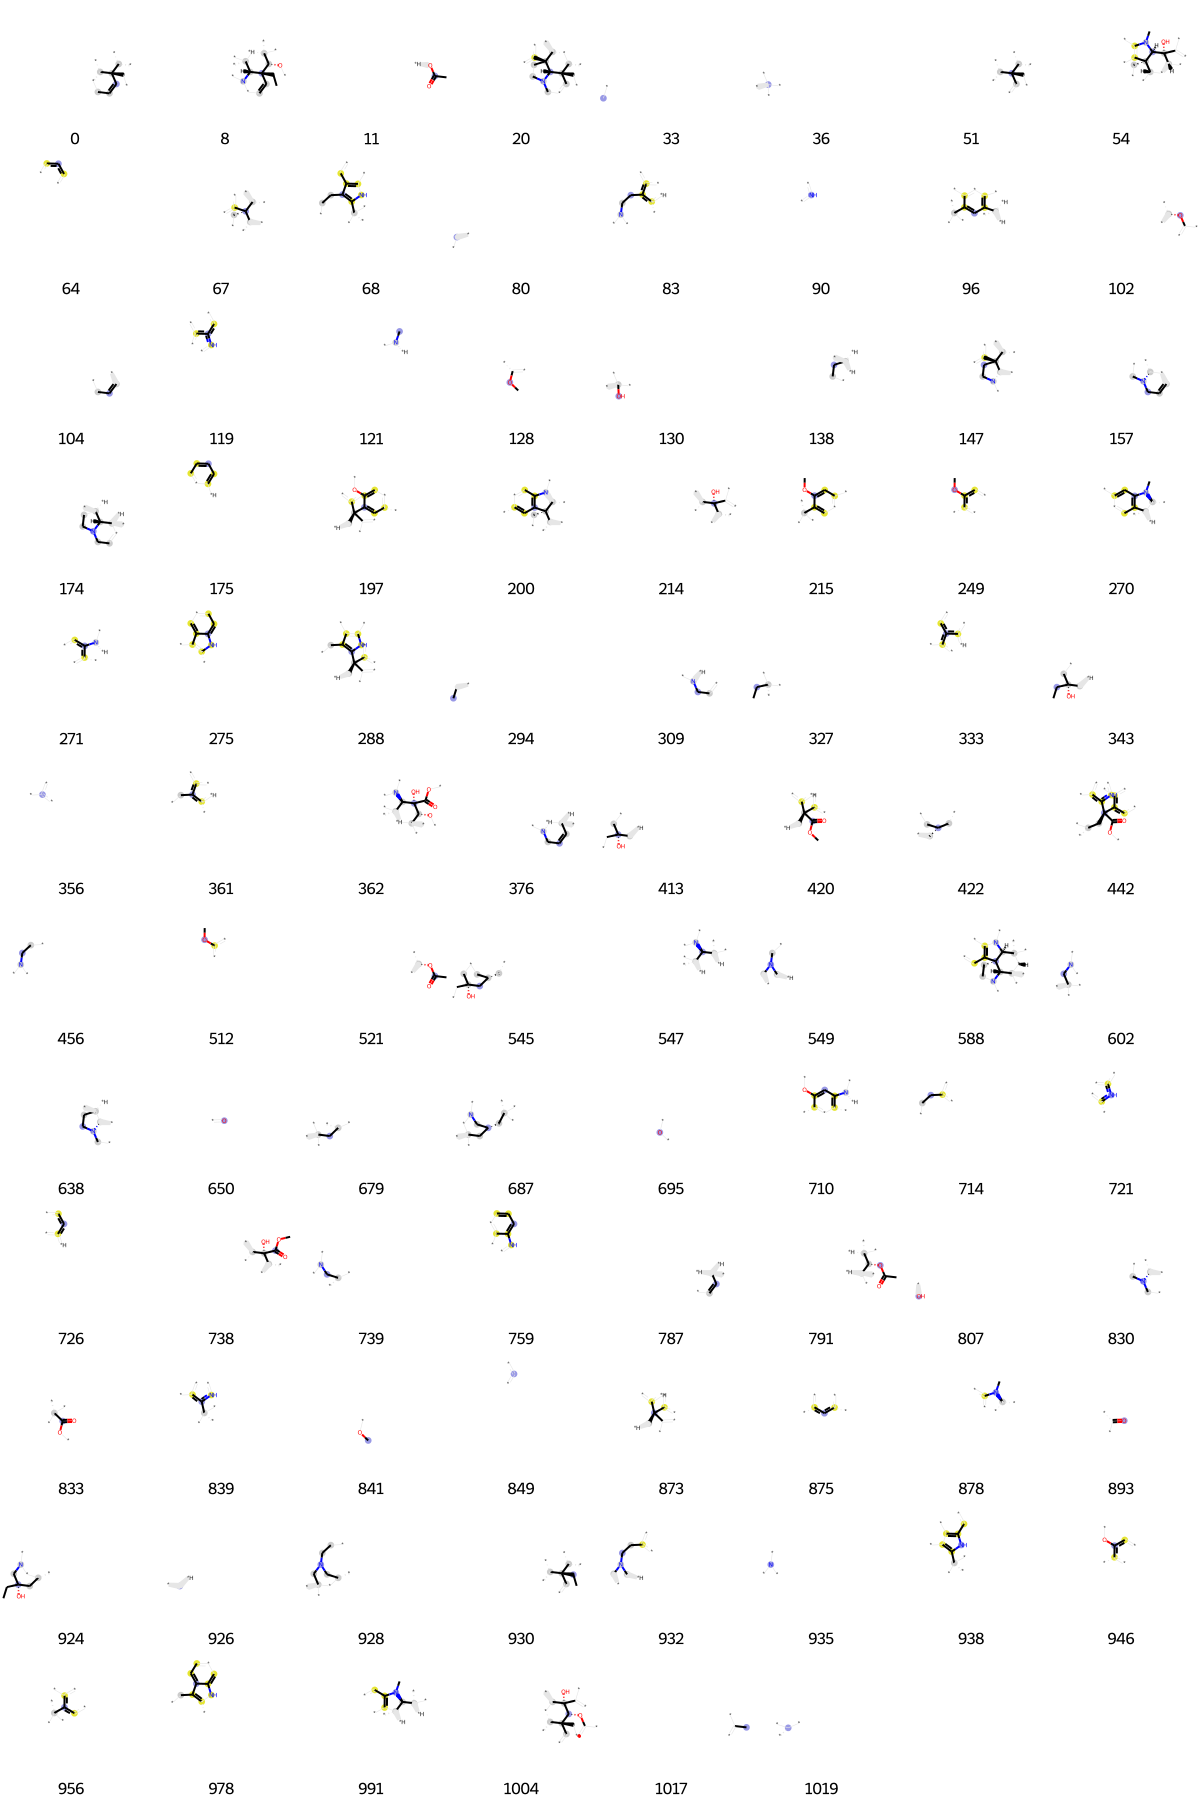

In [1563]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [1564]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[27,
 33,
 36,
 55,
 74,
 77,
 90,
 96,
 119,
 128,
 163,
 184,
 191,
 192,
 255,
 301,
 314,
 356,
 378,
 386,
 440,
 486,
 511,
 599,
 600,
 609,
 627,
 636,
 646,
 650,
 698,
 699,
 726,
 779,
 792,
 807,
 816,
 831,
 843,
 849,
 875,
 881,
 893,
 904,
 915,
 924,
 926,
 927,
 950,
 954,
 1019]

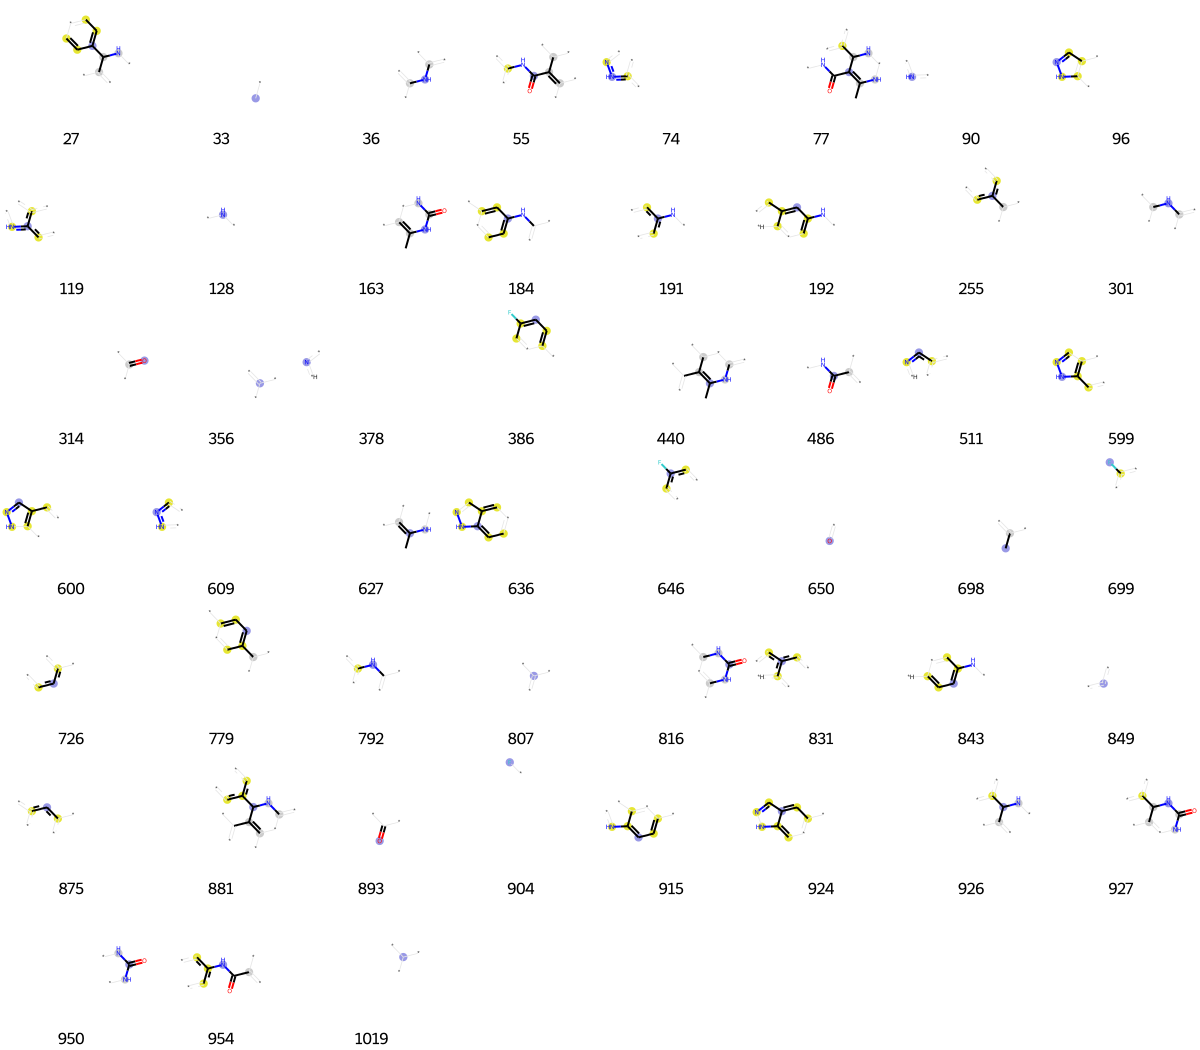

In [1565]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])

In [1566]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[14,
 33,
 64,
 73,
 79,
 80,
 112,
 121,
 128,
 160,
 175,
 213,
 241,
 257,
 278,
 289,
 294,
 296,
 317,
 356,
 358,
 360,
 378,
 383,
 405,
 419,
 486,
 543,
 591,
 596,
 641,
 650,
 661,
 672,
 674,
 675,
 700,
 722,
 726,
 787,
 790,
 792,
 794,
 802,
 807,
 831,
 849,
 858,
 870,
 887,
 893,
 915,
 935,
 936]

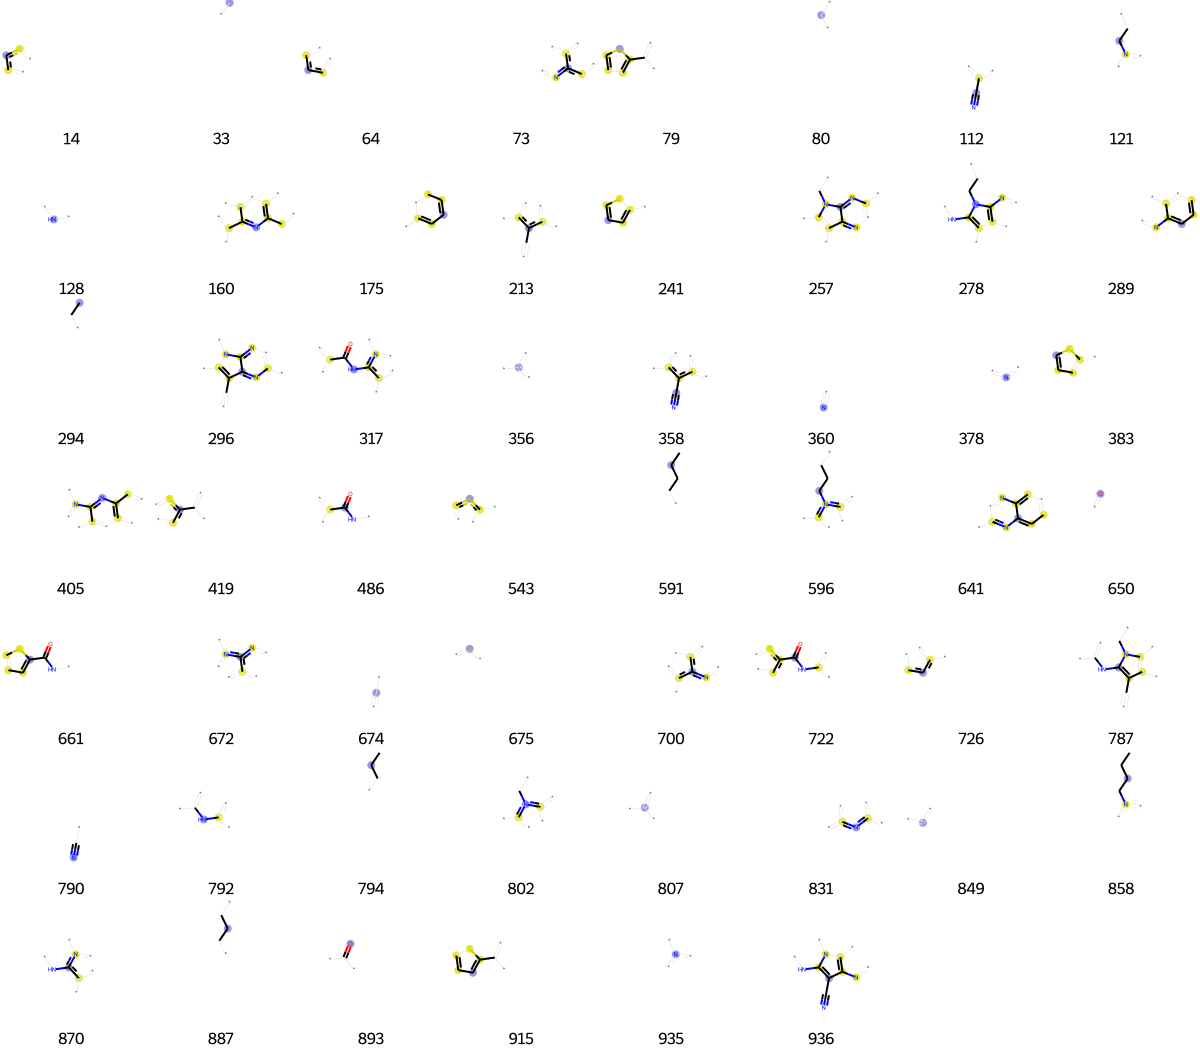

In [1567]:
prints = [(M9, x, bi) for x in fp9.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp9.GetOnBits ()])

In [1568]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[14,
 19,
 33,
 61,
 64,
 74,
 80,
 121,
 128,
 136,
 184,
 191,
 200,
 207,
 212,
 257,
 310,
 356,
 361,
 367,
 378,
 399,
 428,
 437,
 456,
 458,
 486,
 491,
 511,
 541,
 555,
 558,
 562,
 579,
 641,
 650,
 658,
 659,
 667,
 673,
 698,
 726,
 730,
 736,
 741,
 747,
 767,
 771,
 784,
 787,
 792,
 795,
 807,
 831,
 842,
 843,
 849,
 875,
 893,
 926,
 932,
 935,
 954,
 980,
 1012]

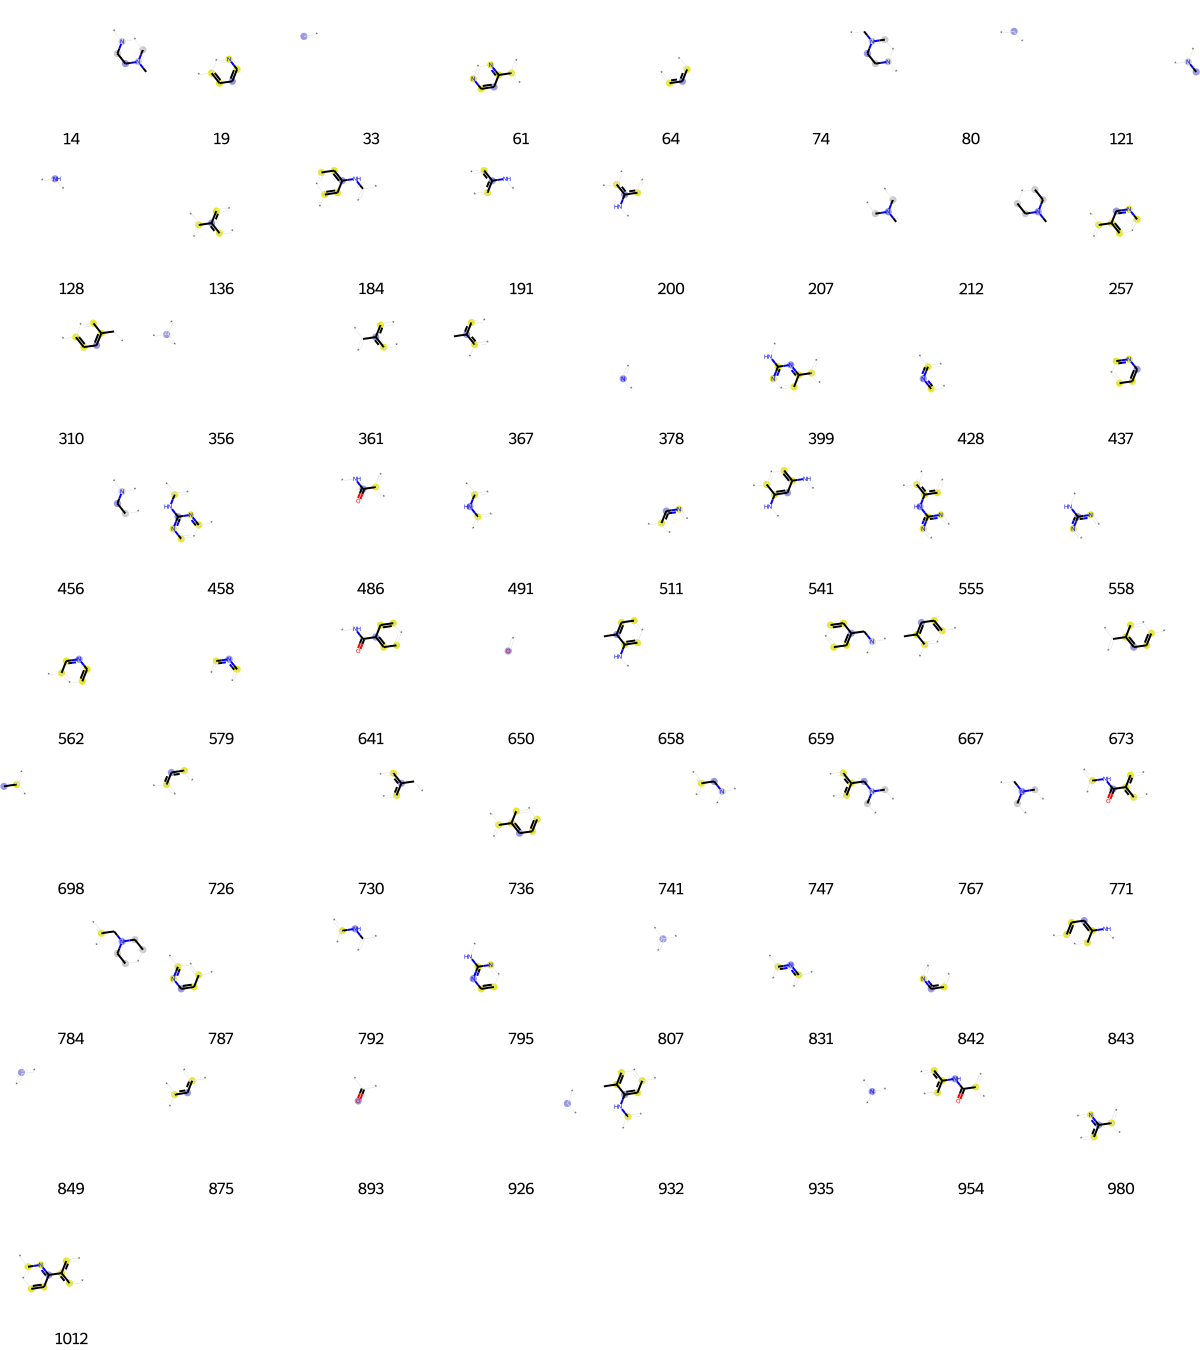

In [1569]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [1570]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[1,
 33,
 64,
 72,
 80,
 103,
 114,
 117,
 128,
 175,
 183,
 186,
 197,
 200,
 266,
 275,
 283,
 286,
 315,
 333,
 356,
 389,
 391,
 392,
 406,
 411,
 418,
 419,
 421,
 428,
 573,
 599,
 650,
 663,
 672,
 695,
 699,
 713,
 726,
 736,
 746,
 764,
 792,
 793,
 805,
 807,
 816,
 849,
 875,
 893,
 904,
 915,
 965,
 980,
 989,
 992,
 996,
 1019]

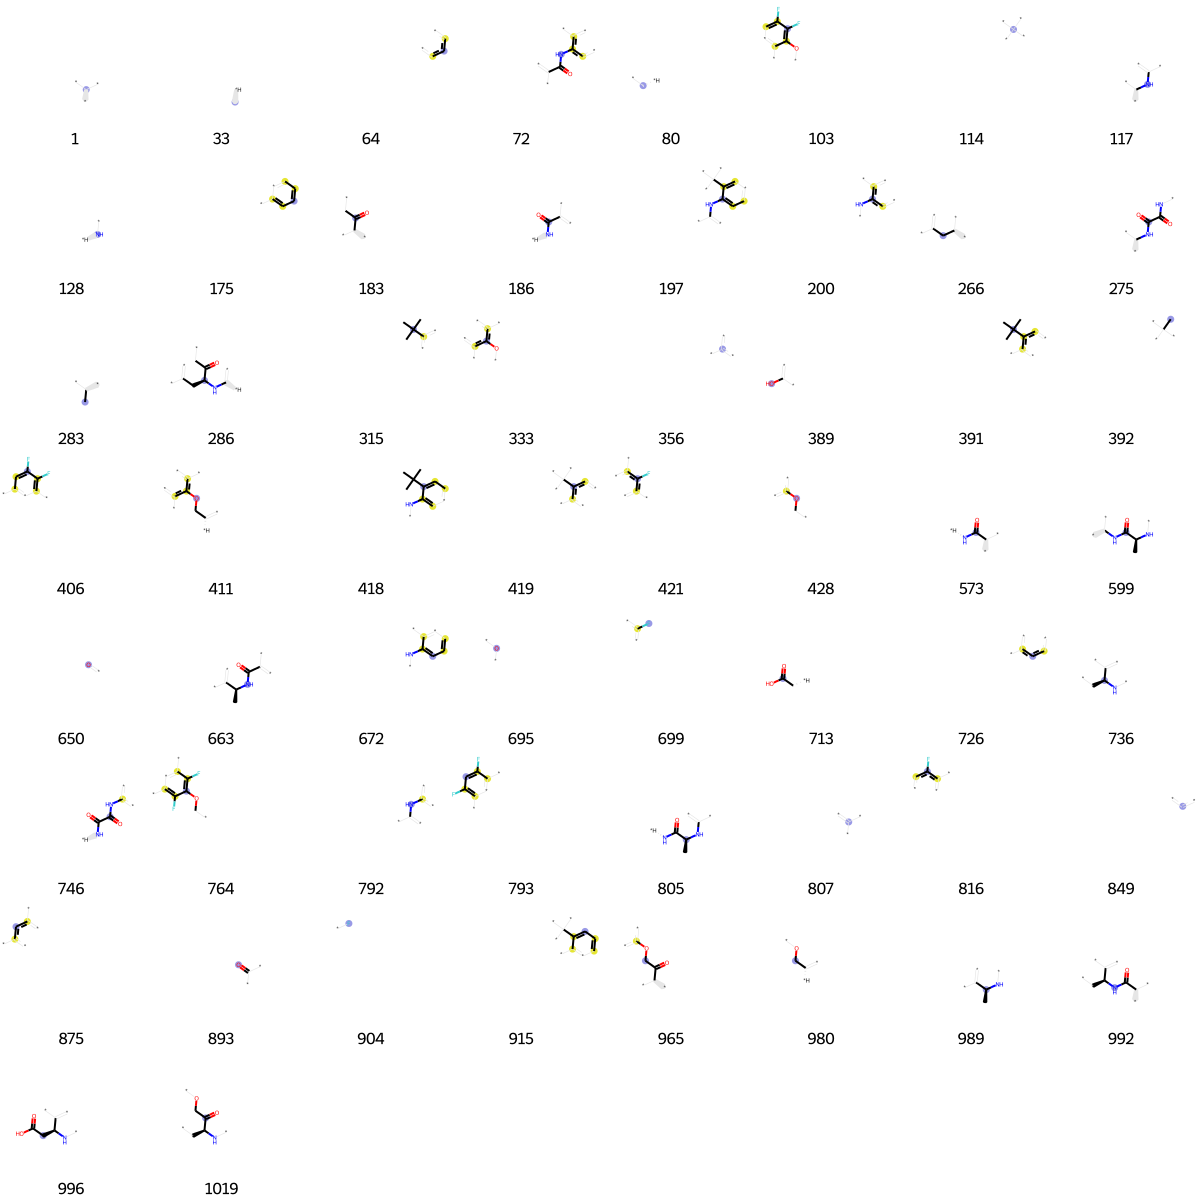

In [1571]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [1572]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[29,
 33,
 43,
 46,
 64,
 80,
 85,
 96,
 105,
 130,
 149,
 158,
 175,
 209,
 216,
 231,
 271,
 310,
 333,
 356,
 367,
 378,
 407,
 428,
 448,
 456,
 457,
 484,
 489,
 511,
 561,
 599,
 623,
 659,
 665,
 672,
 698,
 726,
 730,
 741,
 786,
 803,
 804,
 816,
 849,
 926,
 935,
 975]

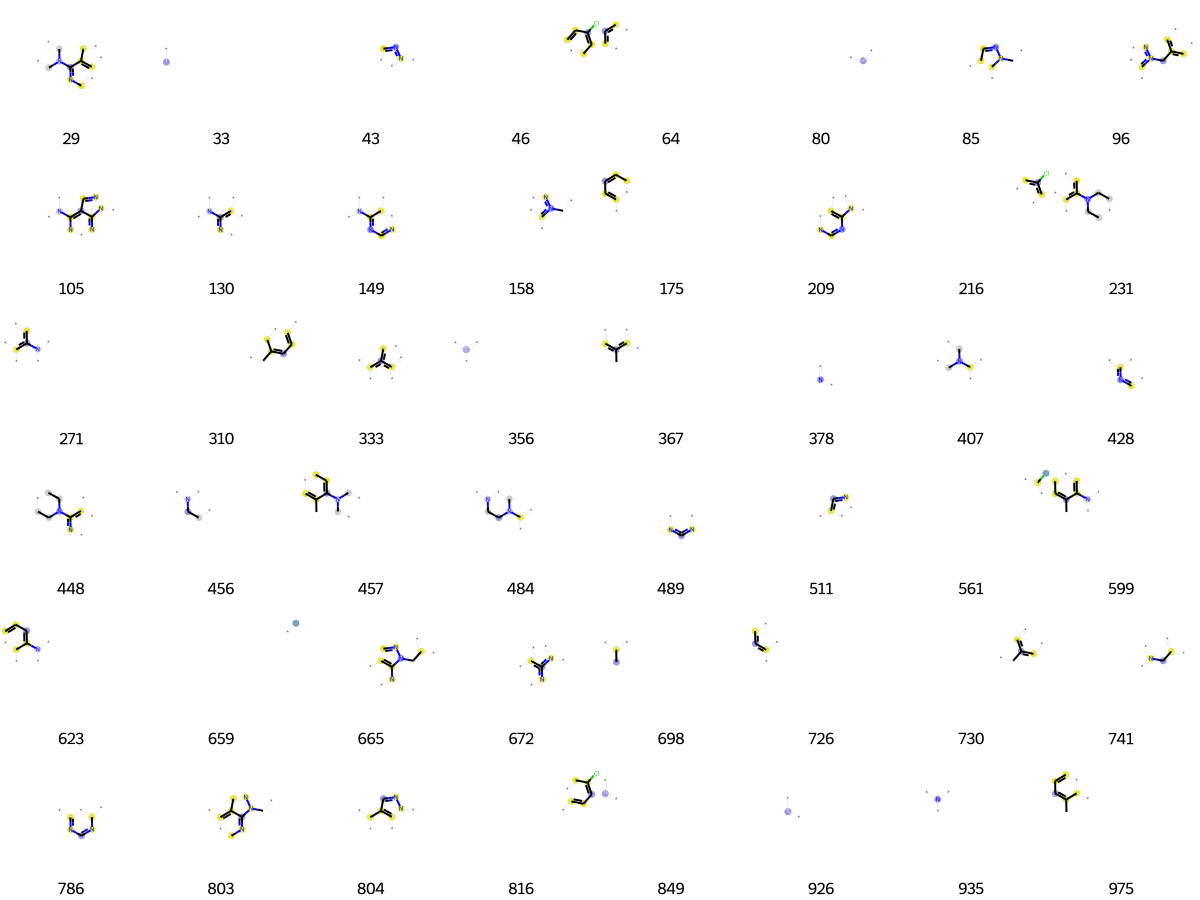

In [1573]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [1574]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[9,
 33,
 72,
 77,
 139,
 143,
 216,
 355,
 356,
 357,
 361,
 367,
 420,
 547,
 602,
 673,
 676,
 726,
 737,
 787,
 807,
 849,
 881,
 903,
 939,
 960,
 1016]

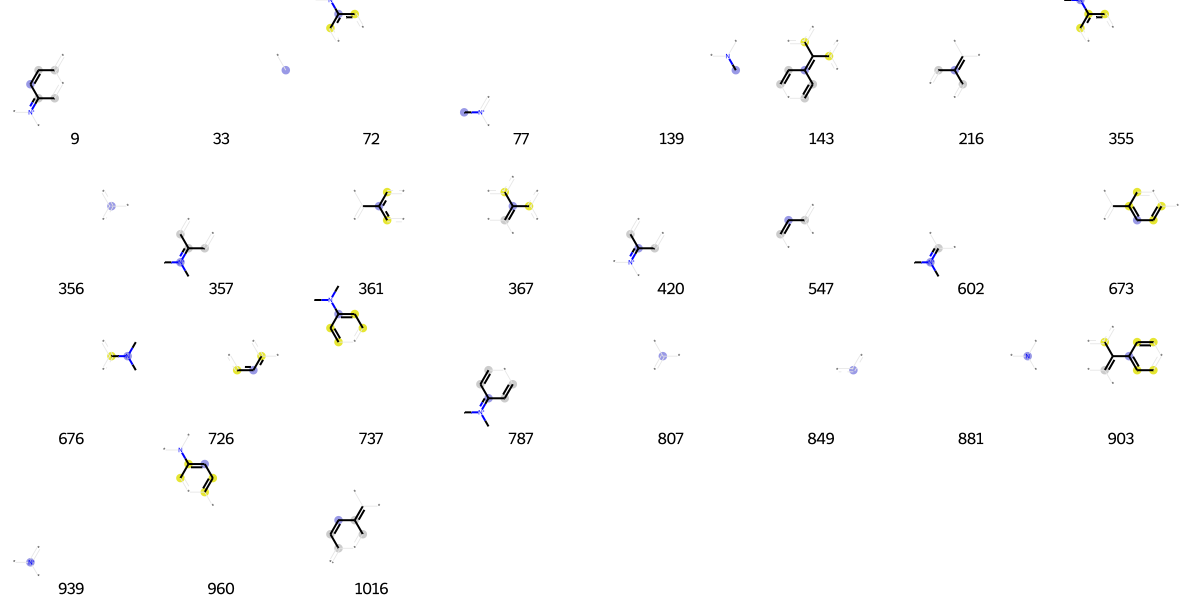

In [1575]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [1576]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[1,
 33,
 43,
 61,
 69,
 77,
 80,
 81,
 117,
 121,
 128,
 136,
 146,
 159,
 214,
 222,
 314,
 316,
 341,
 356,
 366,
 378,
 395,
 399,
 427,
 428,
 458,
 482,
 491,
 501,
 515,
 525,
 546,
 558,
 561,
 570,
 650,
 656,
 659,
 666,
 699,
 716,
 726,
 755,
 787,
 795,
 806,
 807,
 816,
 828,
 829,
 831,
 842,
 849,
 854,
 875,
 904,
 932,
 935,
 980,
 982,
 1012]

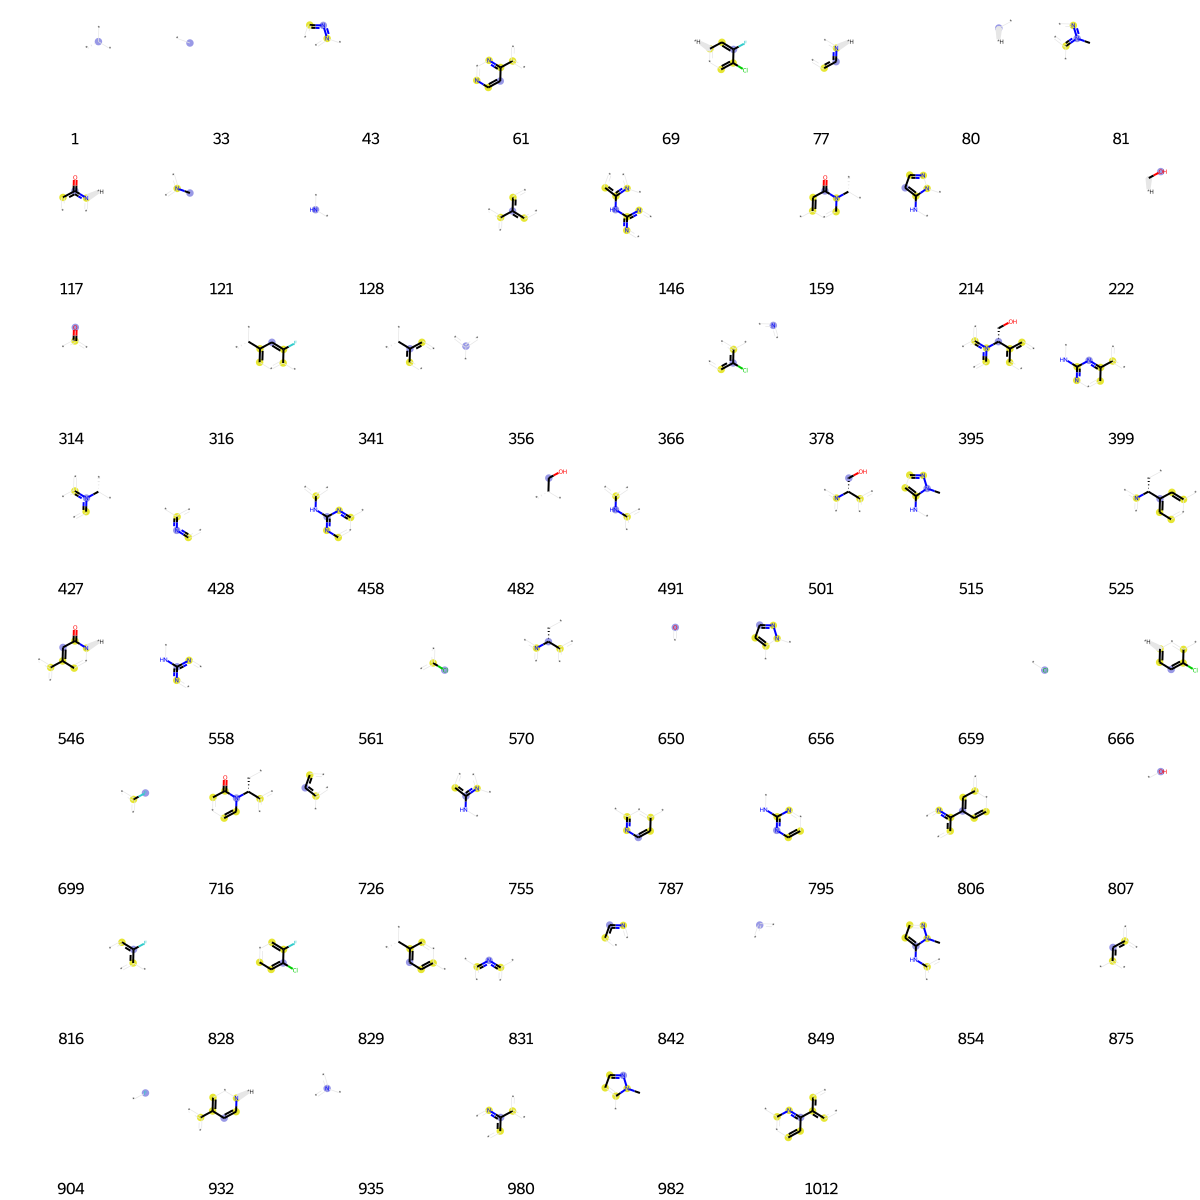

In [1577]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [1578]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[4,
 13,
 23,
 33,
 36,
 64,
 80,
 138,
 147,
 172,
 175,
 251,
 292,
 294,
 356,
 389,
 407,
 436,
 444,
 556,
 614,
 620,
 644,
 650,
 695,
 726,
 772,
 807,
 833,
 849,
 881,
 893,
 926,
 927,
 932,
 956,
 957]

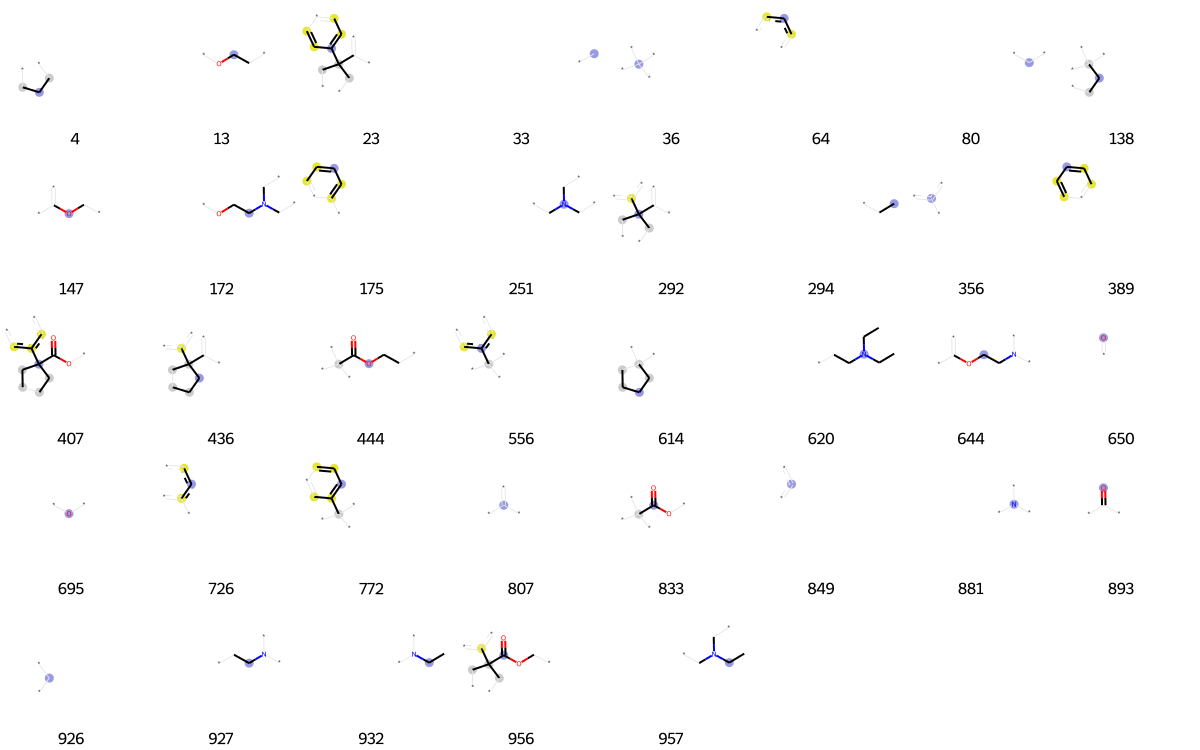

In [1579]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [1580]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[11,
 41,
 72,
 114,
 156,
 171,
 250,
 301,
 322,
 325,
 356,
 393,
 413,
 422,
 441,
 456,
 576,
 586,
 623,
 641,
 650,
 652,
 656,
 695,
 705,
 715,
 718,
 726,
 738,
 741,
 753,
 769,
 776,
 785,
 790,
 807,
 808,
 838,
 839,
 849,
 875,
 881,
 884,
 893,
 899,
 925,
 926,
 929,
 935,
 939,
 985,
 1019]

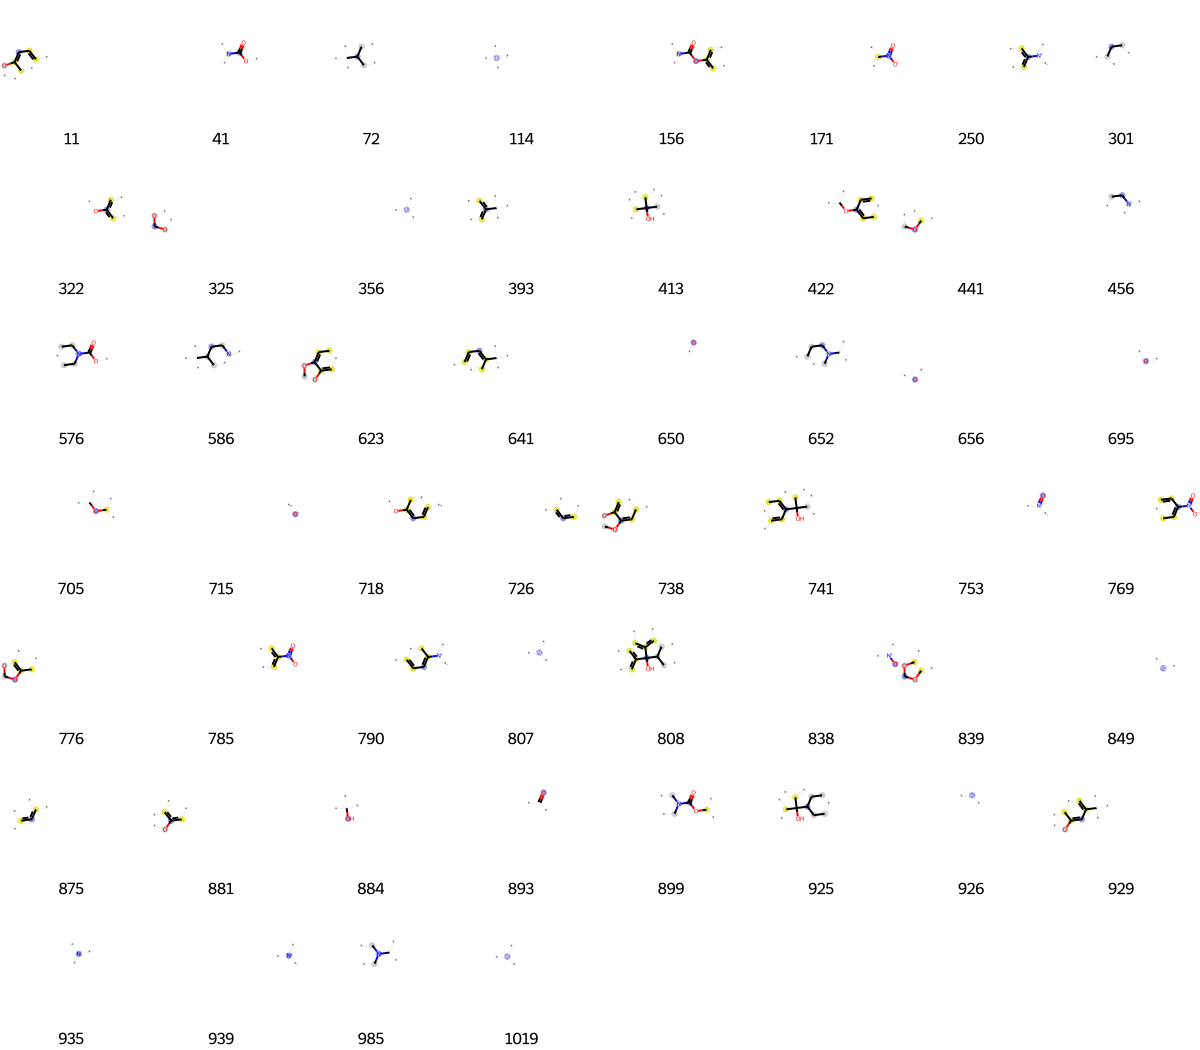

In [1581]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [1582]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[33,
 36,
 51,
 80,
 84,
 88,
 105,
 120,
 138,
 151,
 182,
 195,
 198,
 222,
 233,
 242,
 250,
 262,
 279,
 301,
 314,
 356,
 408,
 453,
 465,
 479,
 494,
 504,
 511,
 515,
 519,
 562,
 622,
 640,
 650,
 679,
 714,
 773,
 807,
 841,
 849,
 860,
 893,
 897,
 926,
 1005,
 1009,
 1019]

In [1583]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[4,
 26,
 33,
 39,
 90,
 94,
 119,
 122,
 123,
 140,
 227,
 231,
 233,
 249,
 255,
 273,
 281,
 301,
 314,
 356,
 397,
 470,
 512,
 524,
 551,
 650,
 695,
 726,
 779,
 841,
 842,
 849,
 867,
 875,
 883,
 890,
 926,
 946,
 976,
 1019]

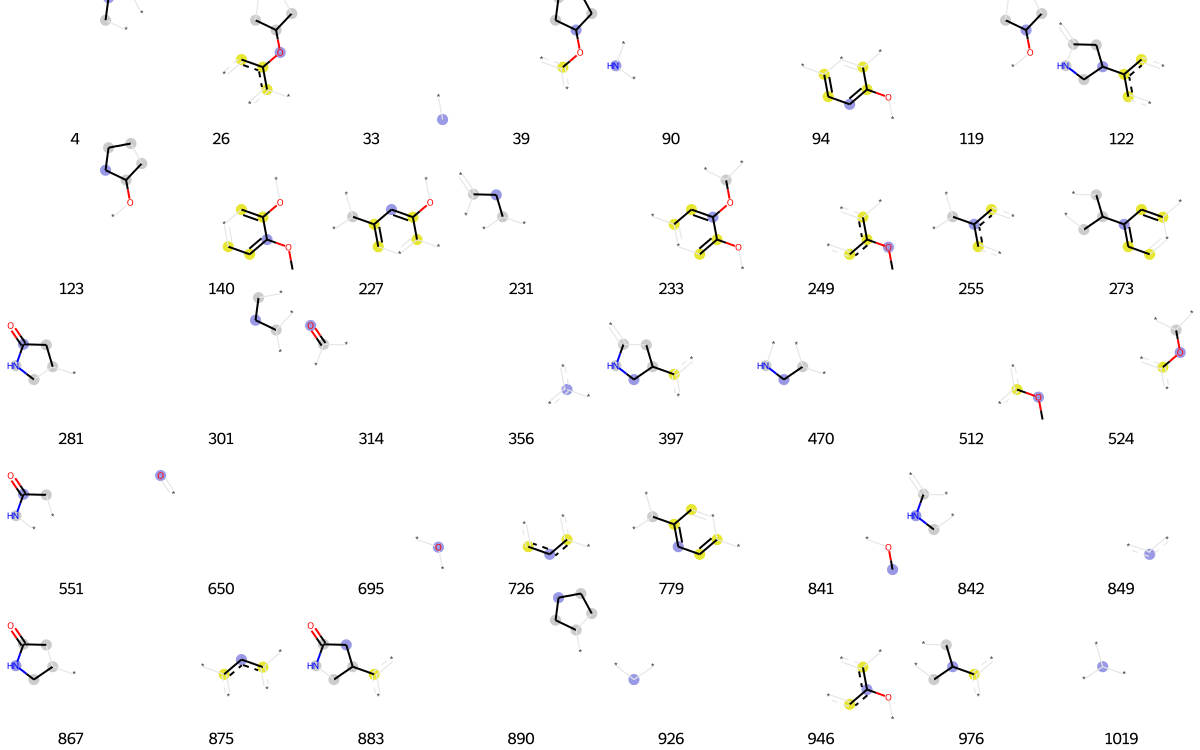

In [1584]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [1585]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[19,
 33,
 61,
 62,
 64,
 113,
 123,
 128,
 140,
 147,
 160,
 161,
 175,
 191,
 193,
 310,
 322,
 323,
 333,
 352,
 356,
 366,
 378,
 383,
 401,
 409,
 428,
 433,
 448,
 491,
 500,
 530,
 543,
 544,
 549,
 550,
 552,
 573,
 593,
 623,
 638,
 675,
 695,
 698,
 708,
 718,
 726,
 751,
 787,
 799,
 821,
 831,
 842,
 843,
 849,
 875,
 888,
 909,
 913,
 976,
 980,
 984,
 1008]

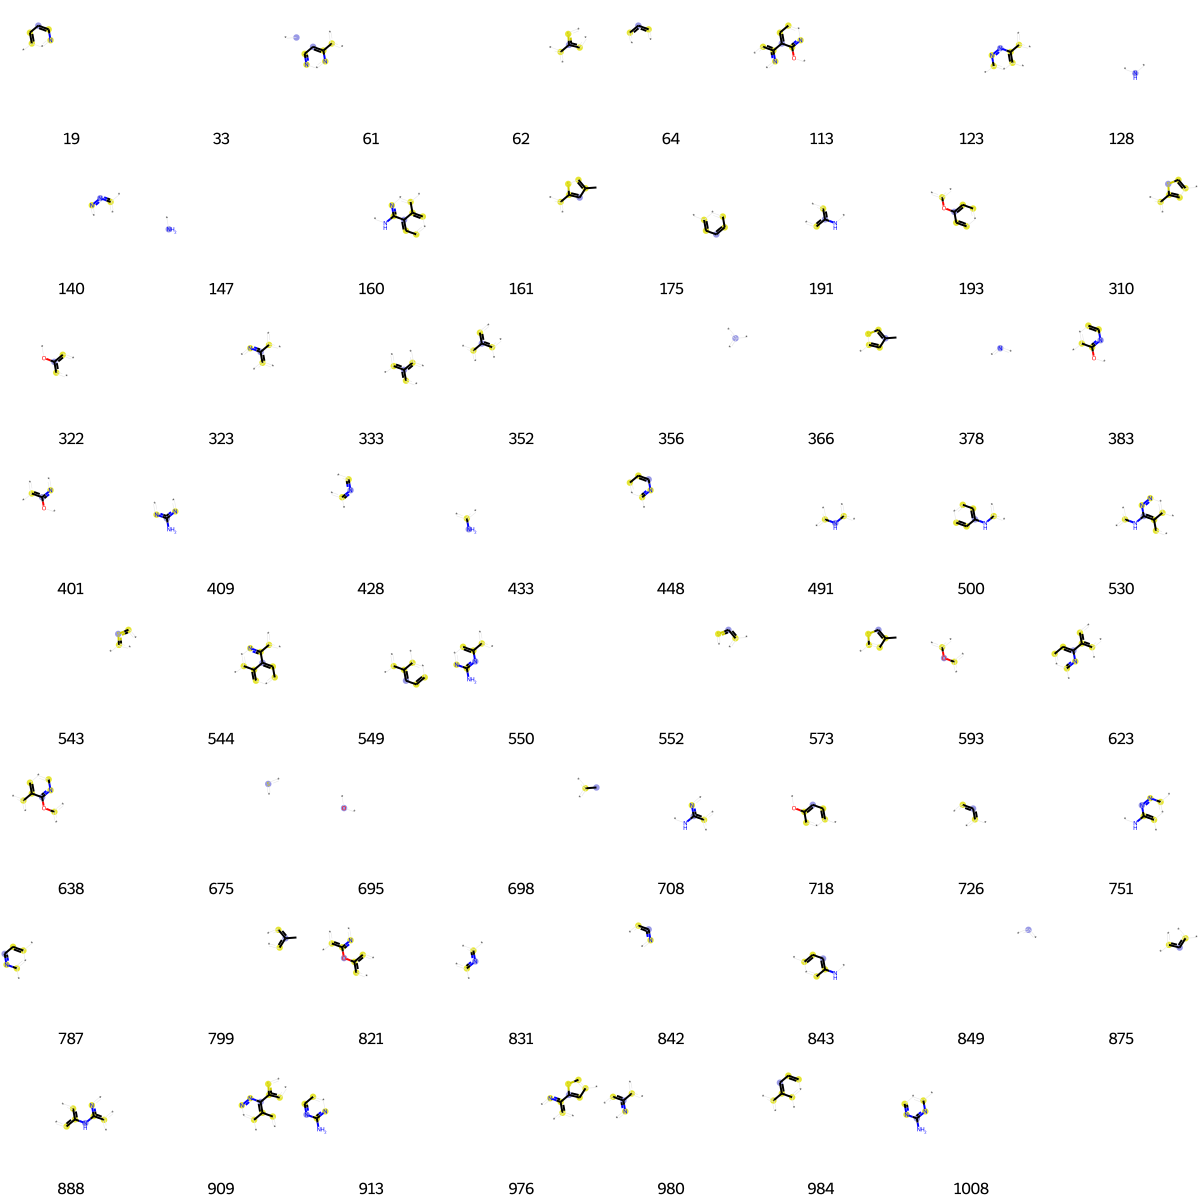

In [1586]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [1587]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[33,
 64,
 77,
 113,
 140,
 147,
 219,
 252,
 271,
 283,
 350,
 351,
 356,
 367,
 384,
 392,
 403,
 412,
 436,
 452,
 453,
 603,
 650,
 673,
 692,
 698,
 725,
 786,
 807,
 822,
 828,
 830,
 849,
 862,
 875,
 893,
 935,
 967,
 985]

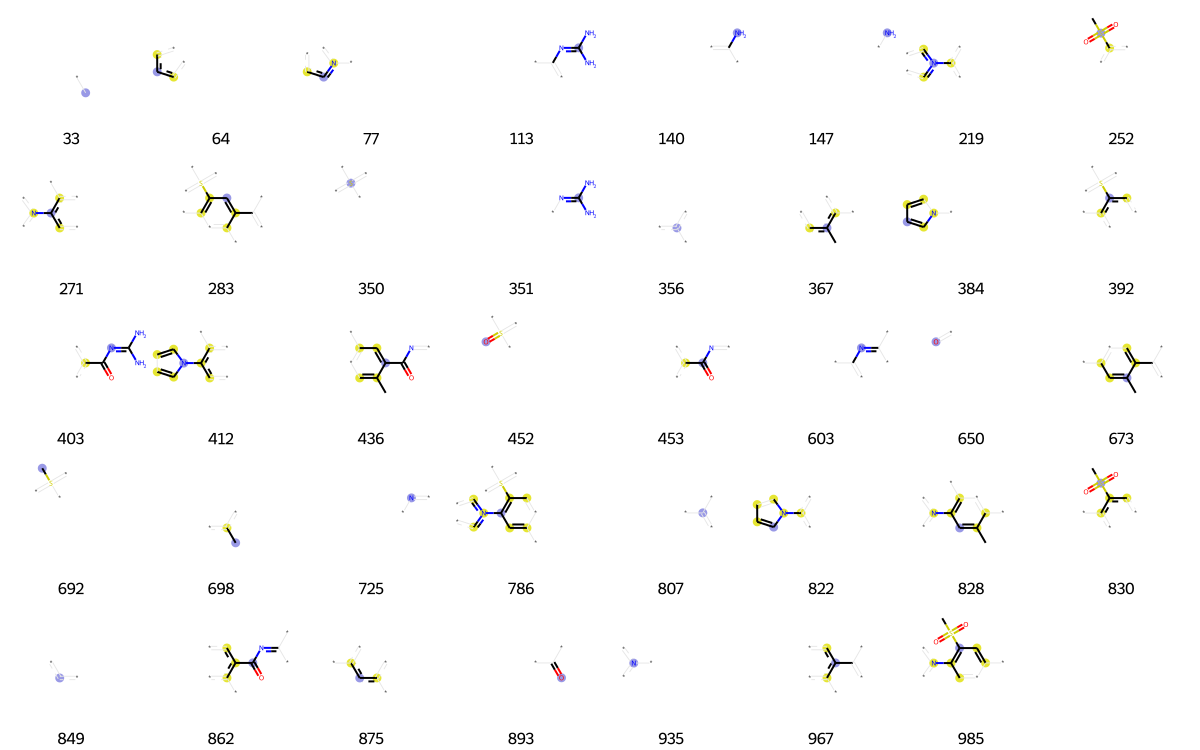

In [1588]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [1589]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[1,
 33,
 80,
 117,
 128,
 245,
 283,
 389,
 458,
 600,
 650,
 680,
 736,
 759,
 798,
 807,
 820,
 823,
 840,
 893,
 977,
 1017]

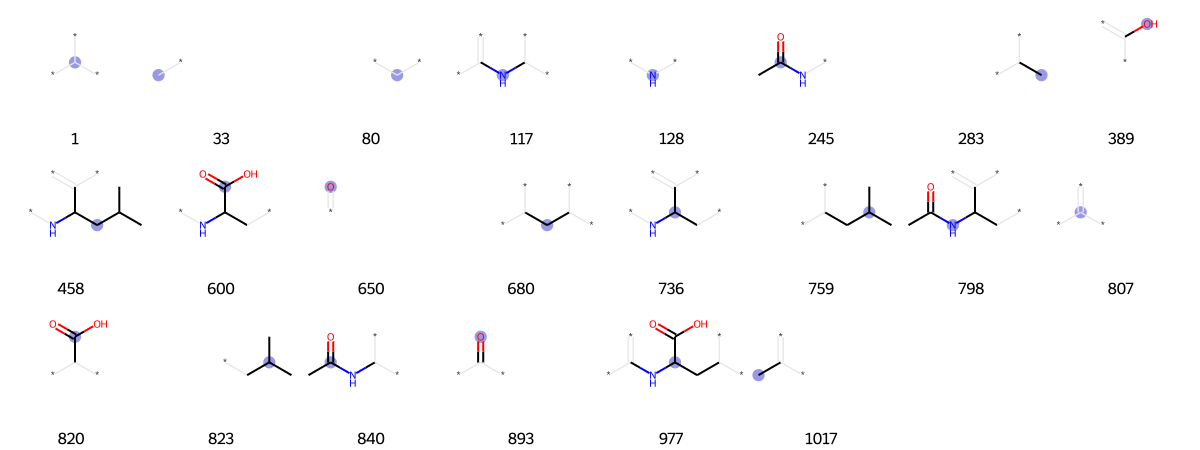

In [1590]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [1591]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[9,
 33,
 45,
 64,
 80,
 121,
 146,
 175,
 215,
 261,
 322,
 333,
 356,
 361,
 381,
 417,
 456,
 458,
 512,
 523,
 549,
 575,
 586,
 616,
 650,
 656,
 673,
 695,
 698,
 718,
 726,
 742,
 751,
 767,
 781,
 802,
 807,
 819,
 825,
 831,
 841,
 849,
 893,
 926,
 935,
 950]

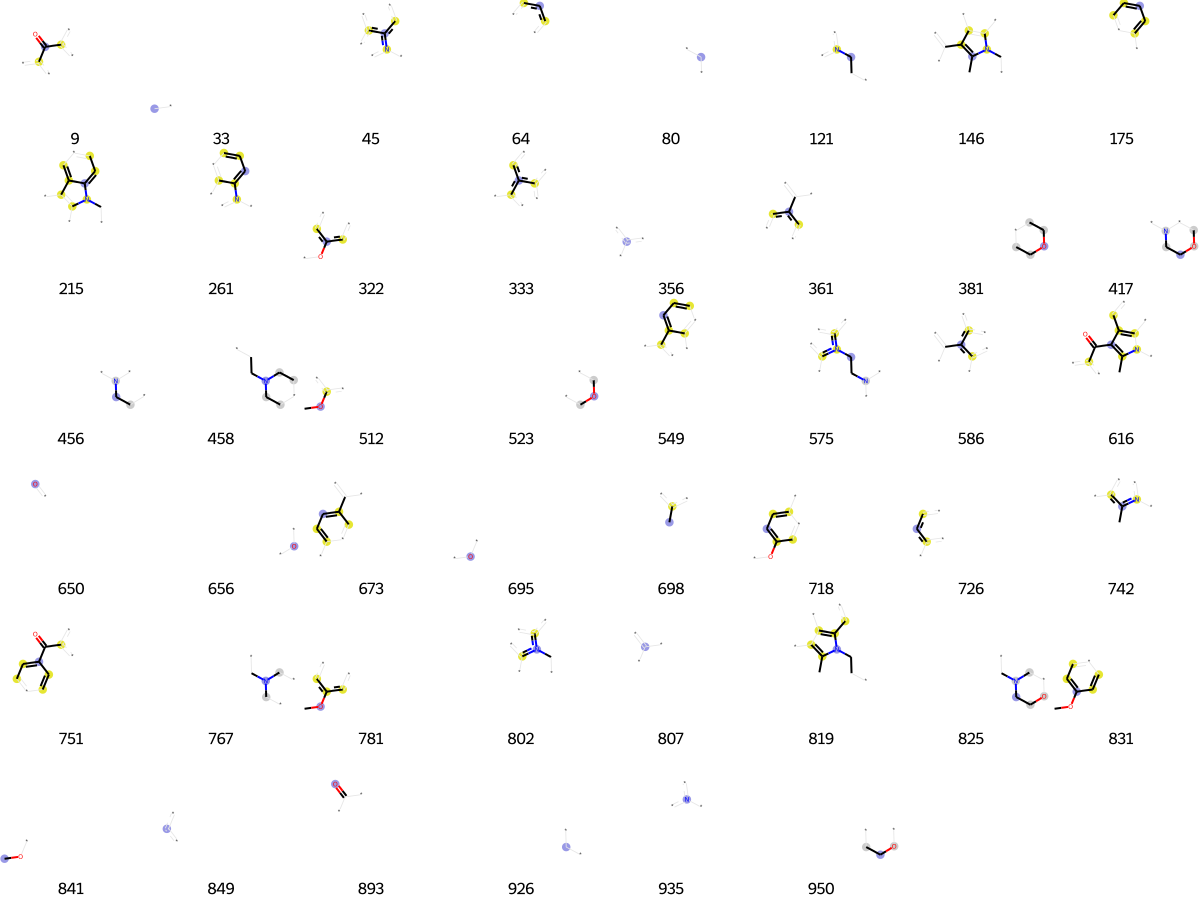

In [1592]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [1593]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[31,
 33,
 80,
 128,
 132,
 139,
 144,
 193,
 210,
 222,
 233,
 387,
 432,
 463,
 492,
 498,
 576,
 589,
 590,
 610,
 642,
 650,
 656,
 725,
 740,
 807,
 815,
 820,
 881,
 893,
 897,
 979,
 981,
 1019]

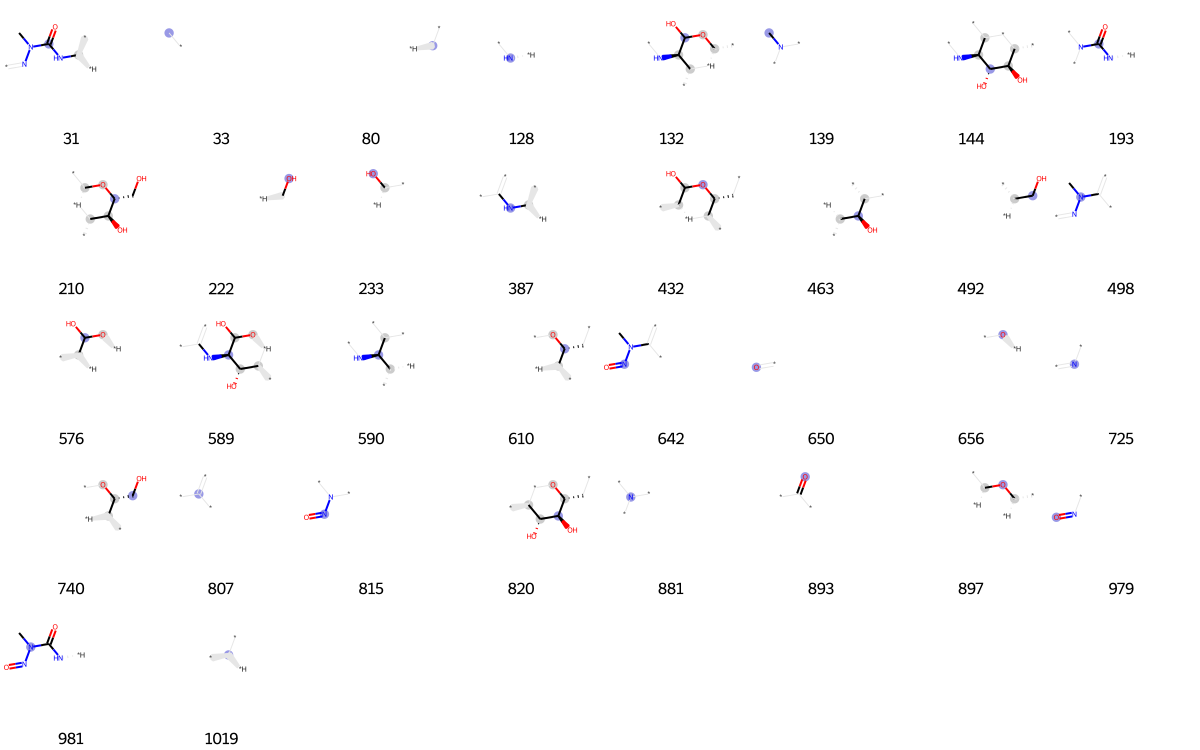

In [1594]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [1595]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 36,
 45,
 64,
 80,
 90,
 109,
 121,
 129,
 131,
 172,
 175,
 237,
 253,
 261,
 262,
 301,
 314,
 326,
 333,
 352,
 356,
 365,
 378,
 385,
 413,
 428,
 448,
 452,
 456,
 464,
 511,
 549,
 570,
 577,
 633,
 650,
 662,
 724,
 726,
 728,
 741,
 767,
 777,
 784,
 834,
 838,
 842,
 847,
 849,
 886,
 926,
 935,
 1019]

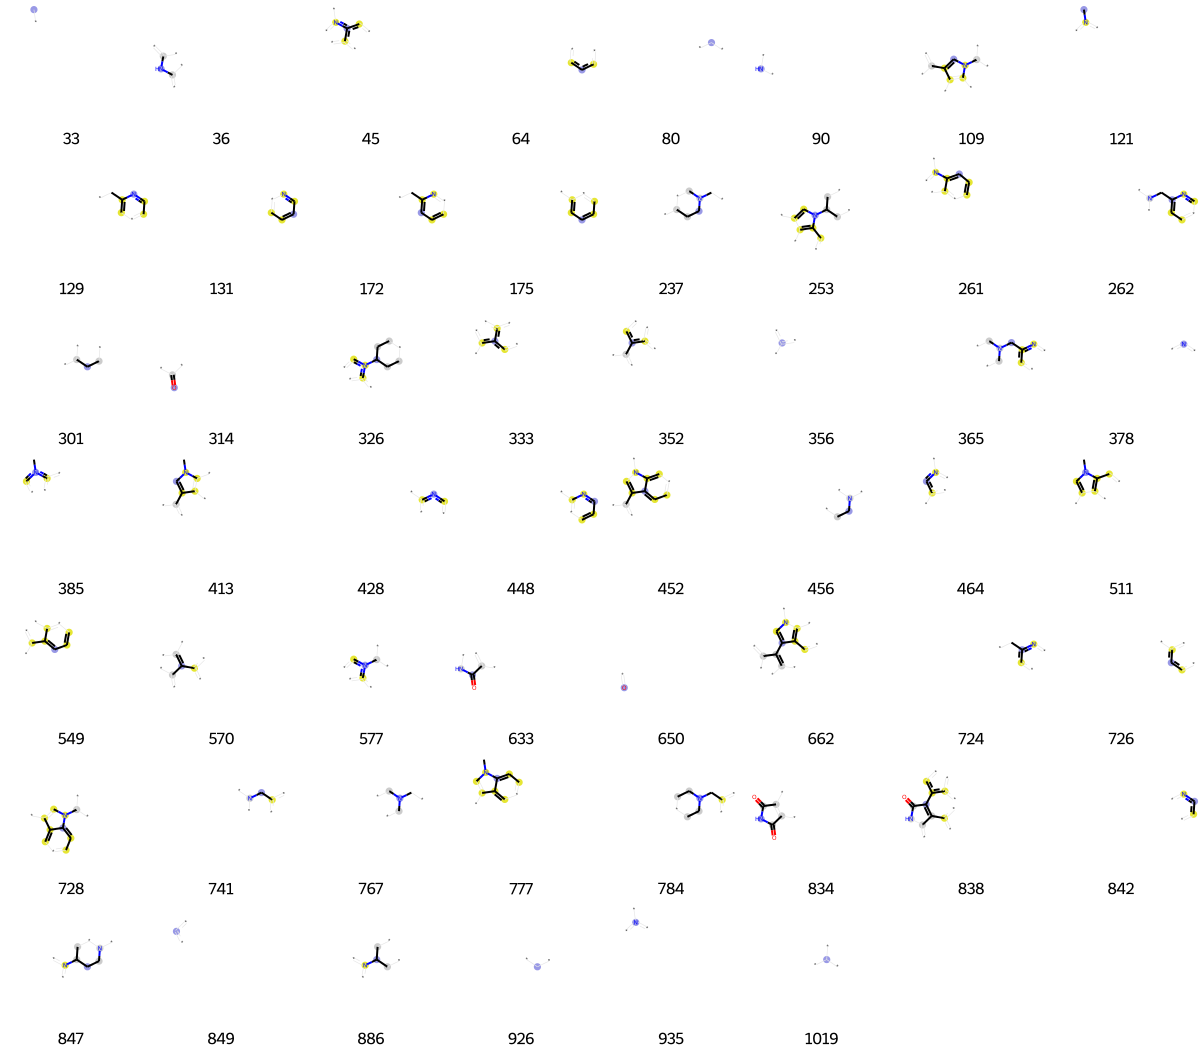

In [1596]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [1597]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[106,
 114,
 144,
 147,
 356,
 361,
 389,
 433,
 456,
 650,
 673,
 726,
 780,
 807,
 849,
 888,
 893]

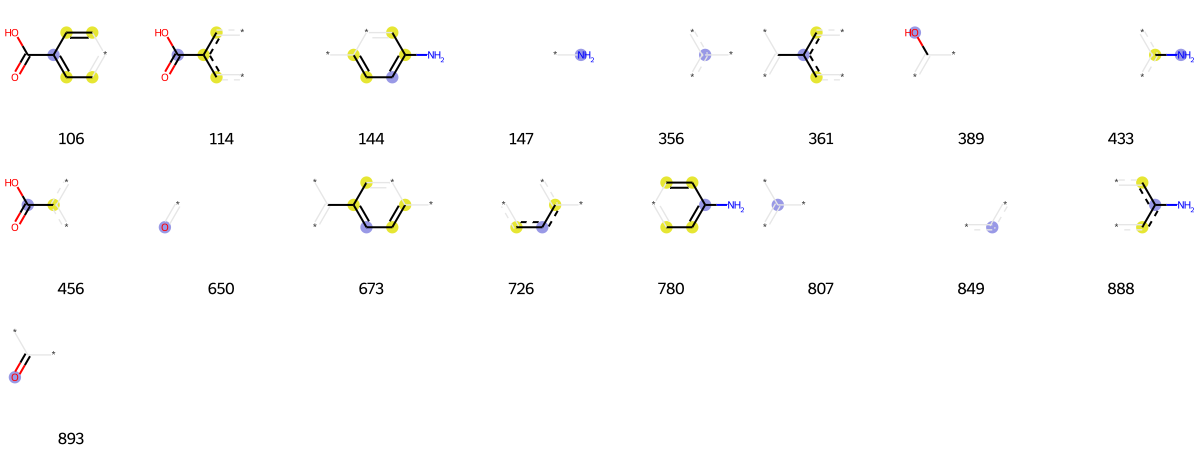

In [1598]:
prints = [(M25, x, bi) for x in fp25.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp25.GetOnBits ()])

In [1599]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[33,
 41,
 71,
 80,
 102,
 120,
 128,
 152,
 194,
 209,
 221,
 228,
 229,
 282,
 294,
 333,
 336,
 343,
 351,
 356,
 358,
 362,
 367,
 378,
 400,
 428,
 444,
 450,
 473,
 489,
 495,
 499,
 519,
 540,
 553,
 577,
 639,
 650,
 656,
 672,
 682,
 695,
 700,
 708,
 786,
 792,
 794,
 795,
 807,
 810,
 833,
 849,
 880,
 893,
 897,
 899,
 926,
 932,
 935,
 990,
 1019,
 1023]

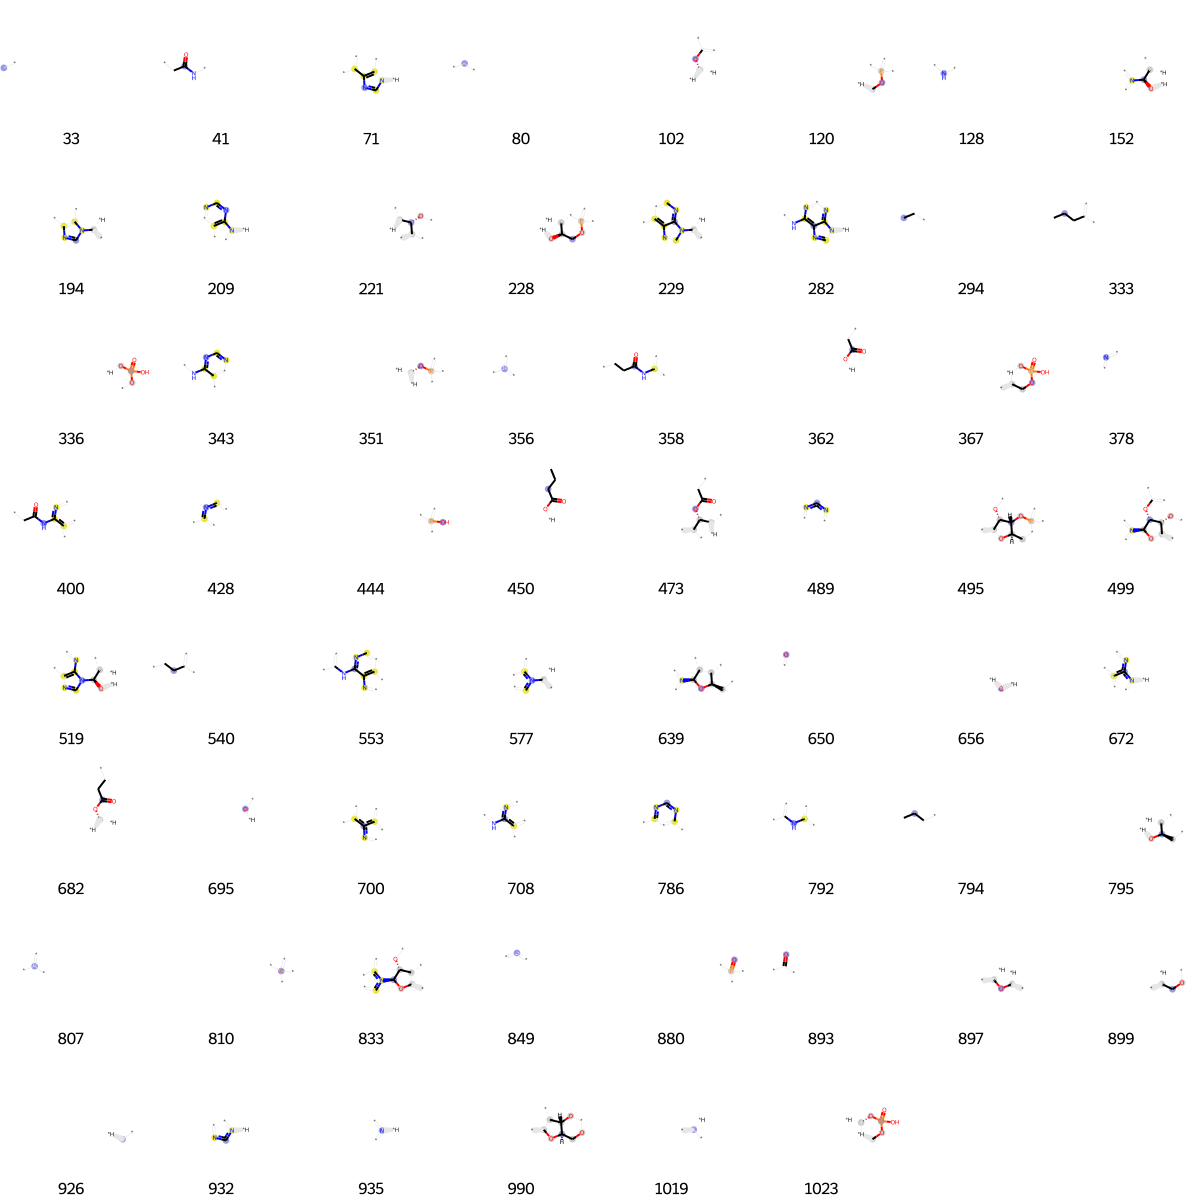

In [1600]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [1601]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 13,
 15,
 24,
 33,
 64,
 73,
 77,
 80,
 116,
 139,
 156,
 158,
 165,
 185,
 203,
 214,
 216,
 263,
 329,
 341,
 356,
 359,
 378,
 389,
 461,
 480,
 482,
 516,
 525,
 540,
 557,
 561,
 574,
 584,
 588,
 591,
 605,
 629,
 650,
 659,
 694,
 707,
 713,
 726,
 807,
 816,
 831,
 835,
 849,
 875,
 876,
 881,
 893,
 933,
 977,
 1009,
 1017]

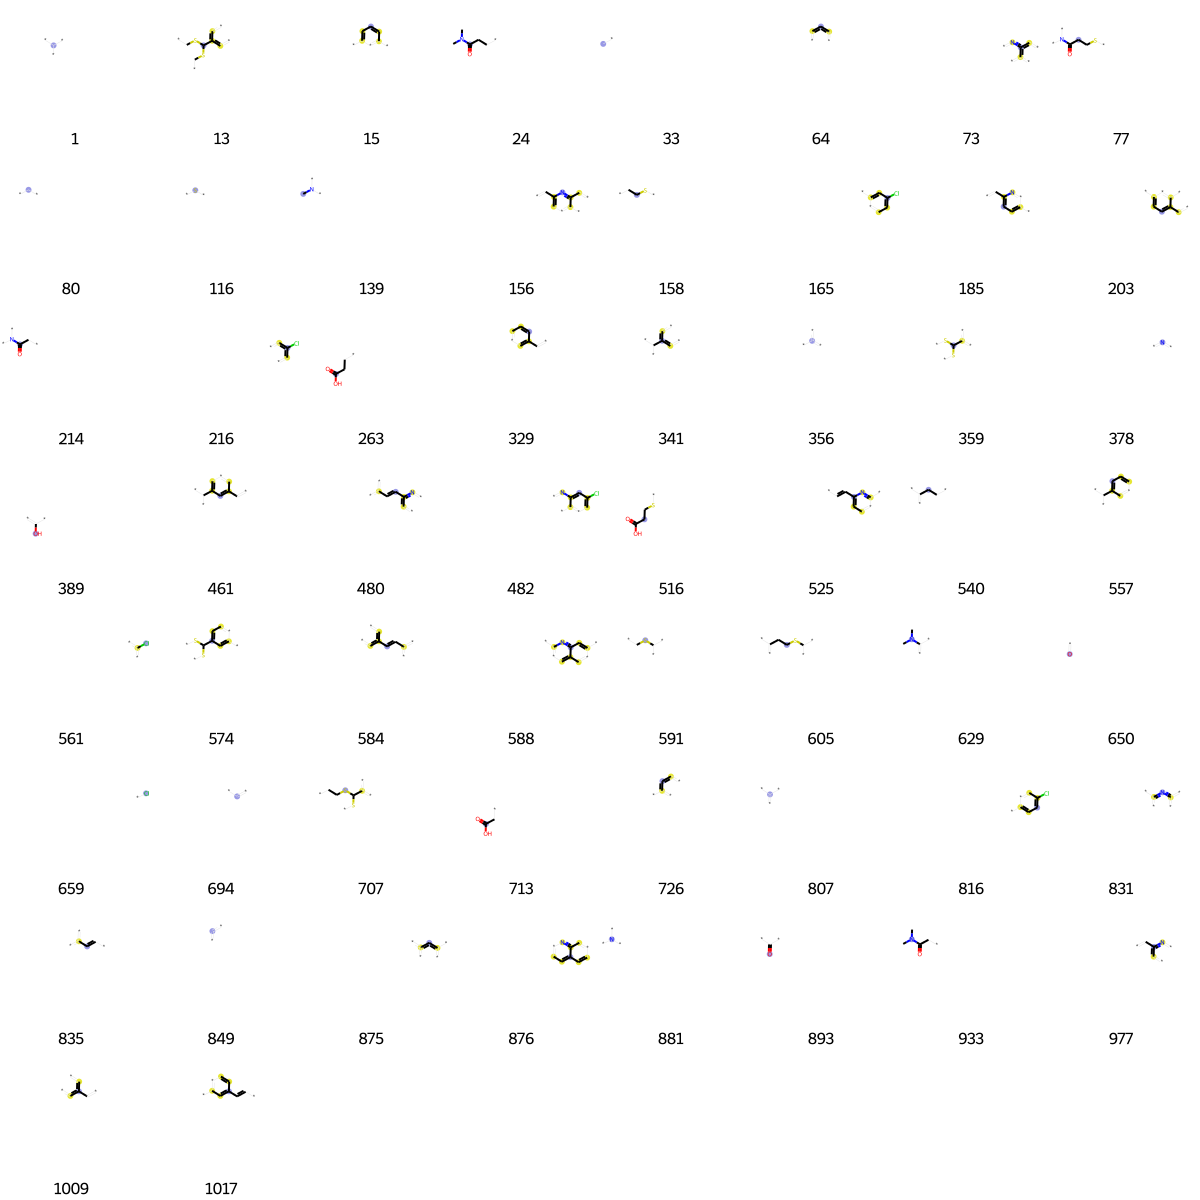

In [1602]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [1603]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[3,
 33,
 50,
 51,
 80,
 94,
 136,
 140,
 221,
 249,
 270,
 294,
 301,
 348,
 352,
 356,
 378,
 393,
 405,
 406,
 430,
 434,
 478,
 512,
 571,
 684,
 695,
 698,
 724,
 726,
 826,
 841,
 845,
 849,
 875,
 896,
 946,
 1019]

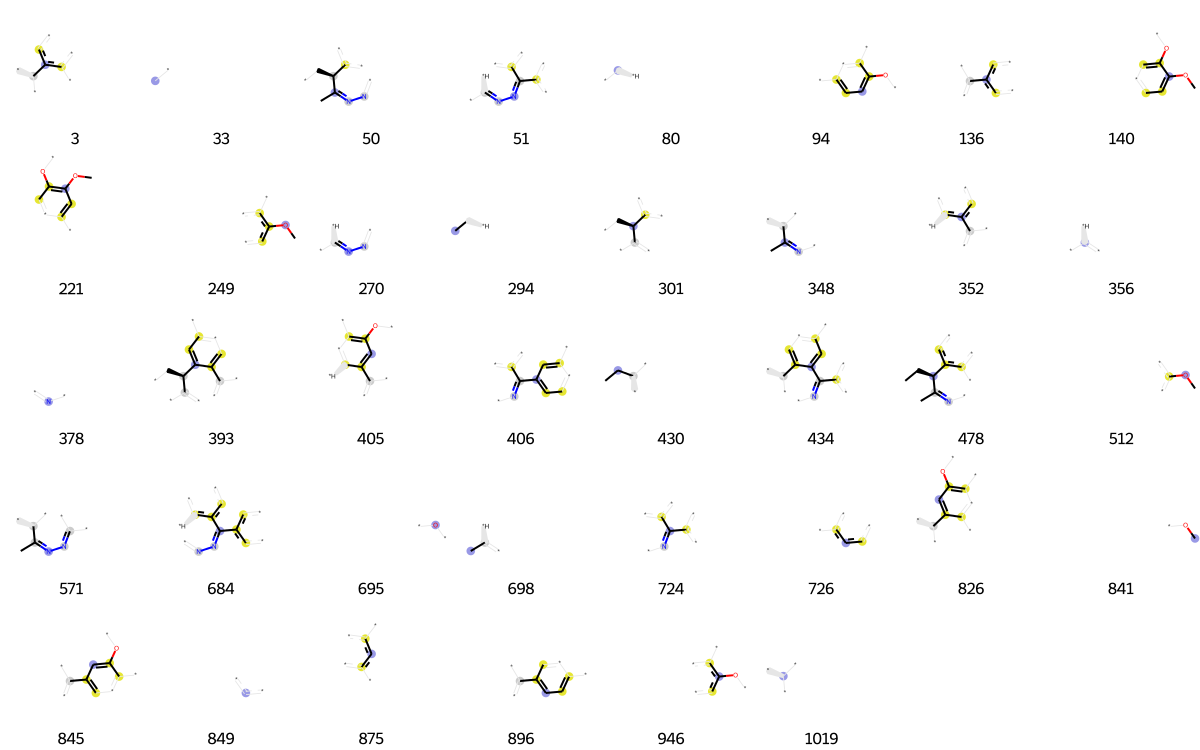

In [1604]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [1605]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[18,
 64,
 136,
 147,
 165,
 175,
 202,
 215,
 275,
 333,
 350,
 356,
 392,
 433,
 452,
 471,
 475,
 549,
 559,
 592,
 613,
 626,
 650,
 656,
 725,
 726,
 760,
 807,
 830,
 836,
 849,
 857,
 875,
 896,
 931,
 940]

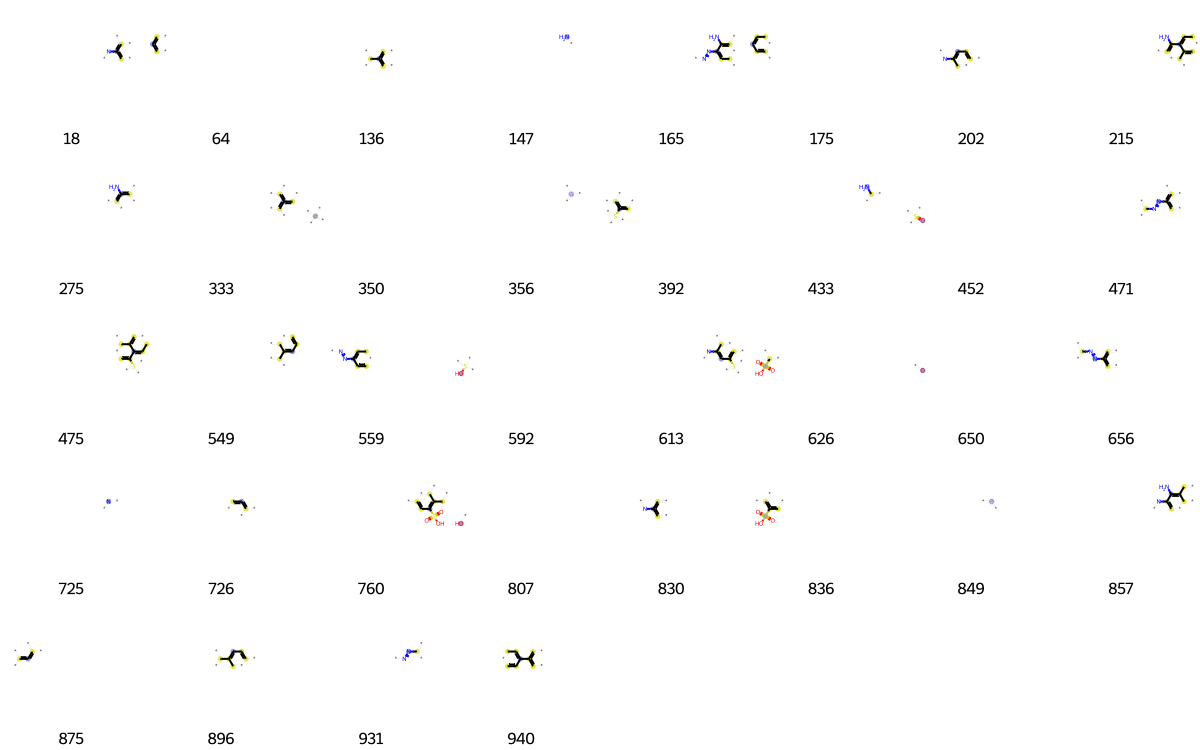

In [1606]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [1607]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[14,
 33,
 80,
 151,
 155,
 204,
 217,
 323,
 350,
 352,
 356,
 366,
 367,
 378,
 382,
 407,
 428,
 432,
 433,
 452,
 456,
 471,
 481,
 484,
 511,
 527,
 540,
 561,
 565,
 589,
 650,
 659,
 660,
 692,
 698,
 721,
 760,
 799,
 802,
 807,
 849,
 861,
 875,
 893,
 896,
 926,
 935,
 969,
 985,
 988,
 996,
 1009]

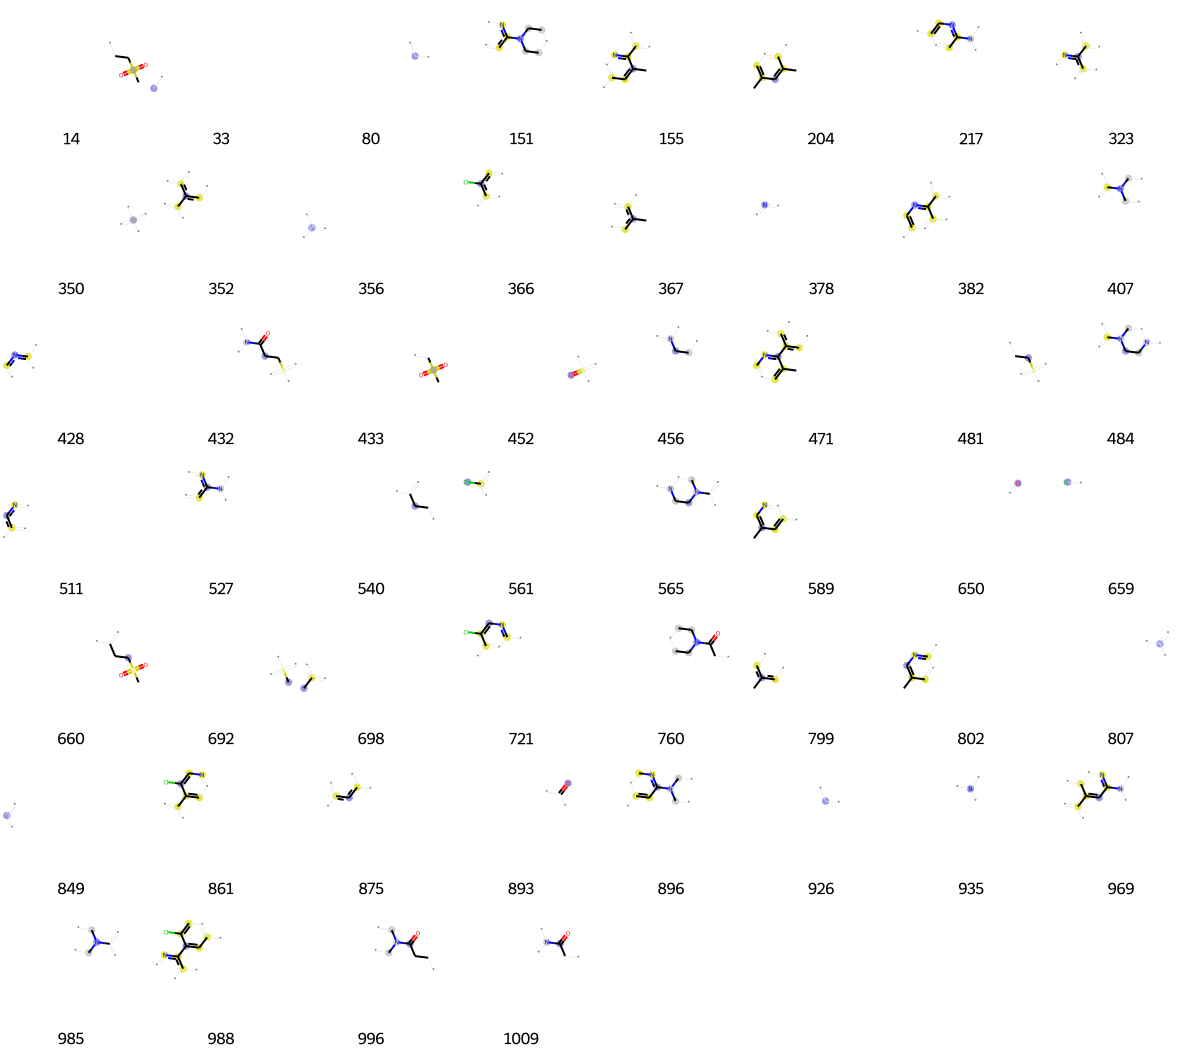

In [1608]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [1609]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[15,
 64,
 72,
 73,
 82,
 104,
 114,
 128,
 160,
 165,
 178,
 184,
 191,
 216,
 225,
 329,
 333,
 356,
 361,
 378,
 389,
 456,
 491,
 511,
 561,
 562,
 579,
 592,
 639,
 646,
 650,
 659,
 673,
 703,
 708,
 709,
 726,
 807,
 831,
 842,
 849,
 875,
 882,
 888,
 893,
 897,
 1020]

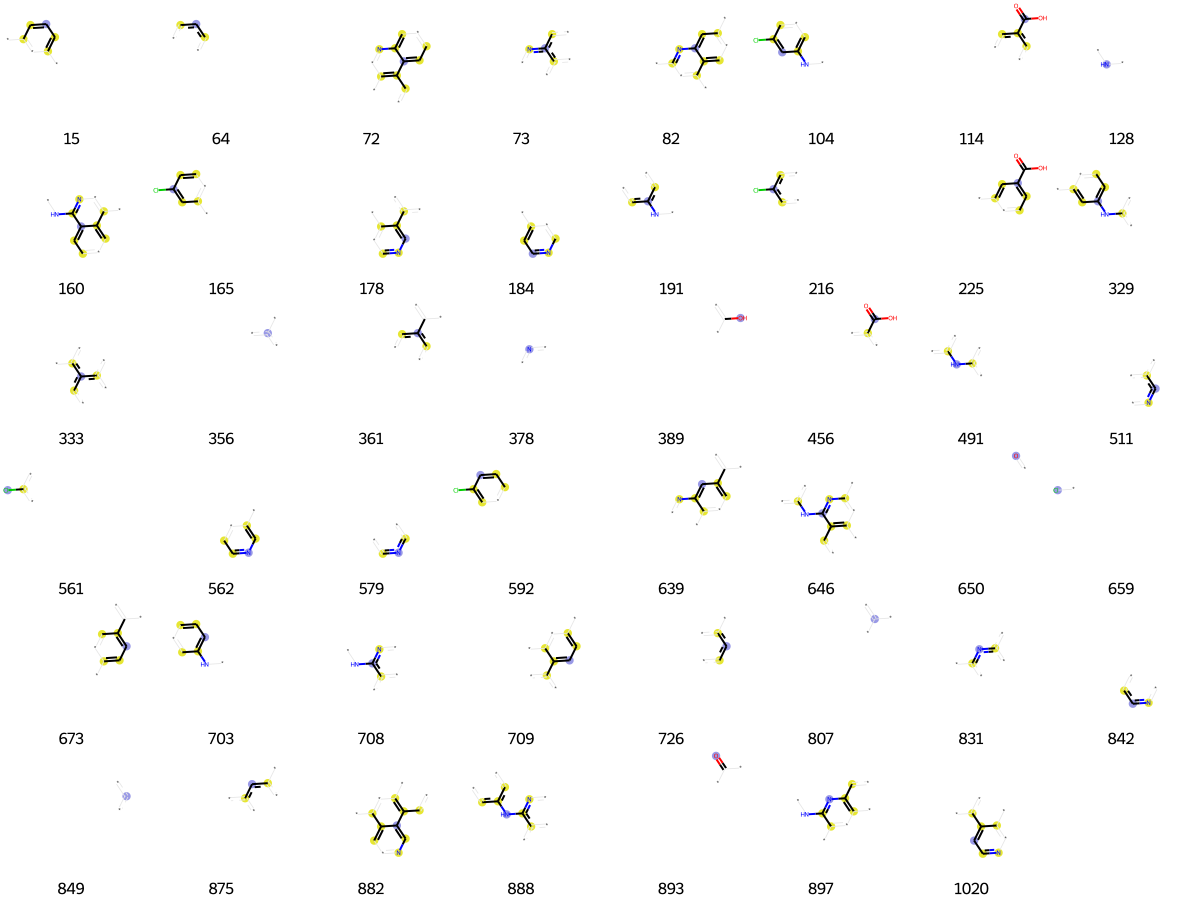

In [1610]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [1611]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[1,
 3,
 13,
 33,
 64,
 80,
 147,
 175,
 283,
 316,
 356,
 371,
 414,
 428,
 457,
 534,
 568,
 625,
 628,
 650,
 656,
 677,
 695,
 726,
 747,
 759,
 764,
 786,
 807,
 833,
 849,
 881,
 893,
 913,
 924,
 952,
 953,
 968,
 1019]

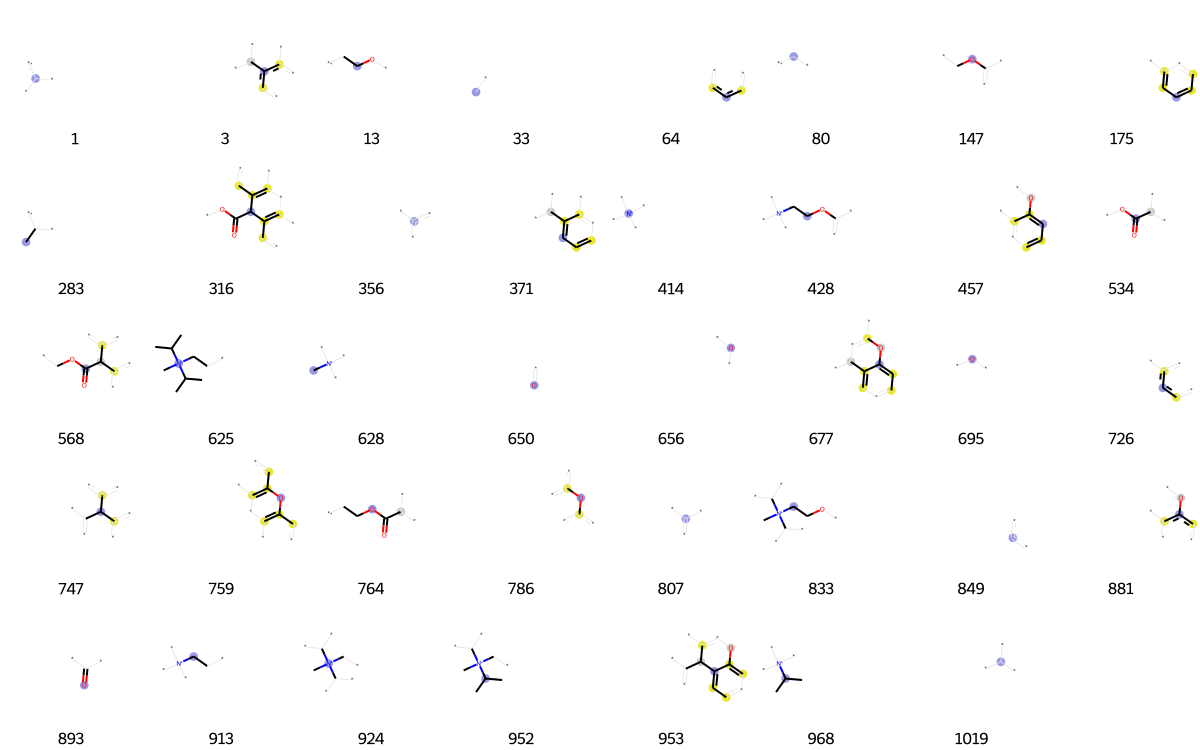

In [1612]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [1613]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[33,
 53,
 64,
 128,
 136,
 147,
 153,
 160,
 164,
 175,
 191,
 194,
 252,
 267,
 319,
 350,
 356,
 378,
 389,
 428,
 433,
 435,
 452,
 486,
 490,
 511,
 595,
 643,
 650,
 692,
 703,
 715,
 726,
 773,
 792,
 807,
 831,
 849,
 880,
 893,
 896,
 947,
 954,
 980]

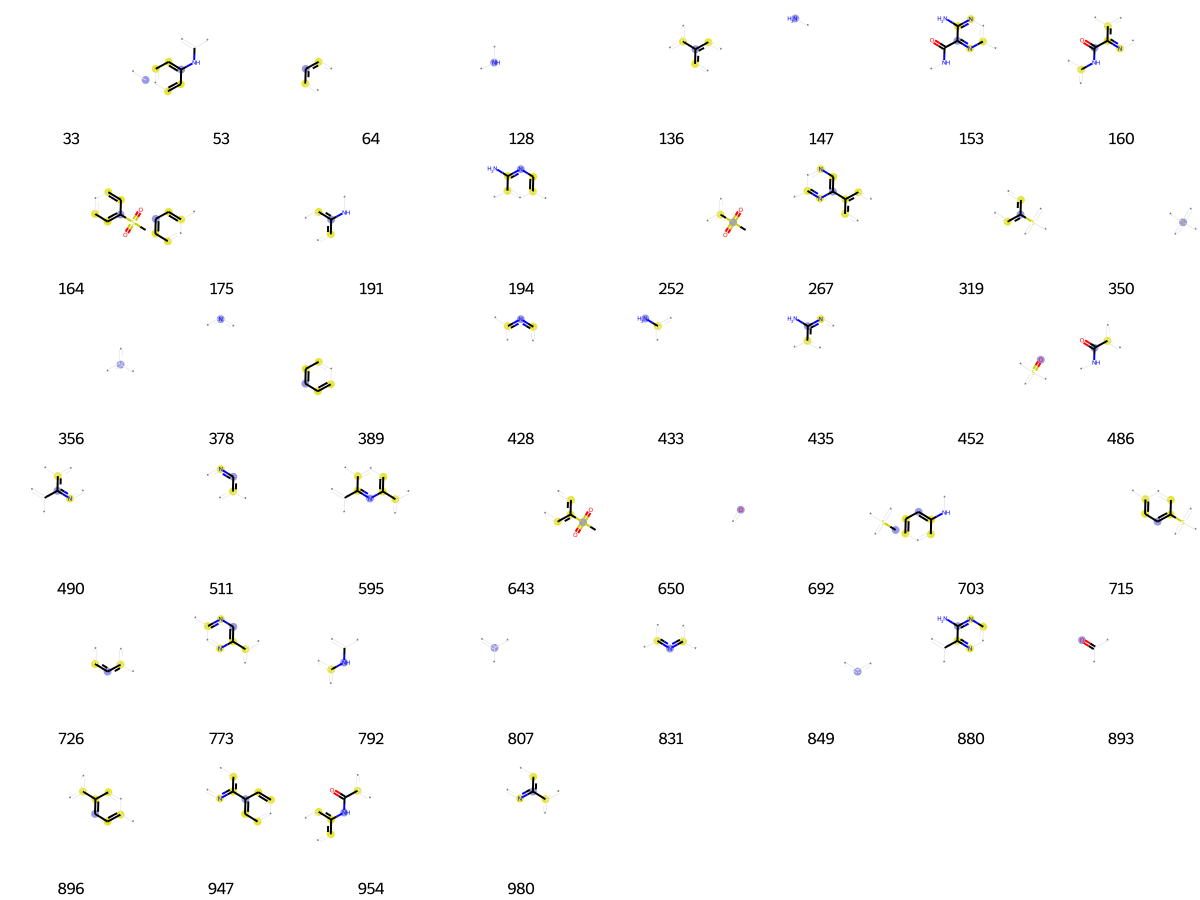

In [1614]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [1615]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[33,
 42,
 64,
 80,
 119,
 121,
 128,
 175,
 182,
 237,
 301,
 356,
 389,
 406,
 412,
 456,
 458,
 577,
 667,
 695,
 714,
 718,
 726,
 730,
 745,
 767,
 823,
 849,
 926,
 935,
 959,
 967,
 971,
 1018,
 1019]

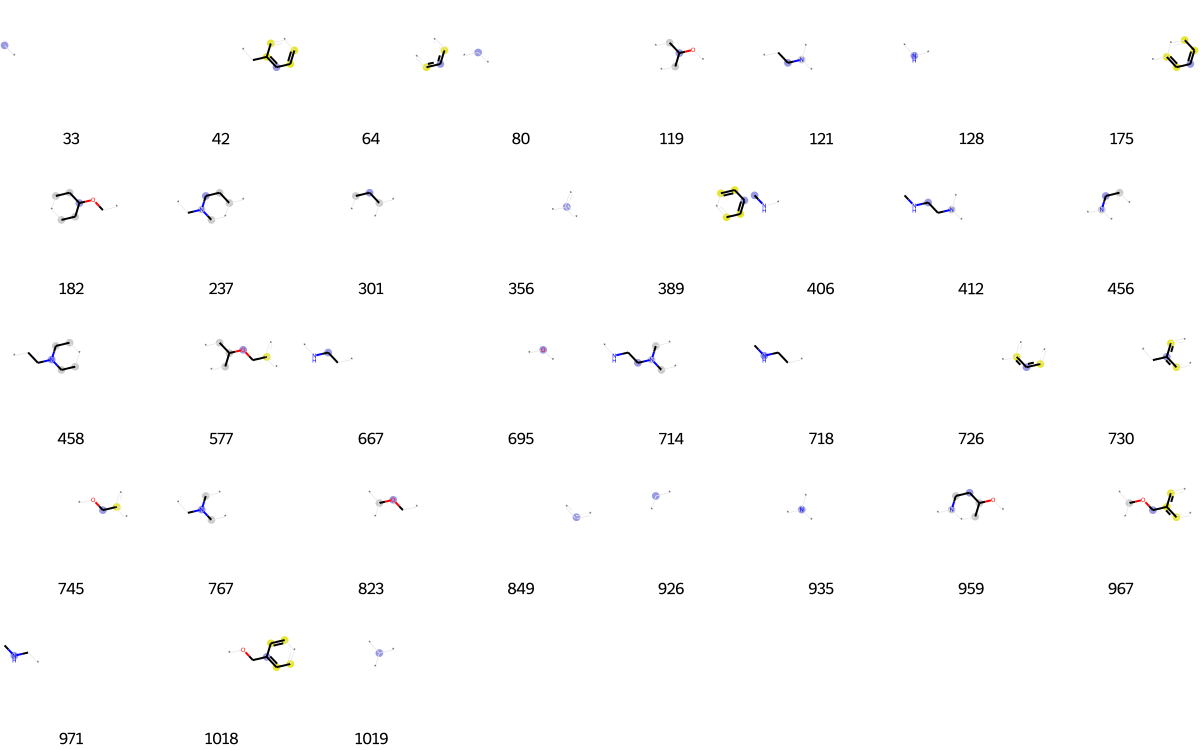

In [1616]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [1617]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[1,
 4,
 5,
 10,
 26,
 33,
 36,
 39,
 51,
 59,
 90,
 94,
 97,
 104,
 119,
 121,
 123,
 128,
 132,
 189,
 241,
 249,
 252,
 257,
 268,
 283,
 296,
 301,
 307,
 310,
 314,
 333,
 350,
 356,
 371,
 378,
 381,
 383,
 393,
 397,
 402,
 420,
 435,
 452,
 455,
 456,
 483,
 501,
 512,
 518,
 524,
 525,
 543,
 552,
 598,
 620,
 628,
 650,
 666,
 669,
 675,
 679,
 688,
 695,
 698,
 700,
 709,
 726,
 765,
 781,
 807,
 820,
 826,
 831,
 841,
 849,
 852,
 875,
 882,
 884,
 893,
 895,
 907,
 910,
 911,
 925,
 926,
 935,
 946,
 953,
 954,
 955,
 964,
 974,
 980,
 999,
 1019]

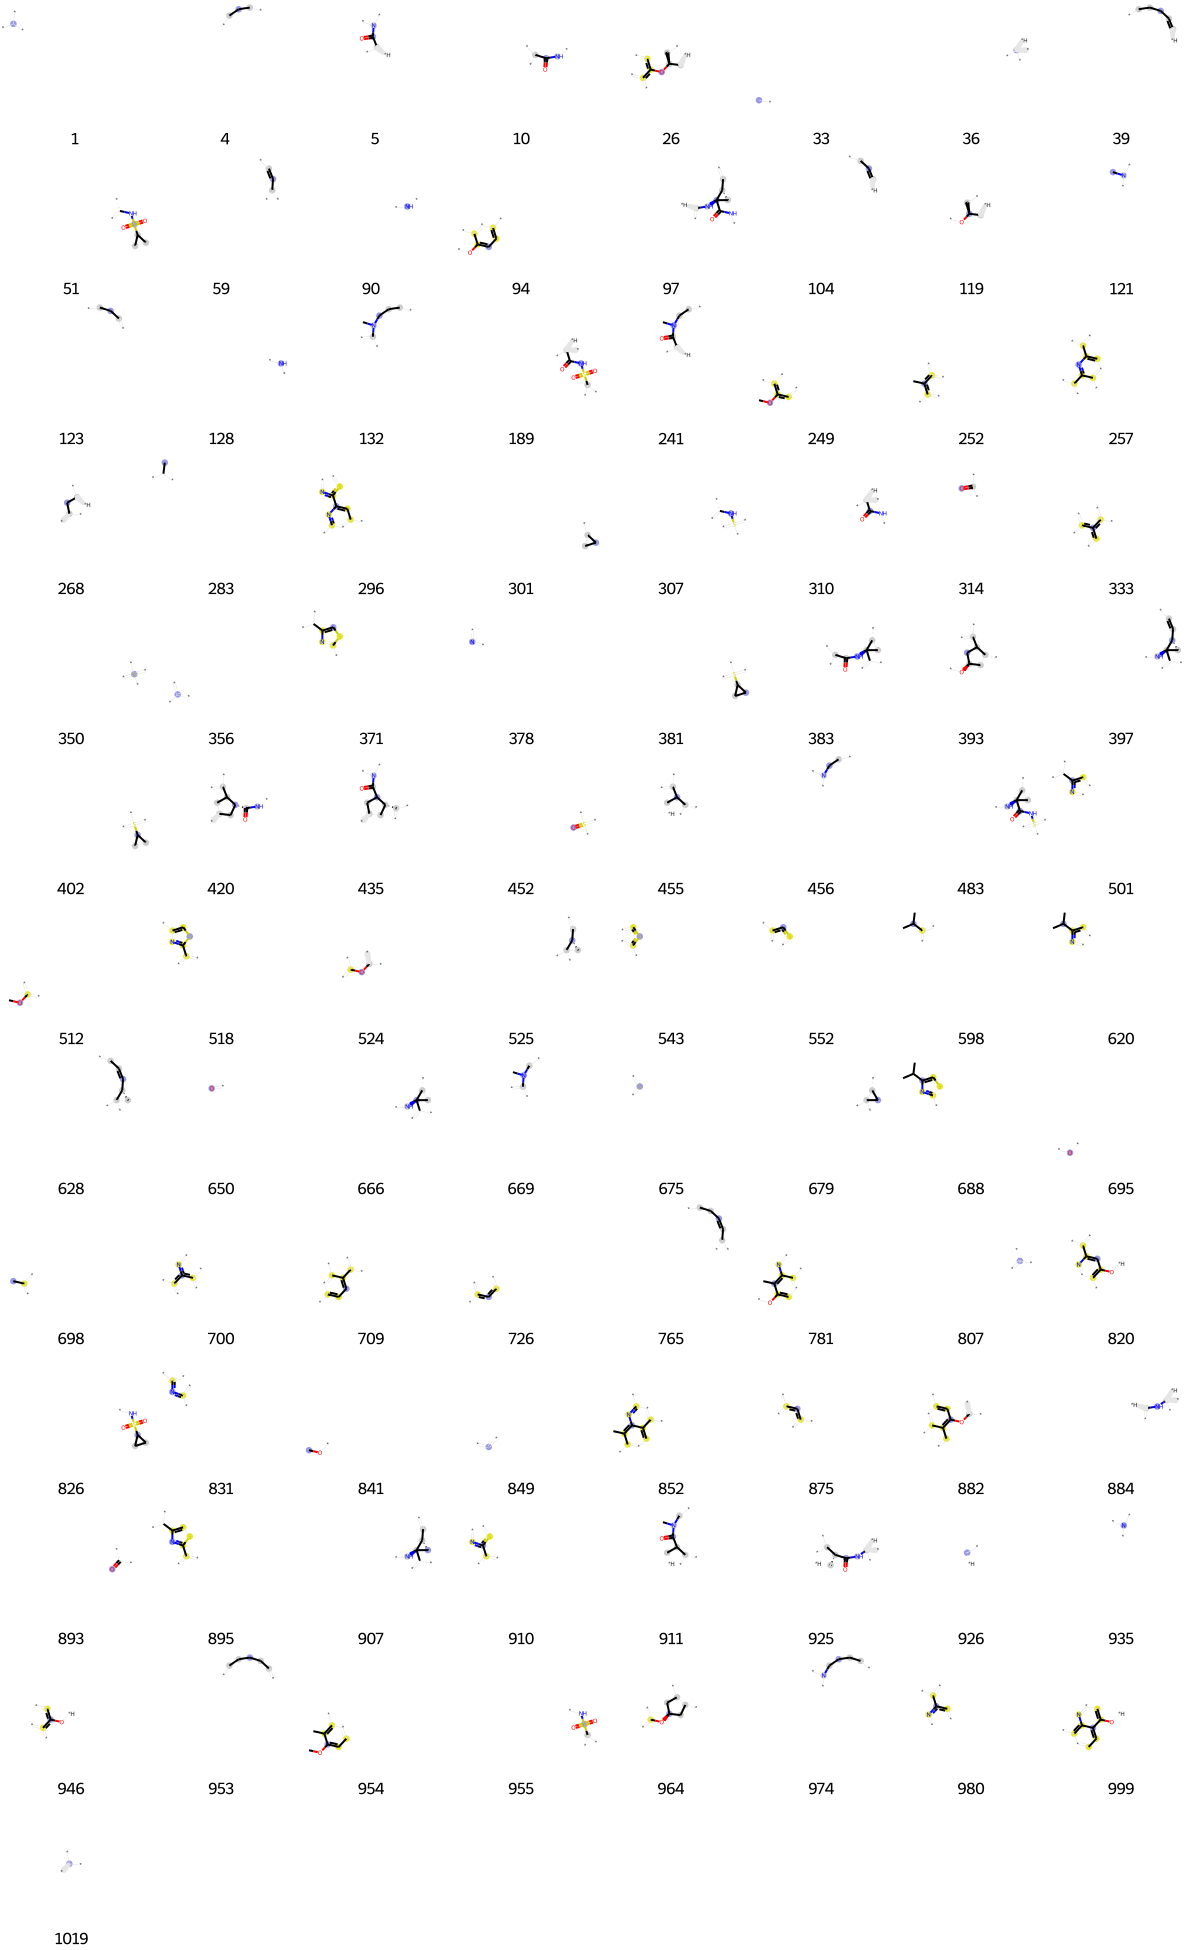

In [1618]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [1619]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[33,
 71,
 80,
 147,
 150,
 202,
 216,
 252,
 289,
 333,
 339,
 351,
 356,
 367,
 378,
 409,
 428,
 431,
 433,
 511,
 512,
 561,
 575,
 632,
 650,
 659,
 672,
 695,
 698,
 700,
 707,
 722,
 741,
 752,
 765,
 831,
 834,
 841,
 849,
 873,
 909,
 932,
 935,
 937,
 944]

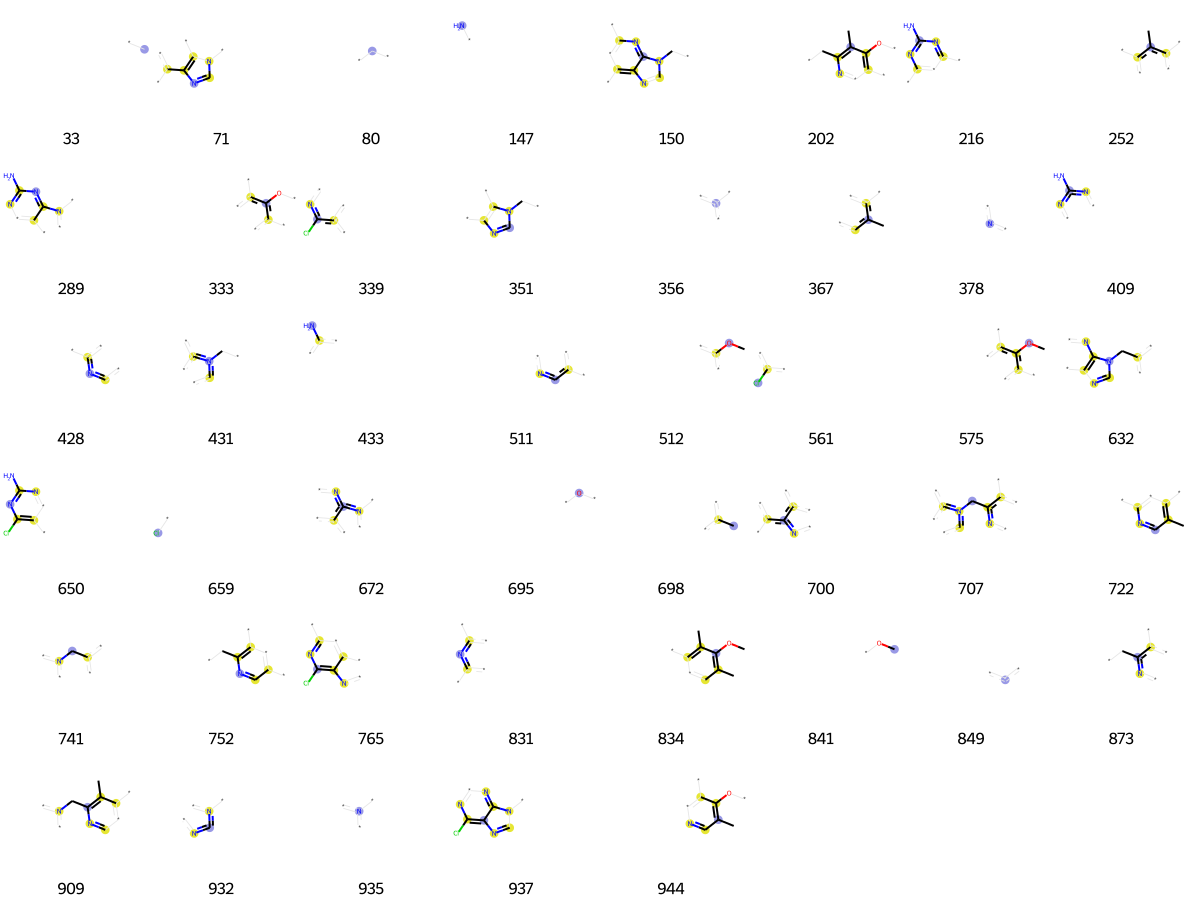

In [1620]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [1621]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[33,
 52,
 128,
 130,
 204,
 209,
 238,
 247,
 268,
 301,
 356,
 367,
 373,
 381,
 408,
 422,
 544,
 581,
 585,
 650,
 689,
 698,
 774,
 792,
 799,
 807,
 849,
 875,
 893,
 926,
 929,
 1001,
 1019,
 1023]

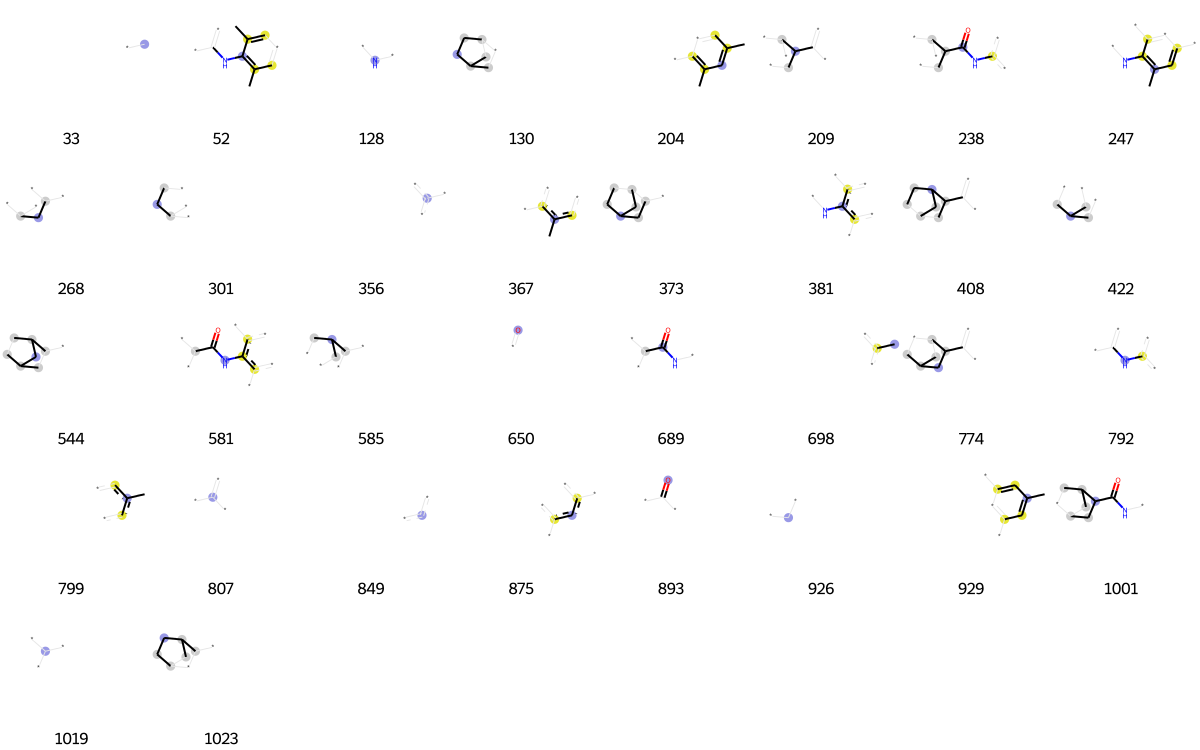

In [1622]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [1623]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[8,
 21,
 33,
 64,
 80,
 121,
 128,
 147,
 151,
 158,
 173,
 175,
 197,
 219,
 294,
 310,
 314,
 319,
 333,
 343,
 350,
 356,
 378,
 404,
 452,
 465,
 483,
 486,
 490,
 504,
 549,
 554,
 583,
 650,
 667,
 688,
 715,
 726,
 730,
 794,
 807,
 820,
 828,
 833,
 849,
 851,
 893,
 903,
 932,
 935]

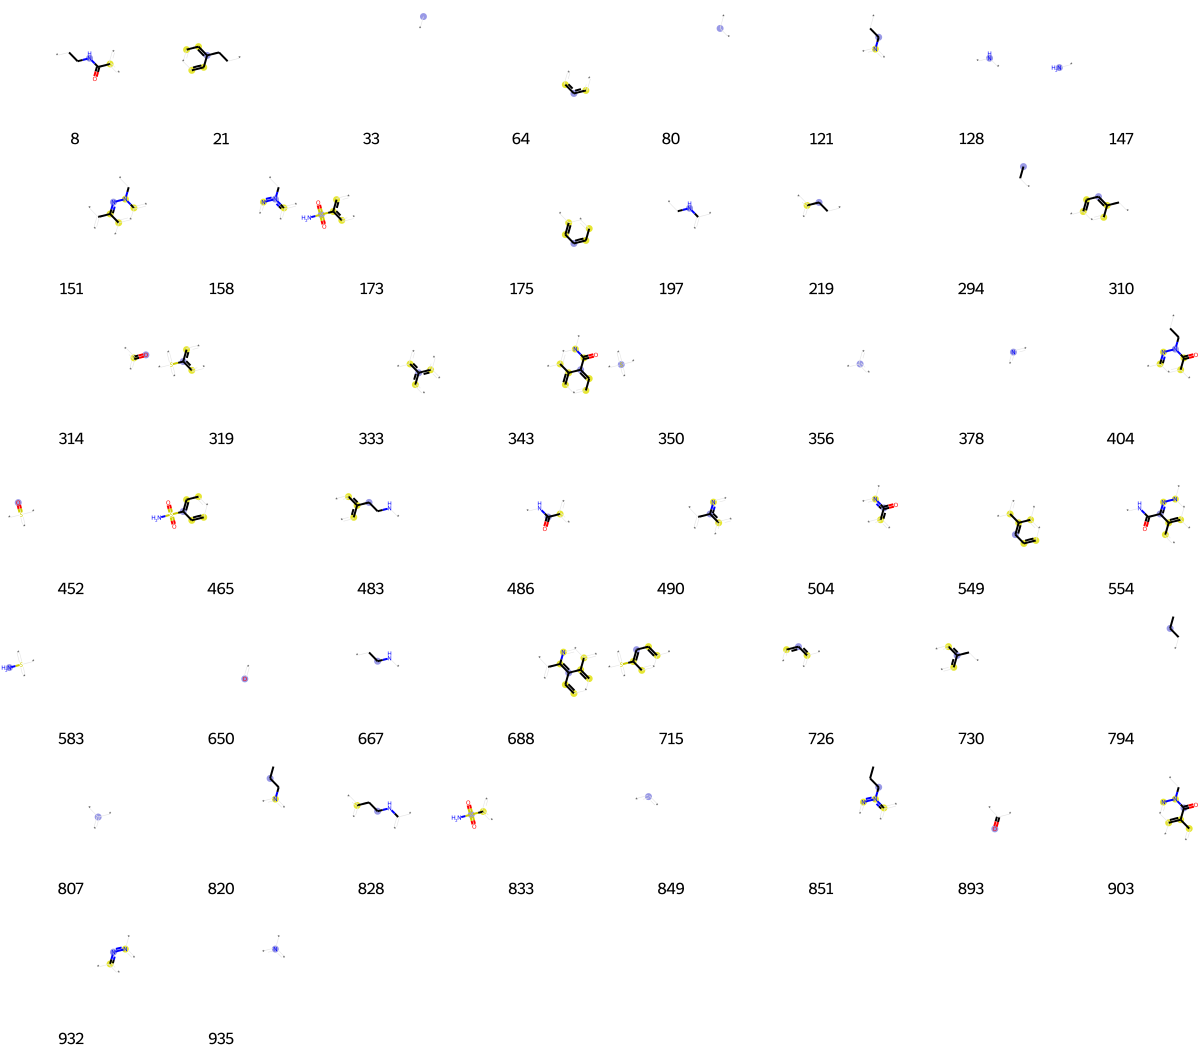

In [1624]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [1625]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[56,
 128,
 184,
 191,
 356,
 366,
 378,
 530,
 557,
 561,
 650,
 659,
 666,
 726,
 792,
 807,
 843,
 849,
 875,
 893,
 965,
 966]

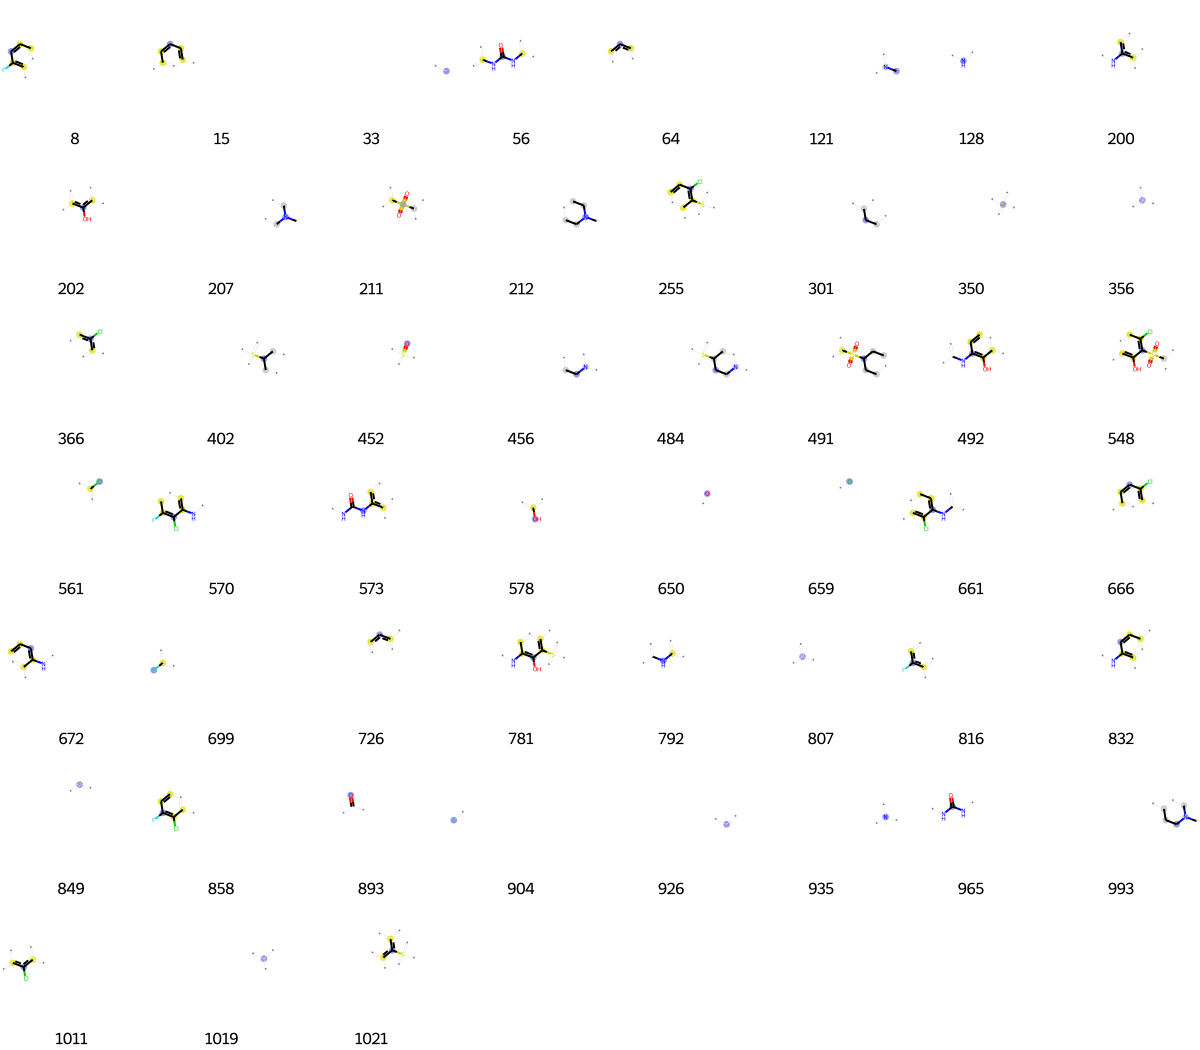

In [1626]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [1627]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[3,
 14,
 16,
 19,
 33,
 43,
 64,
 68,
 74,
 77,
 80,
 114,
 121,
 123,
 128,
 166,
 184,
 191,
 207,
 212,
 262,
 325,
 356,
 361,
 367,
 378,
 389,
 412,
 419,
 428,
 429,
 430,
 456,
 486,
 511,
 526,
 546,
 597,
 613,
 615,
 617,
 650,
 667,
 673,
 674,
 682,
 698,
 717,
 726,
 741,
 755,
 767,
 768,
 771,
 784,
 792,
 807,
 809,
 819,
 838,
 842,
 843,
 849,
 875,
 893,
 904,
 923,
 926,
 933,
 935,
 954,
 1019]

In [1628]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[11,
 14,
 33,
 80,
 93,
 145,
 147,
 222,
 275,
 356,
 367,
 381,
 417,
 456,
 523,
 543,
 553,
 554,
 650,
 656,
 675,
 695,
 698,
 726,
 760,
 781,
 807,
 837,
 849,
 881,
 893,
 926,
 935,
 950,
 967,
 973,
 980,
 985,
 1009]

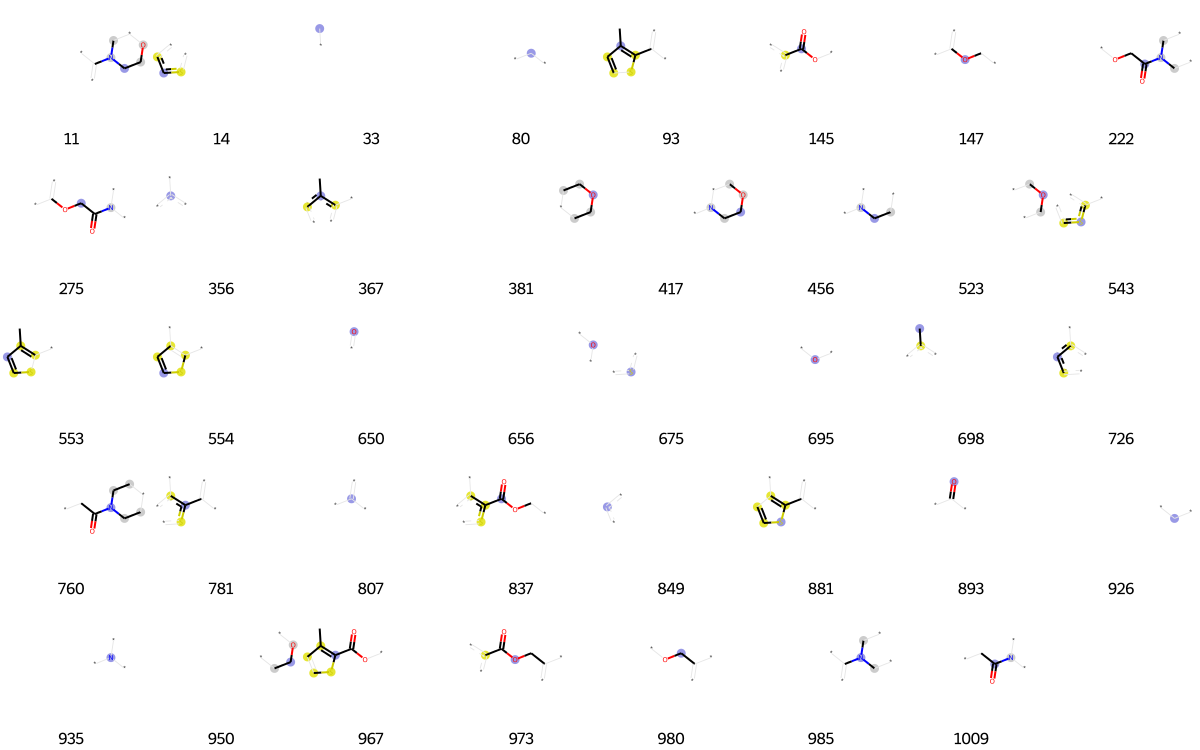

In [1629]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [1630]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[15,
 33,
 64,
 73,
 86,
 89,
 90,
 116,
 119,
 218,
 245,
 260,
 286,
 311,
 356,
 366,
 373,
 378,
 386,
 394,
 408,
 561,
 576,
 585,
 593,
 659,
 694,
 695,
 699,
 702,
 721,
 726,
 831,
 849,
 875,
 946,
 951,
 974,
 1011]

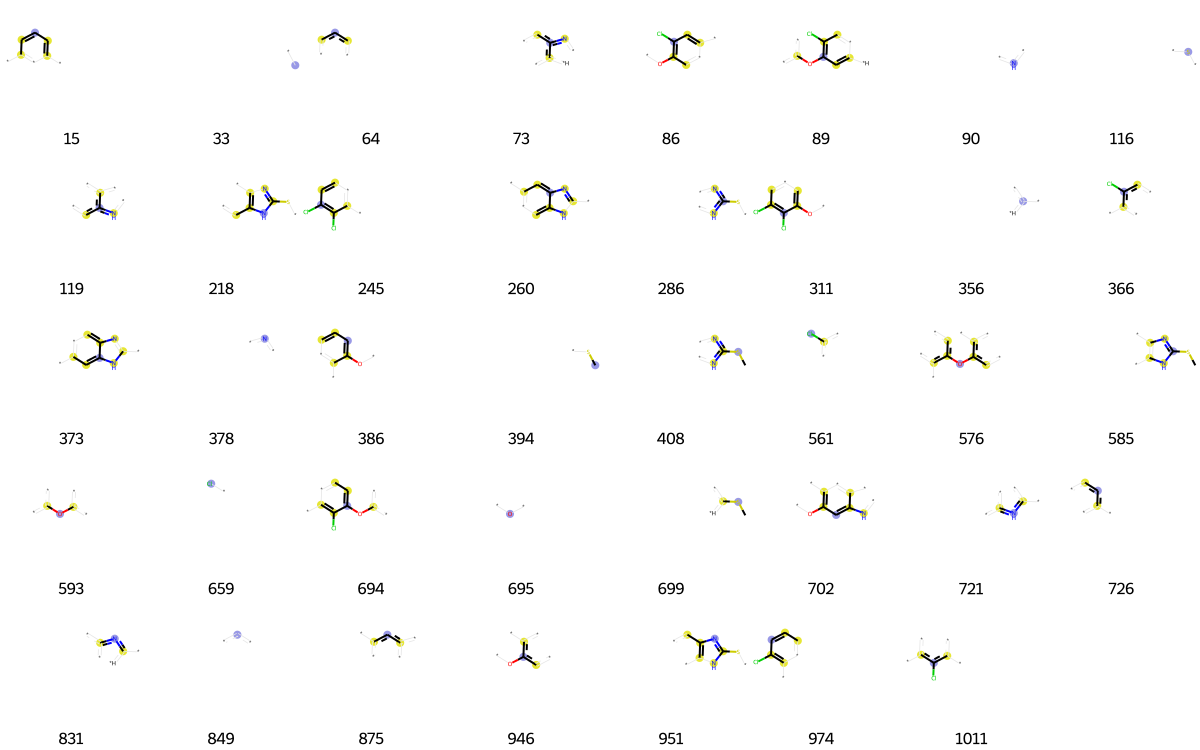

In [1631]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [1632]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 33,
 80,
 86,
 121,
 136,
 158,
 182,
 204,
 263,
 322,
 336,
 356,
 378,
 389,
 512,
 540,
 623,
 650,
 667,
 672,
 695,
 713,
 718,
 726,
 781,
 807,
 824,
 831,
 841,
 849,
 859,
 887,
 893,
 896,
 932,
 935,
 947,
 980,
 992,
 1021]

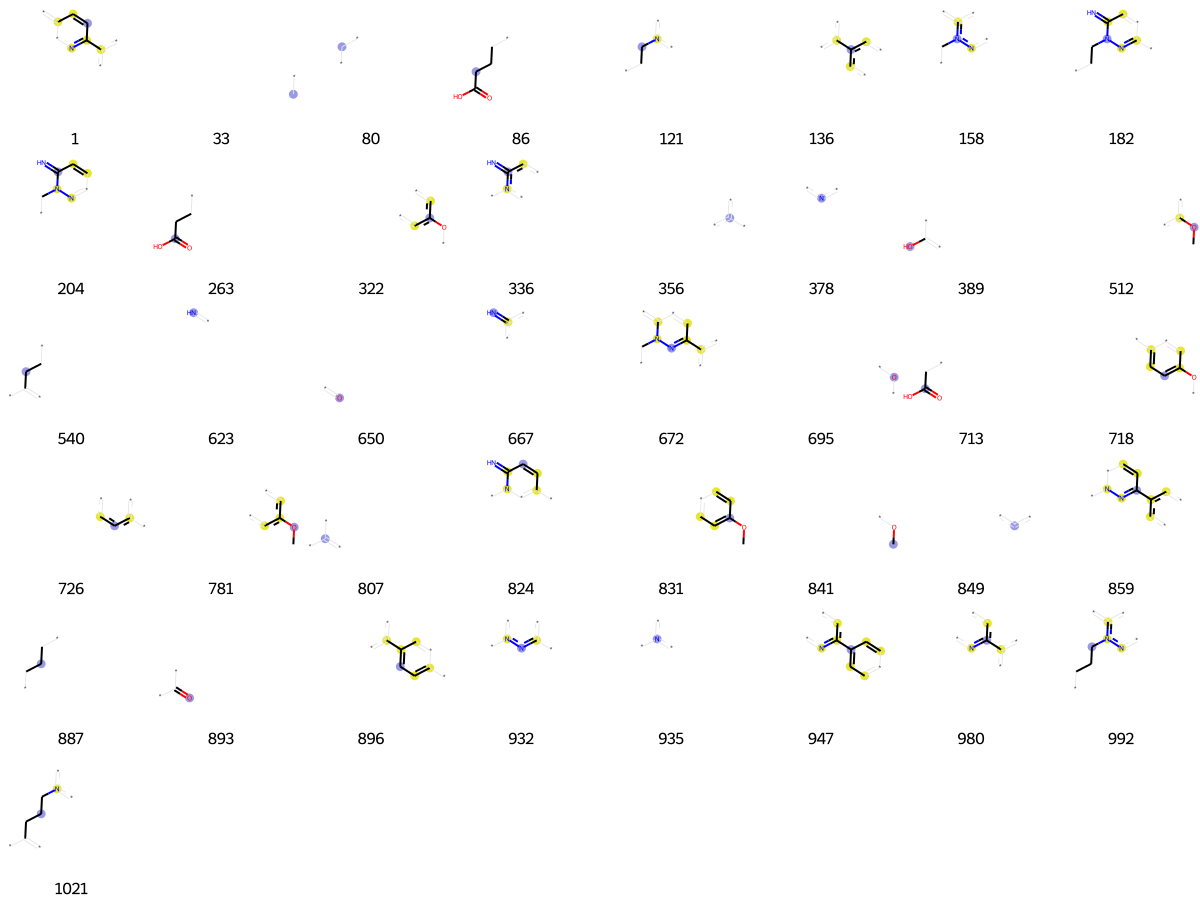

In [1633]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [1634]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[29,
 32,
 33,
 64,
 65,
 84,
 90,
 119,
 128,
 147,
 173,
 175,
 200,
 233,
 249,
 251,
 260,
 301,
 323,
 328,
 333,
 335,
 352,
 356,
 366,
 378,
 407,
 428,
 439,
 453,
 456,
 458,
 491,
 496,
 511,
 512,
 544,
 546,
 549,
 555,
 558,
 561,
 600,
 659,
 687,
 695,
 721,
 726,
 759,
 801,
 806,
 808,
 831,
 832,
 841,
 849,
 855,
 875,
 913,
 926,
 935,
 946,
 1019]

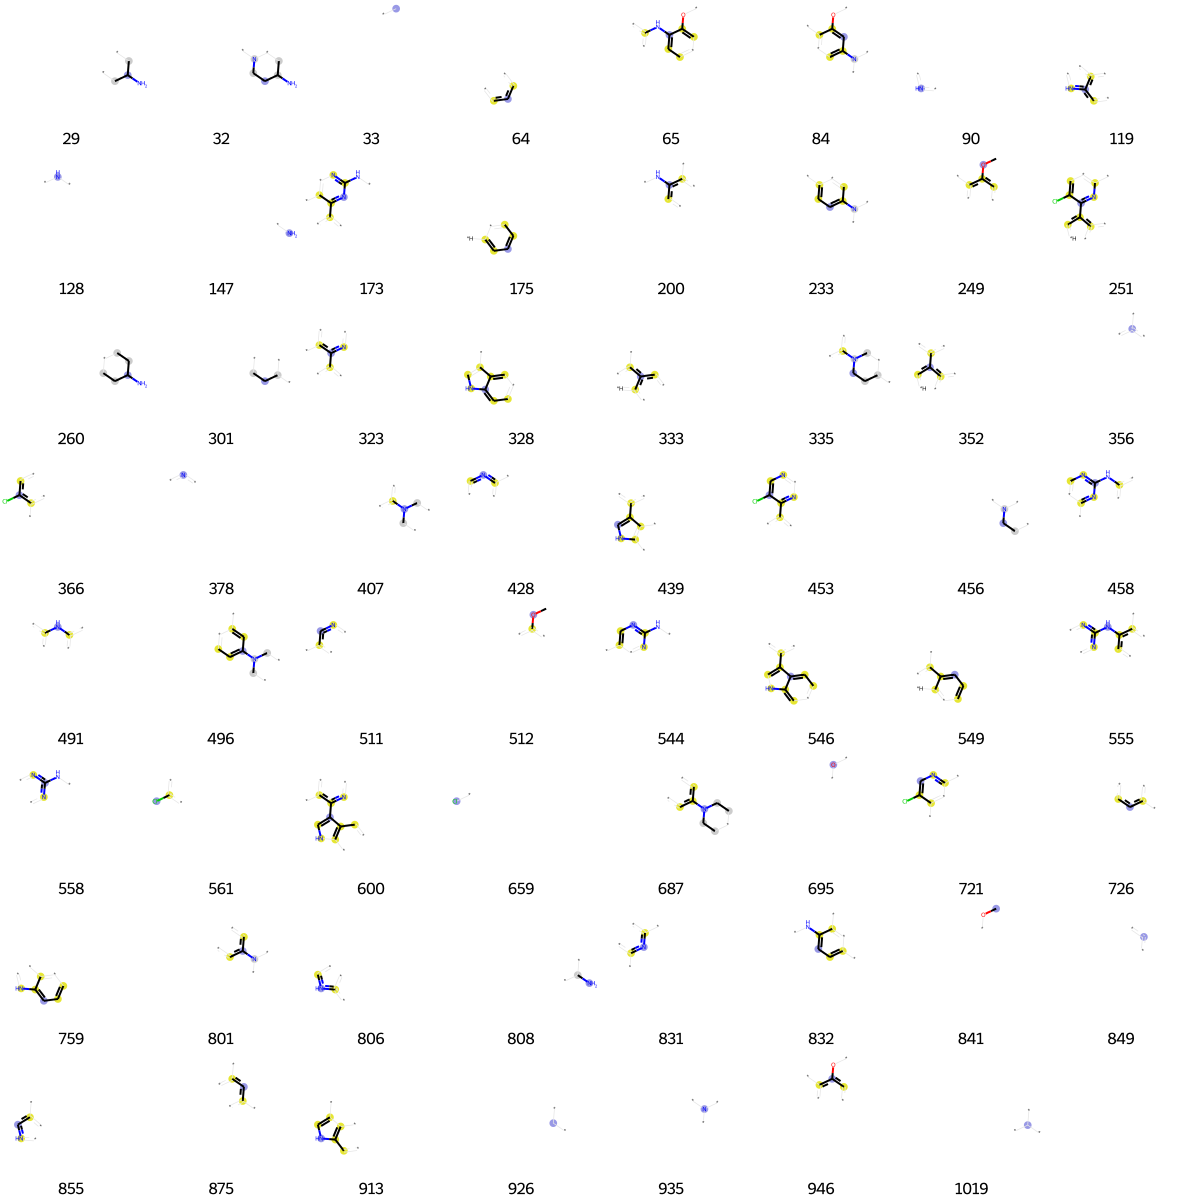

In [1635]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [1636]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[80, 86, 147, 263, 389, 493, 540, 650, 713, 749, 807, 816, 887, 893, 981]

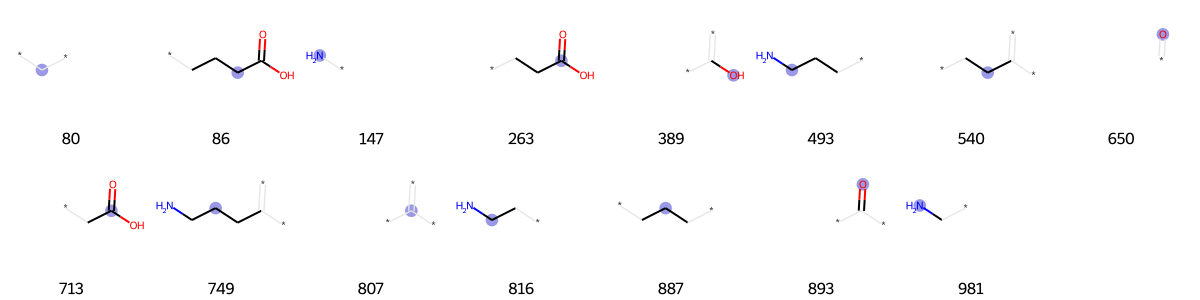

In [1637]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [1647]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[33,
 80,
 90,
 119,
 128,
 145,
 175,
 221,
 249,
 294,
 333,
 356,
 378,
 428,
 441,
 474,
 490,
 511,
 512,
 602,
 624,
 625,
 650,
 664,
 695,
 702,
 715,
 721,
 775,
 807,
 835,
 841,
 849,
 862,
 863,
 875,
 893,
 906,
 946,
 960,
 1006,
 1010]

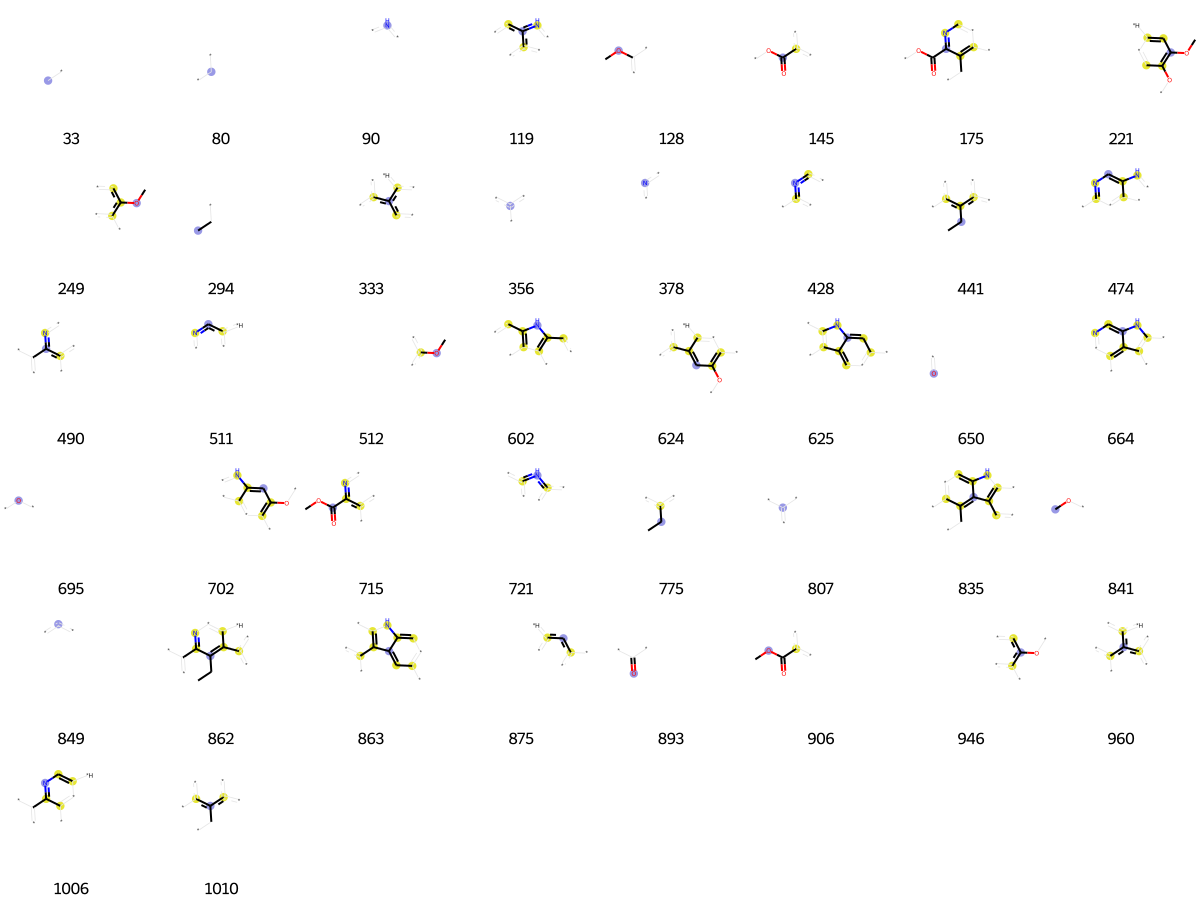

In [1648]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [1639]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[15,
 64,
 185,
 212,
 314,
 356,
 383,
 447,
 452,
 540,
 578,
 583,
 587,
 650,
 684,
 723,
 726,
 807,
 849,
 926,
 1000]

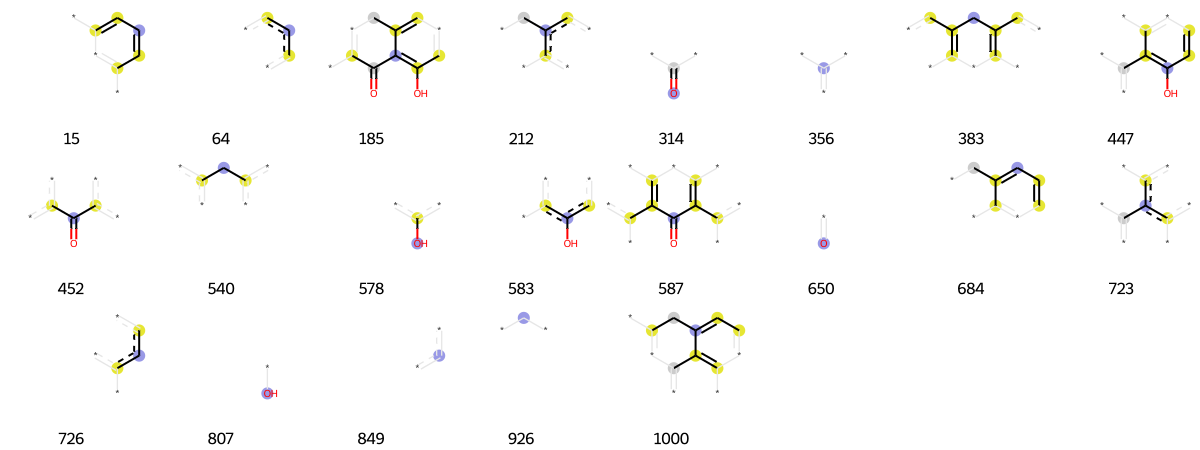

In [1640]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [1641]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[1,
 8,
 9,
 33,
 61,
 80,
 119,
 128,
 150,
 233,
 238,
 266,
 282,
 294,
 301,
 303,
 310,
 342,
 352,
 356,
 372,
 378,
 381,
 392,
 417,
 428,
 456,
 511,
 523,
 544,
 558,
 565,
 590,
 591,
 610,
 656,
 667,
 708,
 726,
 730,
 741,
 743,
 747,
 767,
 784,
 794,
 802,
 806,
 807,
 825,
 831,
 849,
 885,
 887,
 895,
 926,
 935,
 948,
 950,
 980,
 1019]

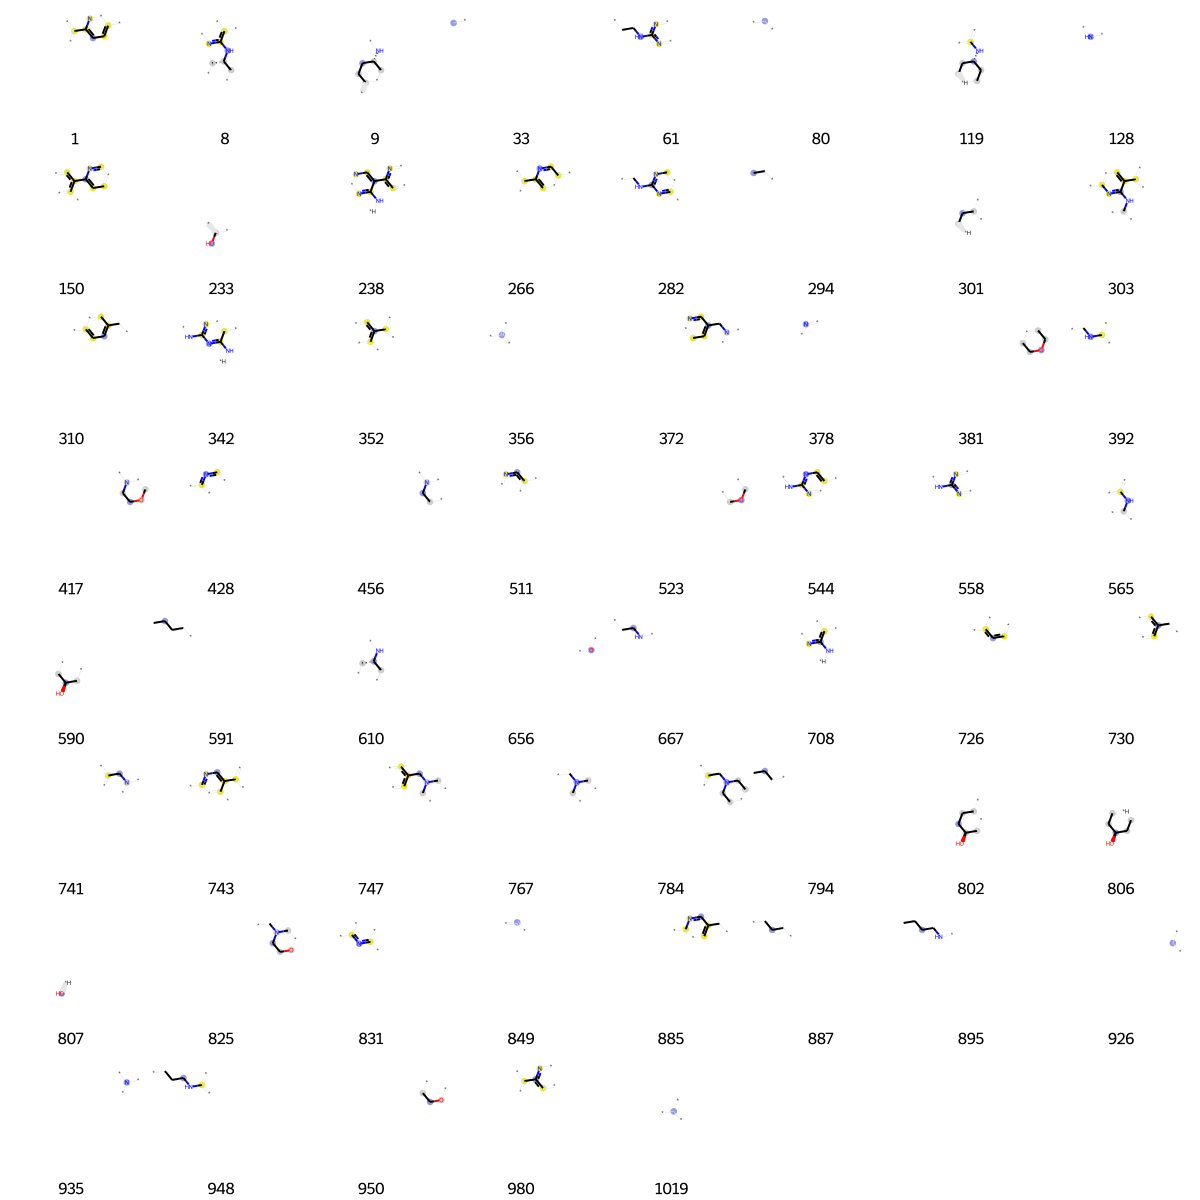

In [1642]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [1643]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[2,
 4,
 8,
 33,
 55,
 73,
 87,
 90,
 93,
 109,
 121,
 127,
 128,
 139,
 179,
 244,
 270,
 277,
 301,
 333,
 356,
 360,
 378,
 416,
 428,
 479,
 482,
 497,
 503,
 511,
 512,
 580,
 629,
 635,
 646,
 650,
 656,
 674,
 691,
 694,
 698,
 711,
 722,
 726,
 770,
 790,
 803,
 806,
 807,
 831,
 849,
 881,
 886,
 890,
 893,
 895,
 913,
 926,
 935,
 969,
 971,
 986,
 1019,
 1022]

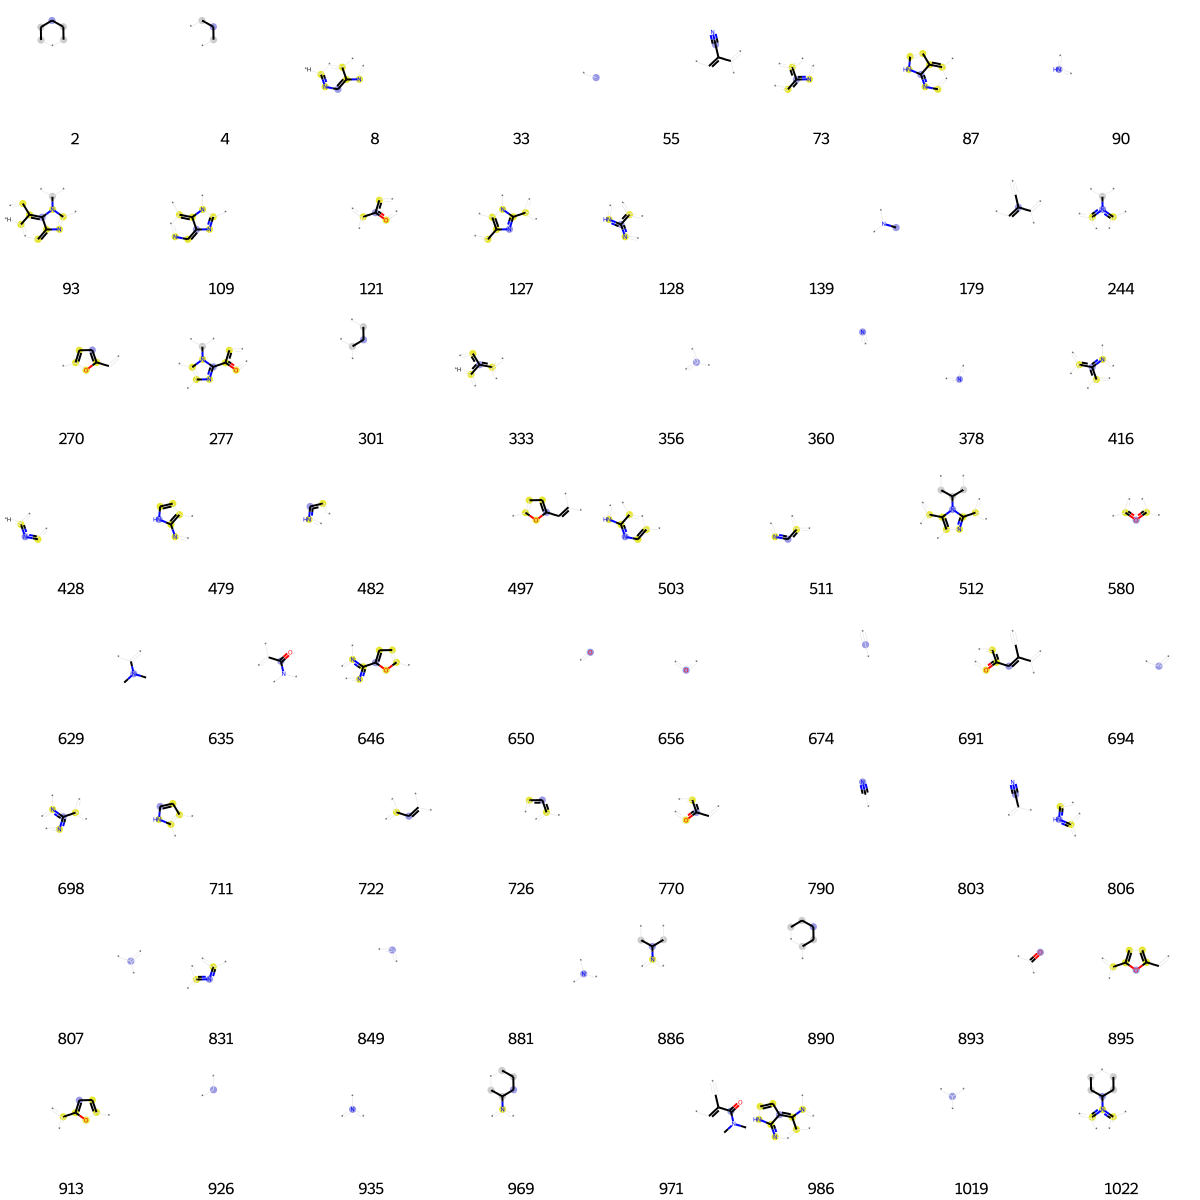

In [1644]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [1645]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[29,
 61,
 63,
 64,
 80,
 82,
 106,
 136,
 147,
 175,
 203,
 204,
 232,
 301,
 322,
 335,
 356,
 378,
 407,
 428,
 456,
 460,
 598,
 644,
 726,
 787,
 800,
 806,
 831,
 842,
 849,
 853,
 875,
 895,
 896,
 926,
 935,
 966,
 980,
 981,
 1012,
 1019]

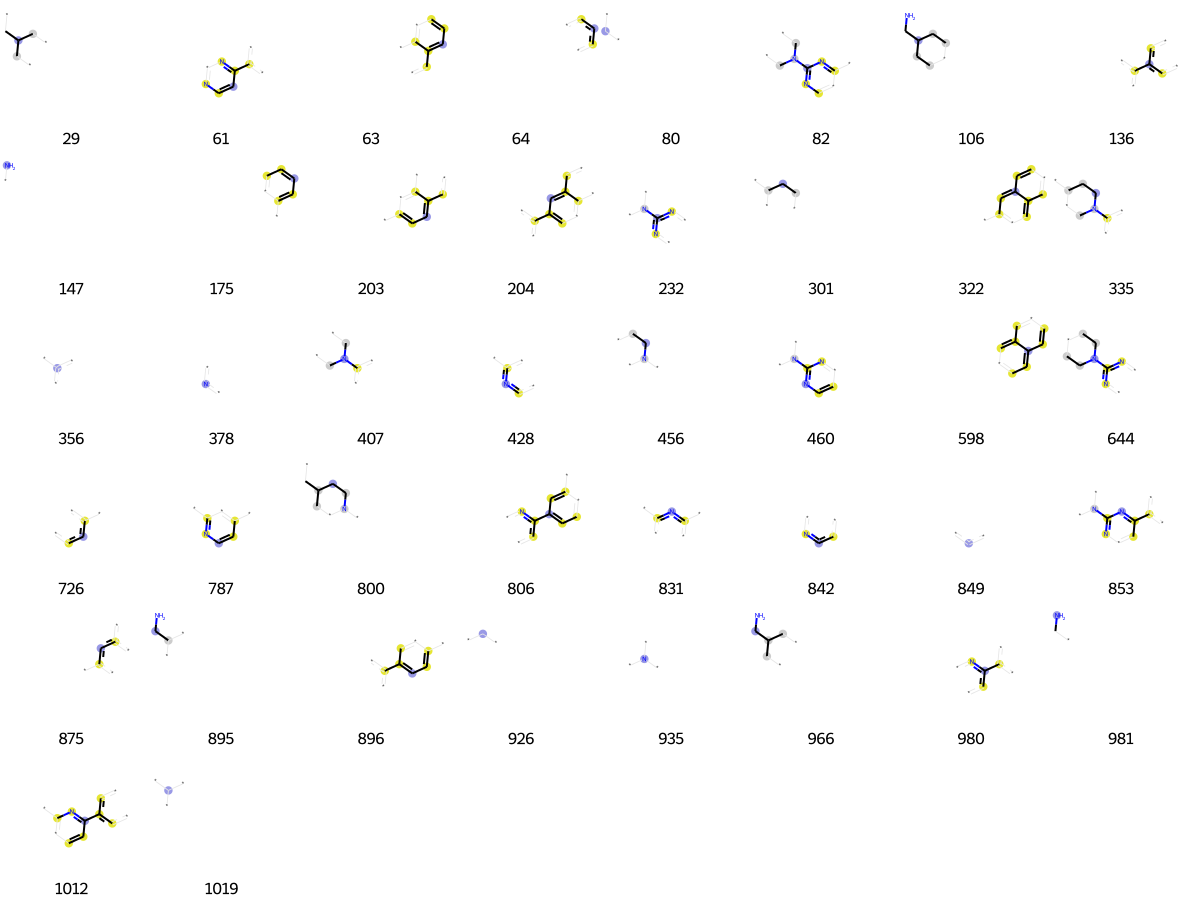

In [1646]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])